# 囚人のジレンマゲームの実験2

概要: [README.md](./readme.md)  

In [1]:
#-*- encoding: utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.precision', 4)
import sys
sys.path.append('./user_strategies')
import play as pl
from Iida_perfect_monitoring import Iida_pm
from Iida_imperfect_public import Iida_ipm
from Iida_imperfect_private import Iida_iprm
from kato import KatoStrategy
from ikegami_perfect import Self_Centered_perfect
from ikegami_imperfect_public import Self_Centered_public
from ikegami_imperfect_private import Self_Centered_private
from mhanami_Public_Strategy import PubStrategy
from mhanami_Imperfect_Public_Strategy import ImPubStrategy
from mhanami_Imperfect_Private_Strategy import ImPrivStrategy
from tsuyoshi import GrimTrigger
from gistfile1 import MyStrategy
from beeleb_Strategy import beeleb
from oyama import OyamaPerfectMonitoring, OyamaImperfectPublicMonitoring, OyamaImperfectPrivateMonitoring
from ogawa import ogawa
from yamagishi_impd import yamagishi

# Test

各戦略のテスト

In [3]:
import unittest

class TestStrategies(unittest.TestCase):
    def setUp(self):
        self.Strategies = [Iida_pm, Iida_ipm, Iida_iprm, KatoStrategy, Self_Centered_perfect, \
                          Self_Centered_public, Self_Centered_private, PubStrategy, ImPubStrategy, ImPrivStrategy, \
                          MyStrategy, beeleb, OyamaPerfectMonitoring, \
                           OyamaImperfectPublicMonitoring, OyamaImperfectPrivateMonitoring, \
                          ogawa, yamagishi, GrimTrigger] # ここに自作のclassを入れる
        self.case1 = "Signal is empty(period 1)"
        self.case2 = [0, 1]
        self.case3 = [1, 0]
        self.case4 = [0, 1, 0, 1, 0, 0, 1]

        self.seed = 11451
        self.RandomState = np.random.RandomState(self.seed)


    # case1を引数に渡してテスト
    def test1(self):
        print("testcase:", self.case1)
        for Strategy in self.Strategies:
            rst = Strategy(self.RandomState).play()
            self.assertIsNotNone(rst, Strategy.__module__)
            self.assertIn(rst, (0, 1), Strategy.__module__)


    # case2を引数に渡してテスト
    def test2(self):
        print("testcase:", self.case2)
        for Strategy in self.Strategies:
            S = Strategy(self.RandomState)
            for signal in self.case2:
                S.get_signal(signal)
                rst = S.play()       
                self.assertIsNotNone(rst, Strategy.__module__)
                self.assertIn(rst, (0, 1), Strategy.__module__)


    # case3を引数に渡してテスト
    def test3(self):
        print("testcase:", self.case3)
        for Strategy in self.Strategies:
            S = Strategy(self.RandomState)
            for signal in self.case3:
                S.get_signal(signal)
            
            rst = S.play()
            self.assertIsNotNone(rst, S.__module__)
            self.assertIn(rst, (0, 1), S.__module__)


    # case4を引数に渡してテスト
    def test4(self):
        print("testcase:", self.case4)
        for Strategy in self.Strategies:
            S = Strategy(self.RandomState)
            for signal in self.case4:
                S.get_signal(signal)
                rst = S.play()
                self.assertIsNotNone(rst, S.__module__)
                self.assertIn(rst, (0, 1), S.__module__)

In [4]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestStrategies)
unittest.TextTestRunner().run(suite)

....

testcase: Signal is empty(period 1)
testcase: [0, 1]
testcase: [1, 0]
testcase: [0, 1, 0, 1, 0, 0, 1]



----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

Test: OK

# 実験のセットアップ

In [2]:
payoff = np.array([[4, 0], [5, 2]])
seed = 20141019
rs = np.random.RandomState(seed)
discount_v = 0.97
repeat = 1000
ts_length = rs.geometric(p=1-discount_v, size=1000) + 1

# Case1: perfect monitoring

In [6]:
strategies = [Iida_pm, PubStrategy, KatoStrategy, Self_Centered_perfect,
                       GrimTrigger, MyStrategy, beeleb, OyamaPerfectMonitoring, ogawa,
                       yamagishi]
game = pl.RepeatedMatrixGame(payoff, strategies, signal=None, ts_length=ts_length, repeat=1000)
game.play(mtype="perfect", random_seed=seed, record=False)

Start
The object has 10 strategy functions below
****************************************
Iida_perfect_monitoring.Iida_pm
mhanami_Public_Strategy.PubStrategy
kato.KatoStrategy
ikegami_perfect.Self_Centered_perfect
tsuyoshi.GrimTrigger
gistfile1.MyStrategy
beeleb_Strategy.beeleb
oyama.OyamaPerfectMonitoring
ogawa.ogawa
yamagishi_impd.yamagishi
****************************************
Repeats: 1000
Total time series length: 34333

Game 1: "Iida_perfect_monitoring.Iida_pm" vs "mhanami_Public_Strategy.PubStrategy"
total score of Iida_perfect_monitoring.Iida_pm: 96040.000, per stage: 2.797
total score of mhanami_Public_Strategy.PubStrategy: 104995.000, per stage: 3.058

Game 2: "Iida_perfect_monitoring.Iida_pm" vs "kato.KatoStrategy"
total score of Iida_perfect_monitoring.Iida_pm: 60464.000, per stage: 1.761
total score of kato.KatoStrategy: 85969.000, per stage: 2.504

Game 3: "Iida_perfect_monitoring.Iida_pm" vs "ikegami_perfect.Self_Centered_perfect"
total score of Iida_perfect_monitorin

## スコアテーブル

行: 利得を表示するプレイヤー　列: 対戦相手

In [7]:
score_perfect = np.array([[0, 96040, 60464, 147123, 124298, 147123, 147123, 95809, 106699, 126331],
[104995, 0, 68666, 137332, 137332, 137332, 137332, 137332, 97073, 137332],
[85969, 73666, 0, 170665, 122335, 104554, 82174, 73666, 76420, 73666],
[98168, 137332, 4000, 0, 137332, 137332, 137332, 137332, 83376, 137332],
[88338, 137332, 36220, 137332, 0, 137332, 137332, 137332, 93425, 137332],
[98168, 137332, 48074, 137332, 137332, 0, 137332, 137332, 99883, 137332],
[98168, 137332, 62994, 137332, 137332, 137332, 0, 137332, 105660, 137332],
[104604, 137332, 68666, 137332, 137332, 137332, 137332, 0, 96651, 137332],
[96454, 95428, 66830, 150821, 126385, 125958, 117485, 94806, 0, 110390],
[125791, 137332, 68666, 137332, 137332, 137332, 137332, 137332, 108350, 0]], dtype=float)

score_perfect /= 34333
score_perfect = pd.DataFrame(score_perfect)

print(score_perfect)

       0      1      2      3      4      5      6      7      8      9
0  0.000  2.797  1.761  4.285  3.620  4.285  4.285  2.791  3.108  3.680
1  3.058  0.000  2.000  4.000  4.000  4.000  4.000  4.000  2.827  4.000
2  2.504  2.146  0.000  4.971  3.563  3.045  2.393  2.146  2.226  2.146
3  2.859  4.000  0.117  0.000  4.000  4.000  4.000  4.000  2.428  4.000
4  2.573  4.000  1.055  4.000  0.000  4.000  4.000  4.000  2.721  4.000
5  2.859  4.000  1.400  4.000  4.000  0.000  4.000  4.000  2.909  4.000
6  2.859  4.000  1.835  4.000  4.000  4.000  0.000  4.000  3.078  4.000
7  3.047  4.000  2.000  4.000  4.000  4.000  4.000  0.000  2.815  4.000
8  2.809  2.779  1.947  4.393  3.681  3.669  3.422  2.761  0.000  3.215
9  3.664  4.000  2.000  4.000  4.000  4.000  4.000  4.000  3.156  0.000


<table>
<tr><th></th><th>Iida_pm</th><th>PubStrategy</th><th>KatoStrategy</th><th>Self_Centered_perfect</th><th>GrimTrigger</th><th>MyStrategy</th><th>beeleb</th><th>OyamaImperfectPerfectMonitoring</th><th>ogawa</th><th>yamagishi</th></tr>
<tr><th>Iida_pm</th><td>0.000</td><td>2.797</td><td>1.761</td><td>4.285</td><td>3.620</td><td>4.285</td><td>4.285</td><td>2.791</td><td>3.108</td><td>3.680</td></tr>
<tr><th>PubStrategy</th><td>3.058</td><td>0.000</td><td>2.000</td><td>4.000</td><td>4.000</td><td>4.000</td><td>4.000</td><td>4.000</td><td>2.827</td><td>4.000</td></tr>
<tr><th>KatoStrategy</th><td>2.504</td><td>2.146</td><td>0.000</td><td>4.971</td><td>3.563</td><td>3.045</td><td>2.393</td><td>2.146</td><td>2.226</td><td>2.146</td></tr>
<tr><th>Self_Centered_perfect</th><td>2.859</td><td>4.000</td><td>0.117</td><td>0.000</td><td>4.000</td><td>4.000</td><td>4.000</td><td>4.000</td><td>2.428</td><td>4.000</td></tr>
<tr><th>GrimTrigger</th><td>2.573</td><td>4.000</td><td>1.055</td><td>4.000</td><td>0.000</td><td>4.000</td><td>4.000</td><td>4.000</td><td>2.721</td><td>4.000</td></tr>
<tr><th>MyStrategy</th><td>2.859</td><td>4.000</td><td>1.400</td><td>4.000</td><td>4.000</td><td>0.000</td><td>4.000</td><td>4.000</td><td>2.909</td><td>4.000</td></tr>
<tr><th>beeleb</th><td>2.859</td><td>4.000</td><td>1.835</td><td>4.000</td><td>4.000</td><td>4.000</td><td>0.000</td><td>4.000</td><td>3.078</td><td>4.000</td></tr>
<tr><th>OyamaPerfectMonitoring</th><td>3.047</td><td>4.000</td><td>2.000</td><td>4.000</td><td>4.000</td><td>4.000</td><td>4.000</td><td>0.000</td><td>2.815</td><td>4.000</td></tr>
<tr><th>ogawa</th><td>2.809</td><td>2.779</td><td>1.947</td><td>4.393</td><td>3.681</td><td>3.669</td><td>3.422</td><td>2.761</td><td>0.000</td><td>3.215</td></tr>
<tr><th>yamagishi</th><td>3.664</td><td>4.000</td><td>2.000</td><td>4.000</td><td>4.000</td><td>4.000</td><td>4.000</td><td>4.000</td><td>3.156</td><td>0.000</td></tr>
</table>

## グラフを出力

### 各対戦、各periodにおいて、それぞれのプレイヤーがCooperationをとっている割合

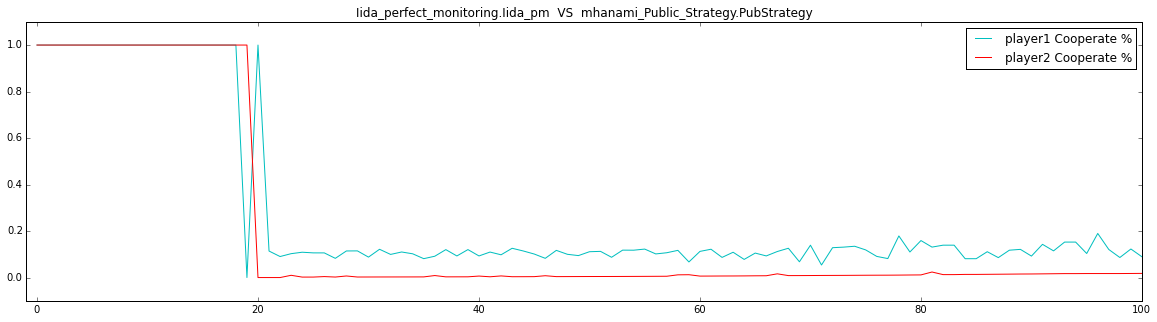

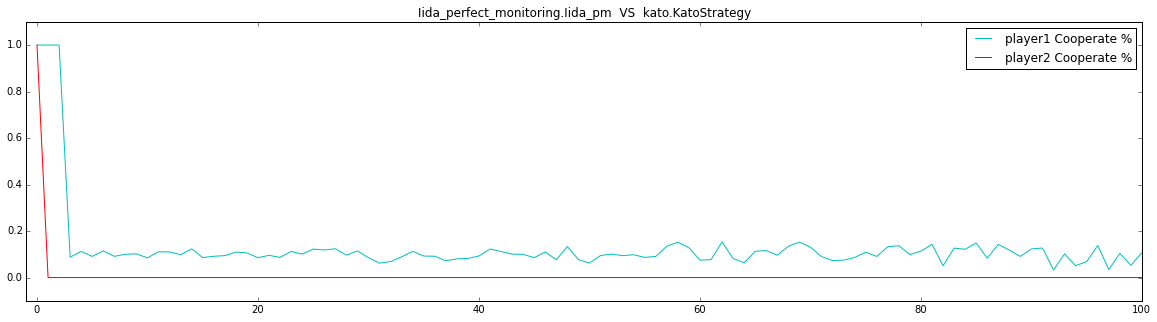

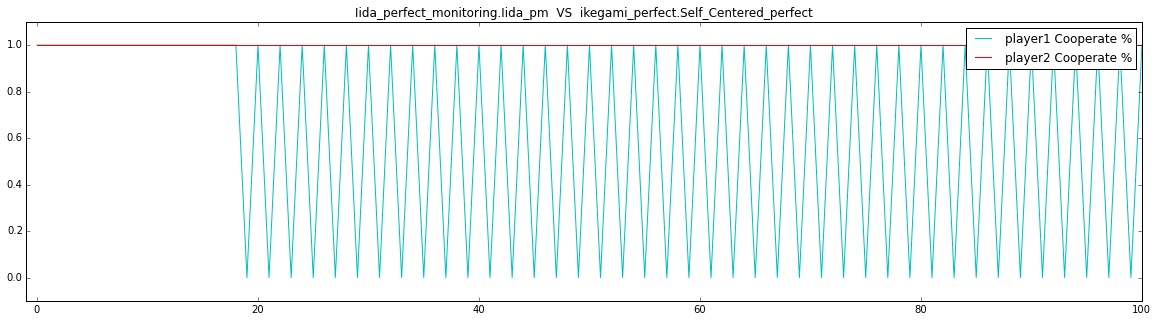

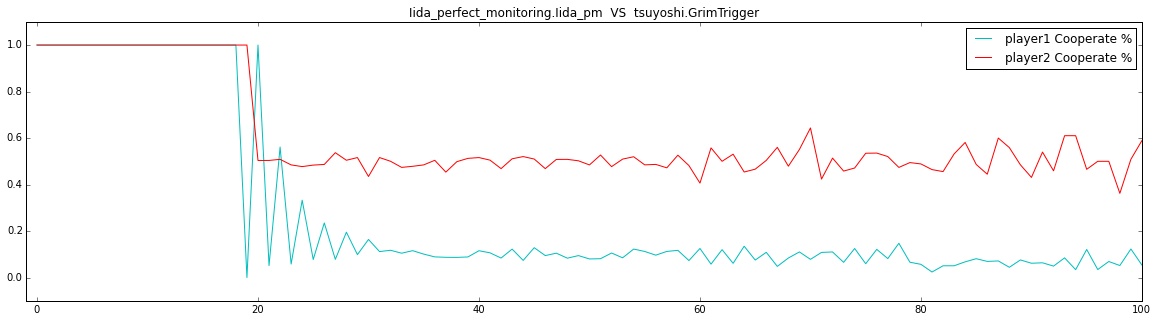

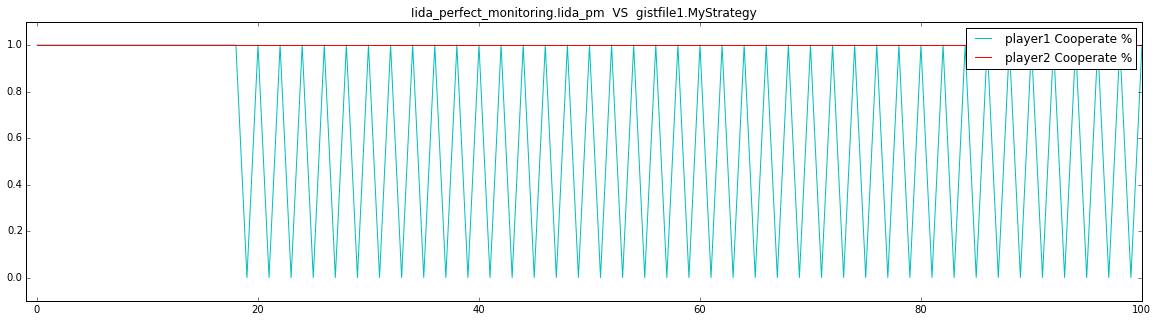

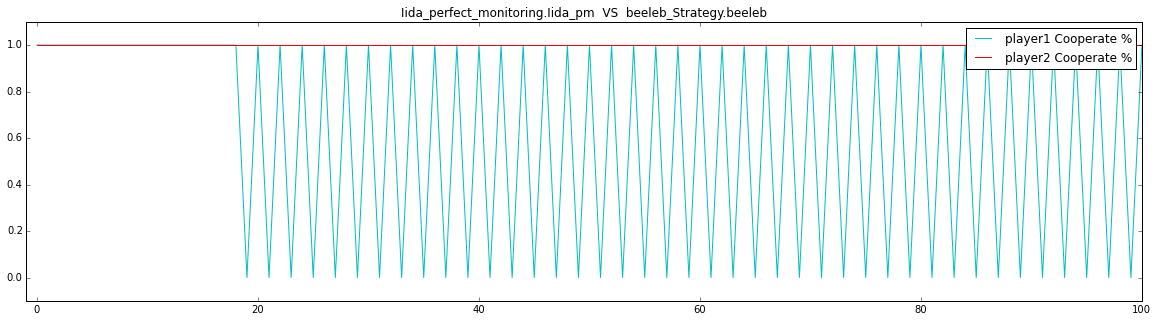

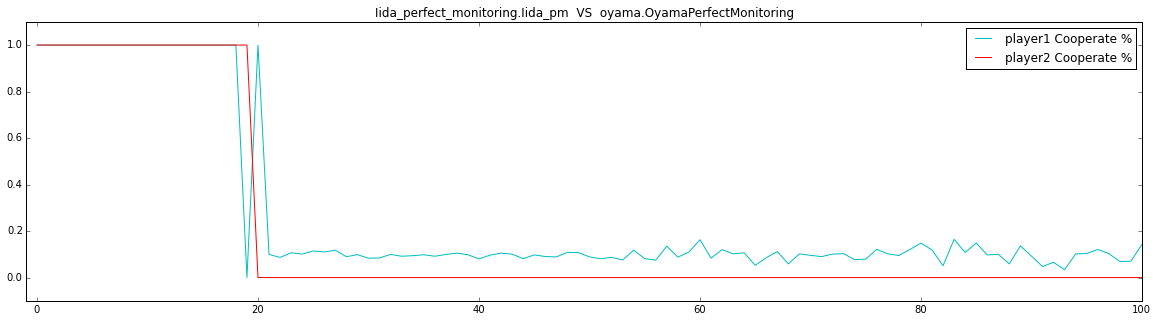

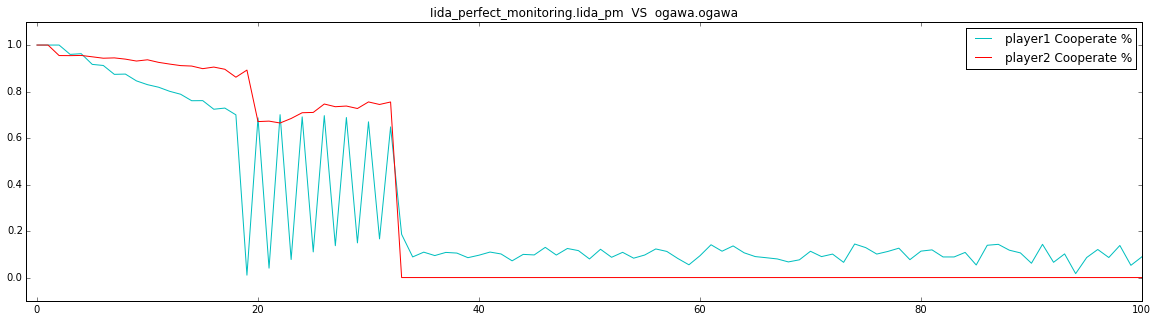

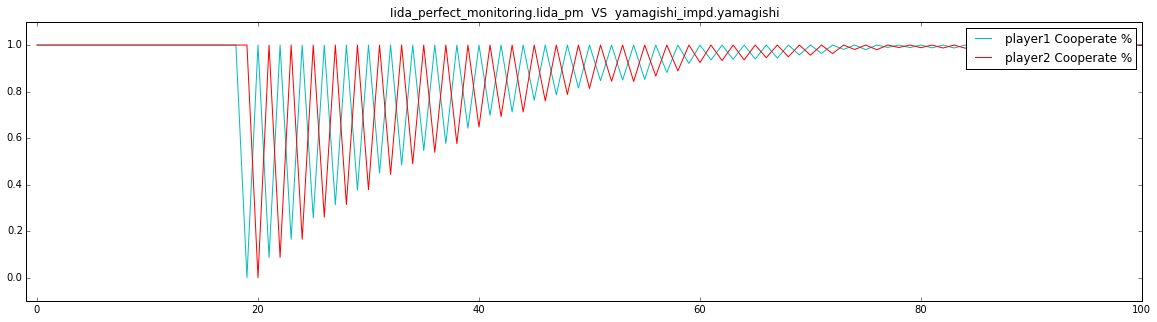

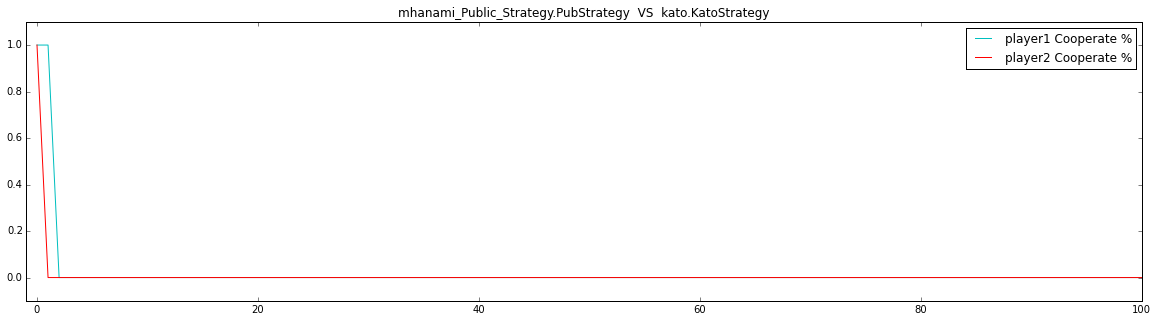

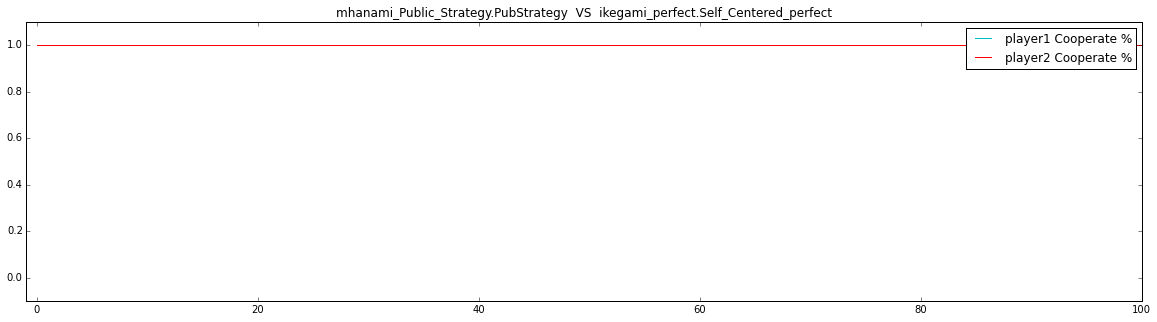

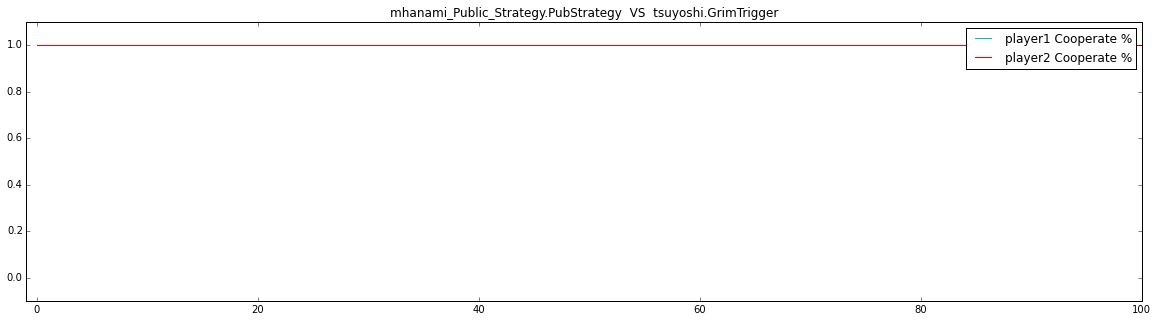

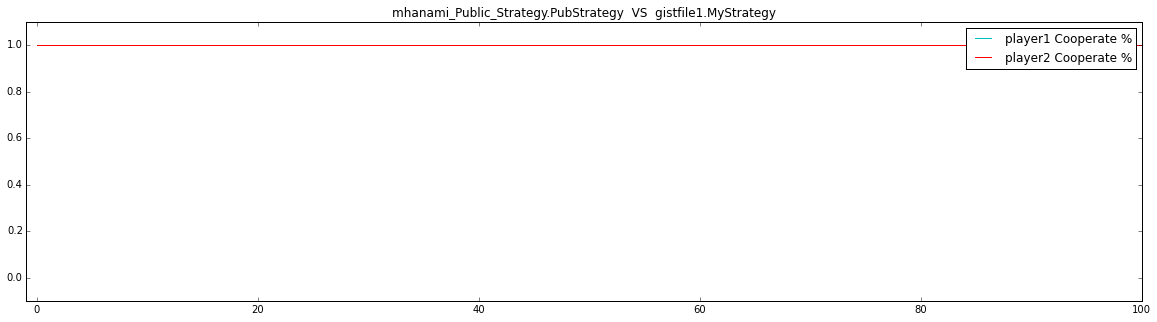

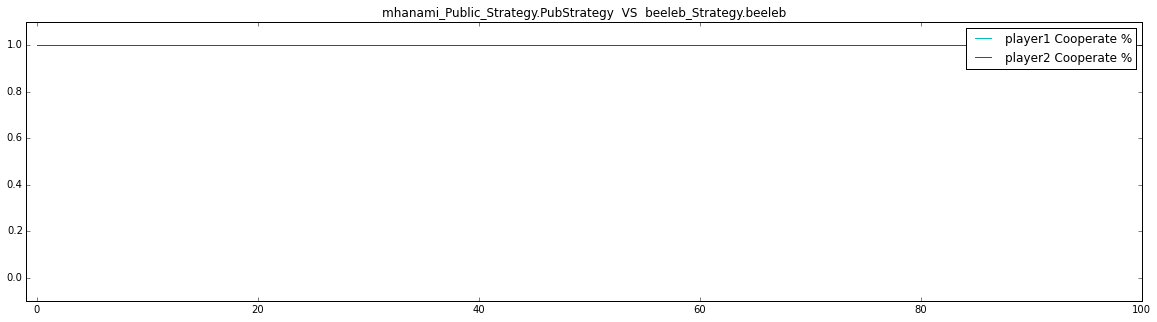

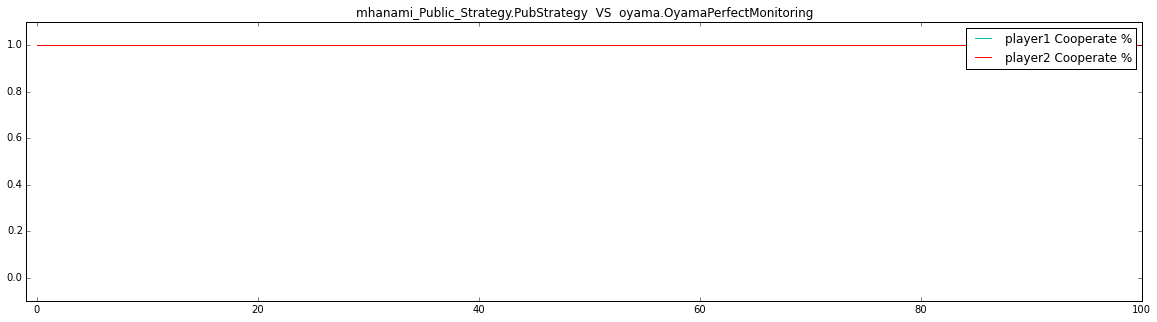

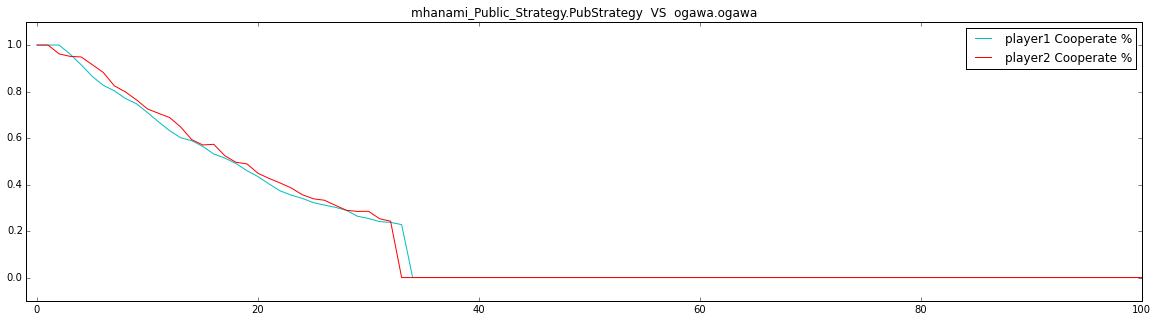

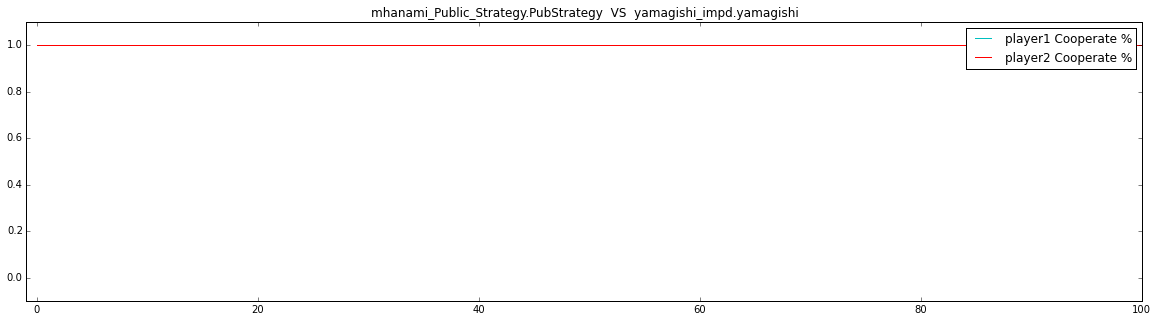

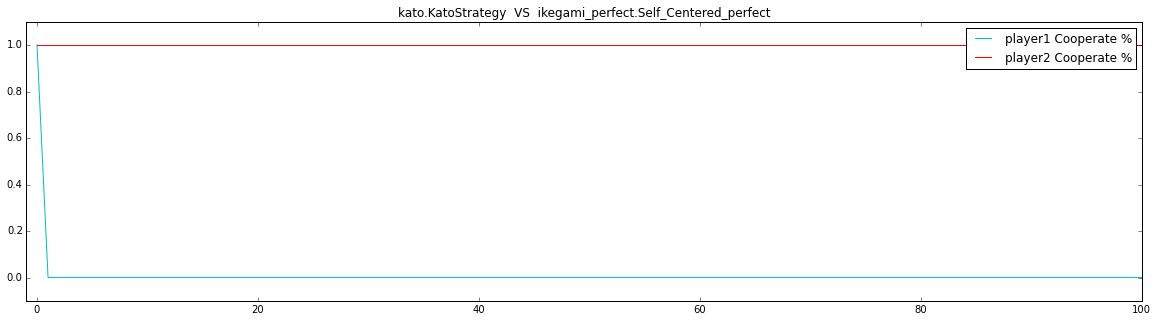

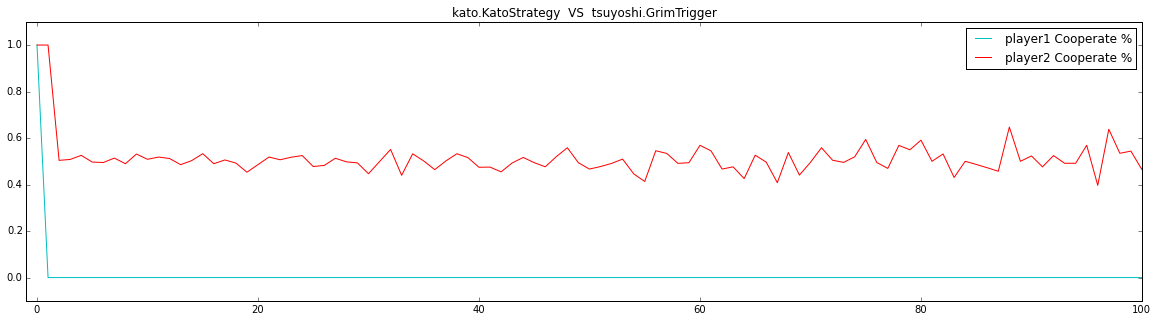

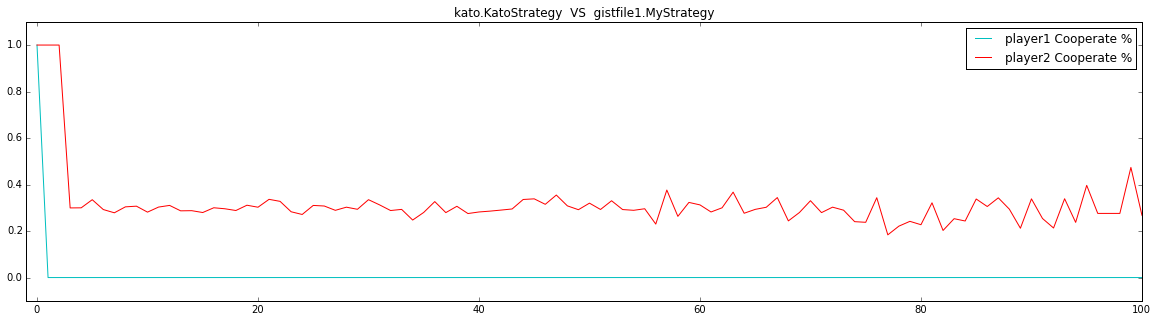

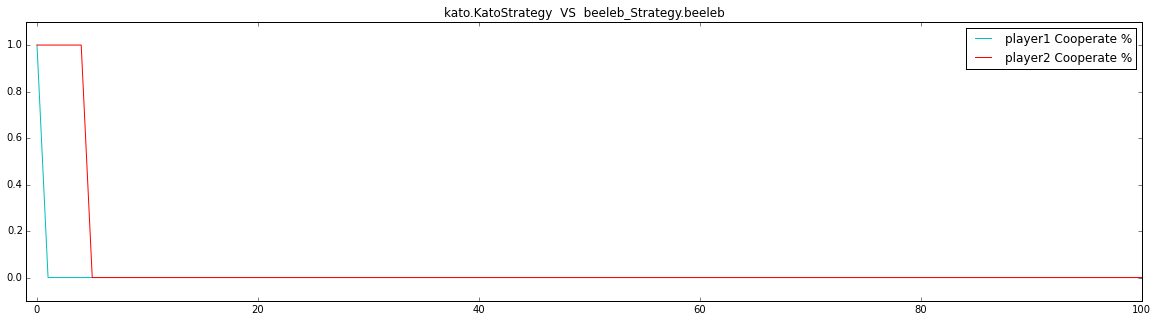

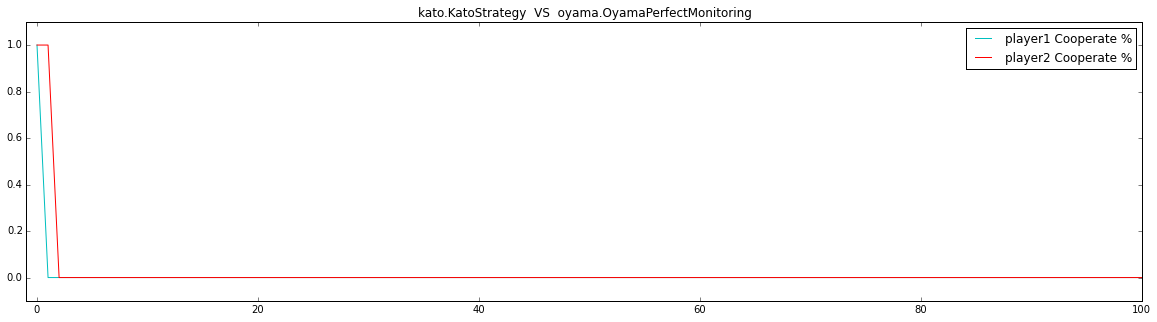

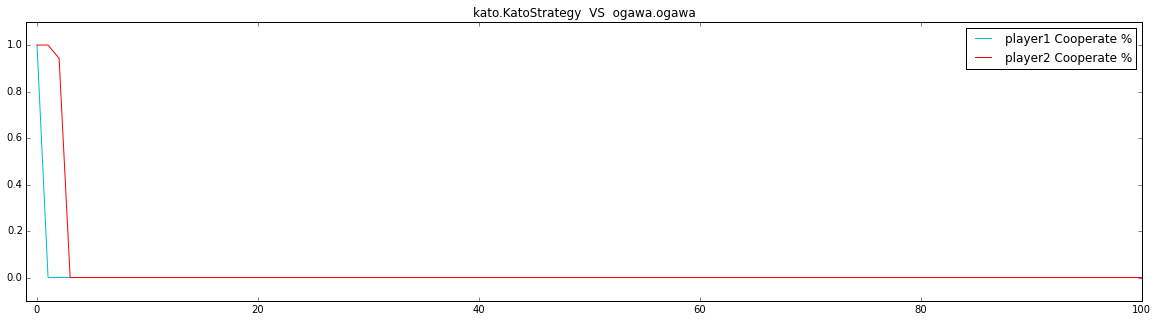

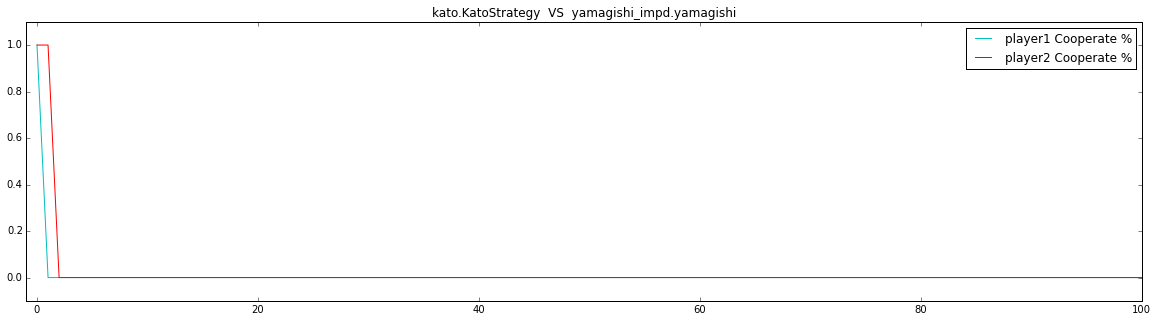

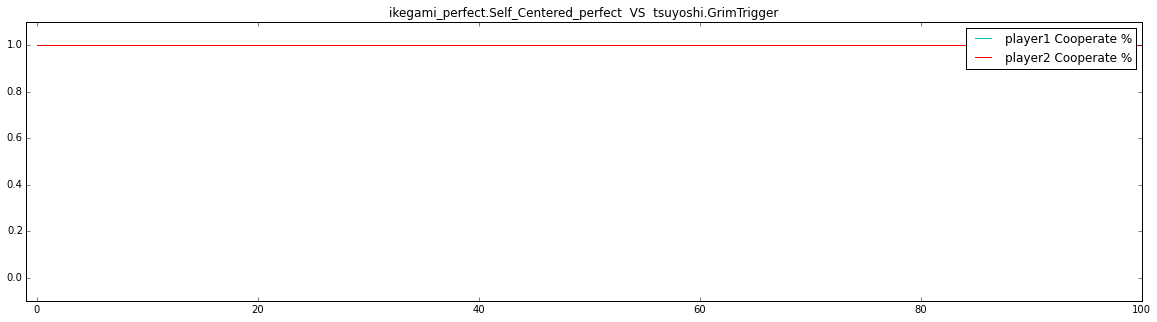

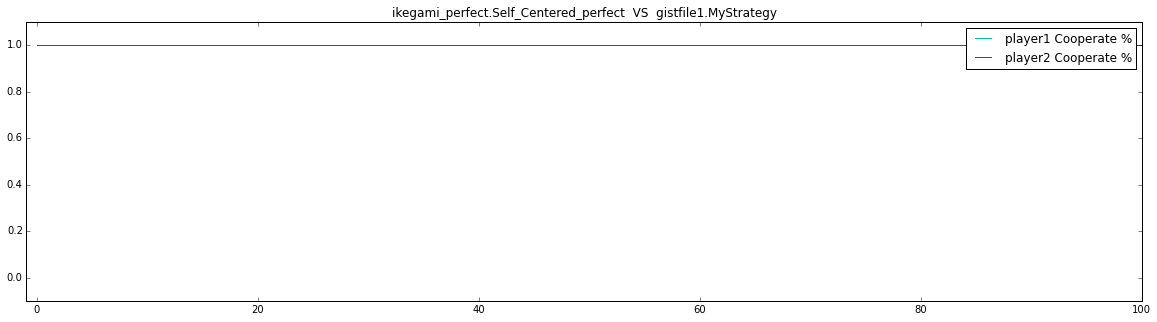

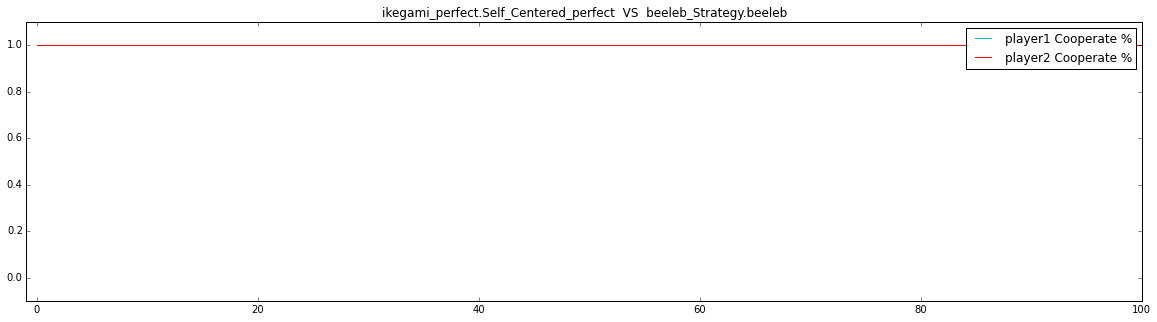

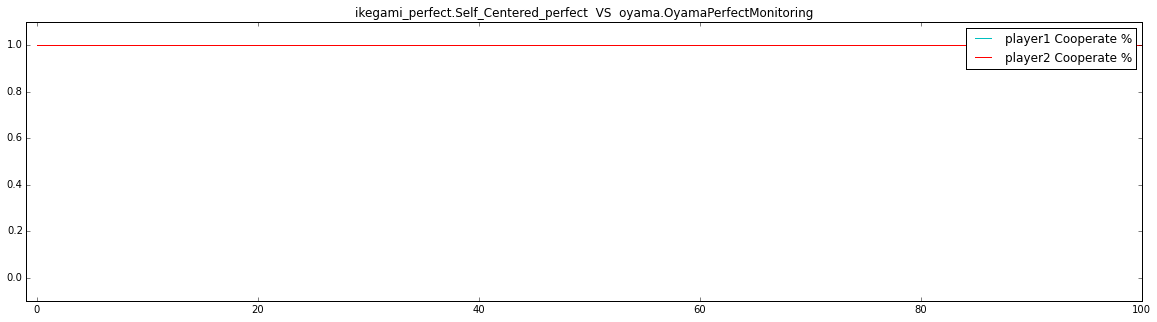

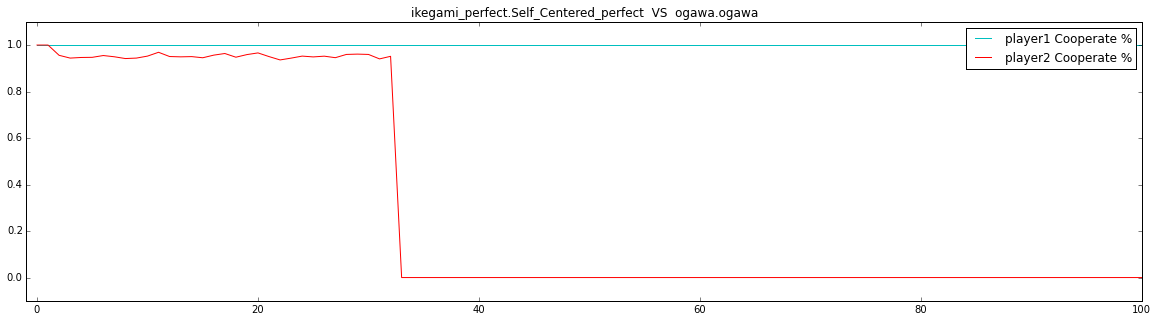

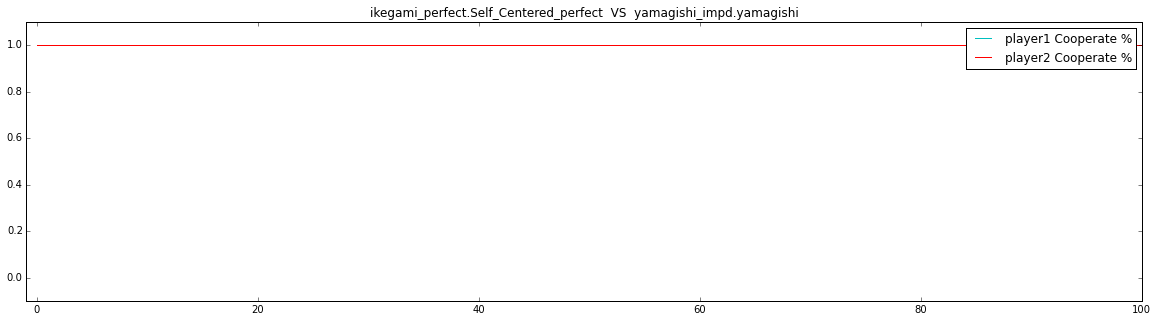

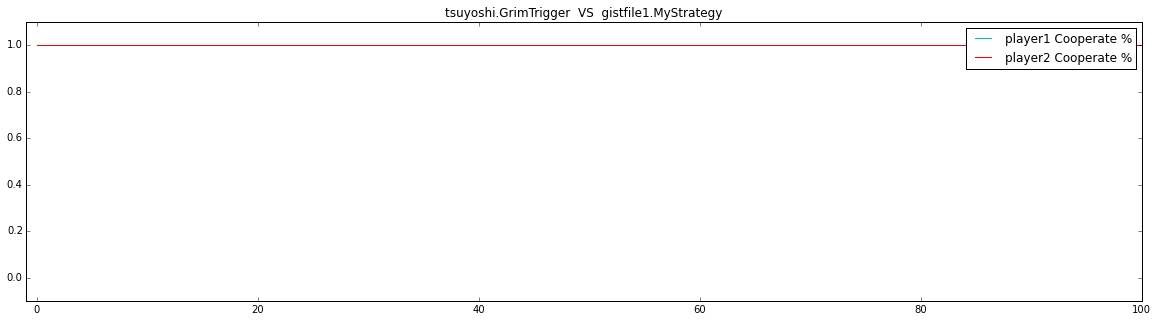

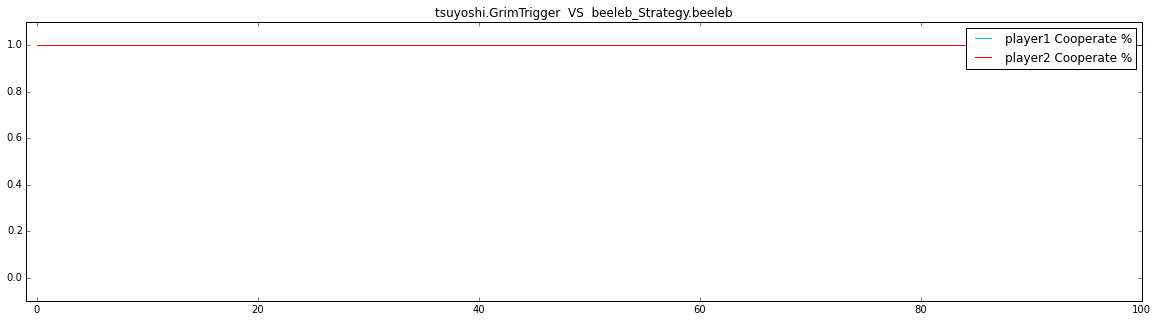

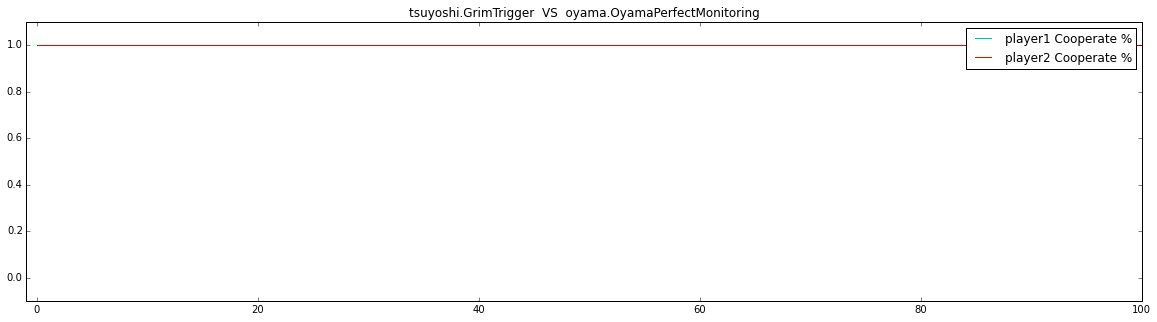

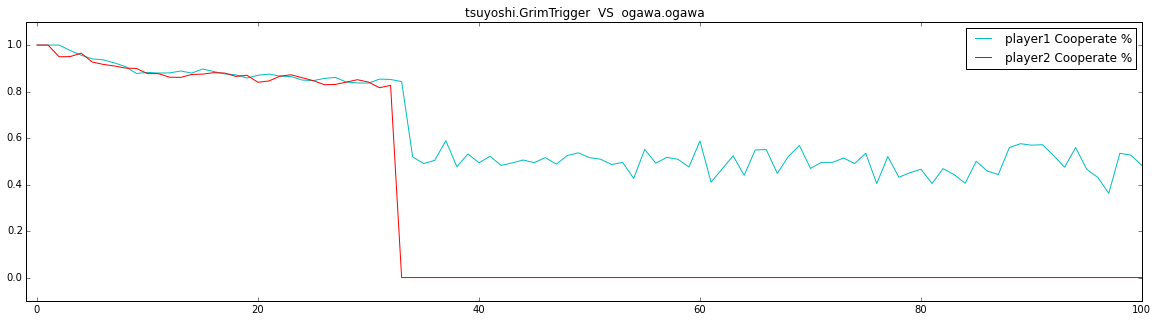

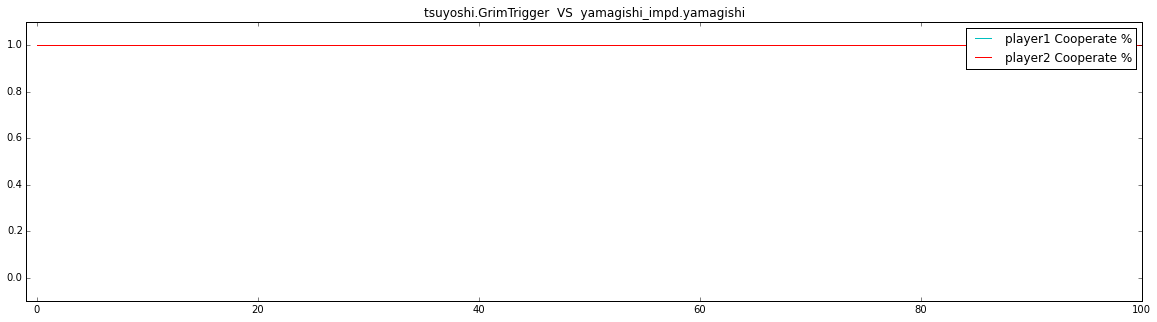

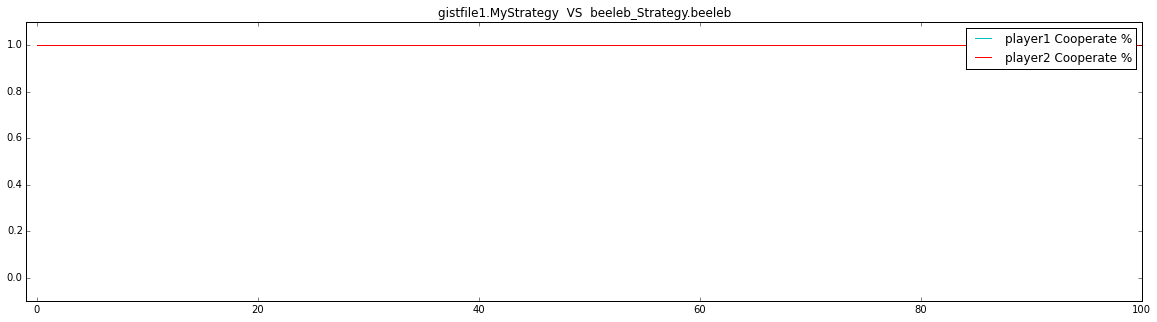

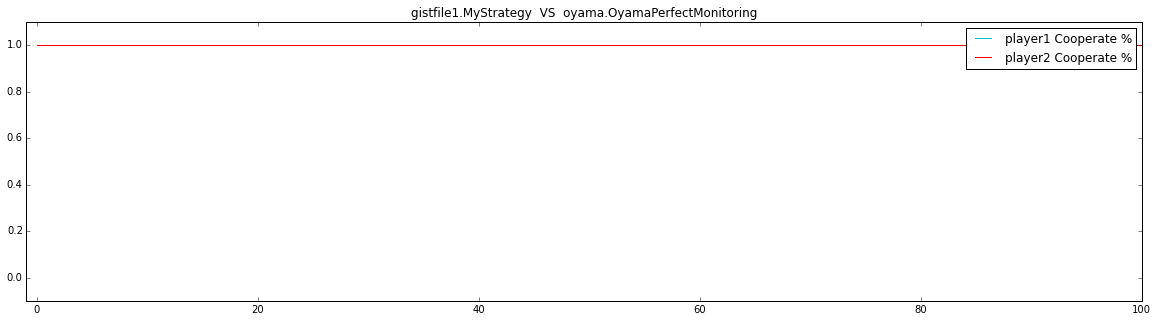

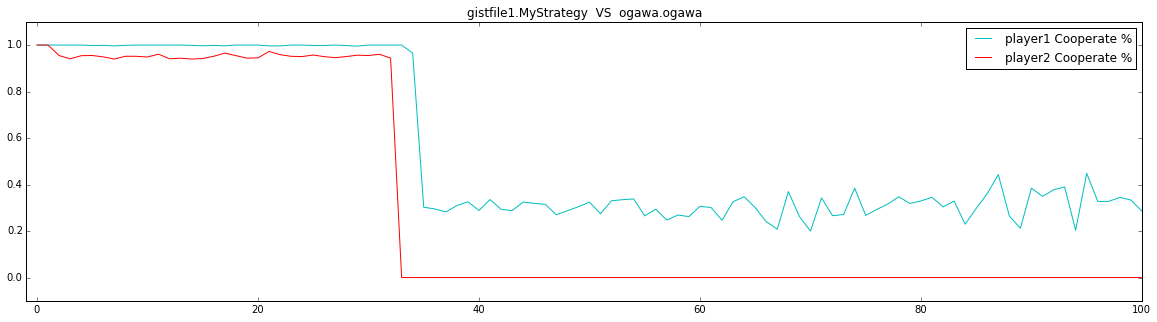

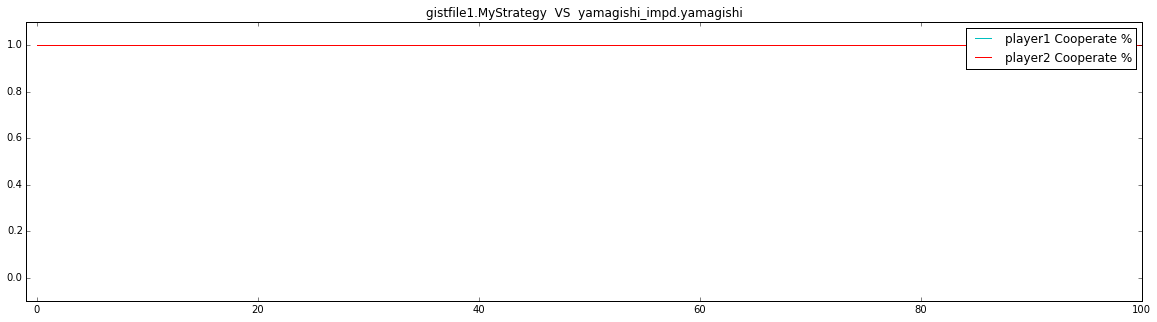

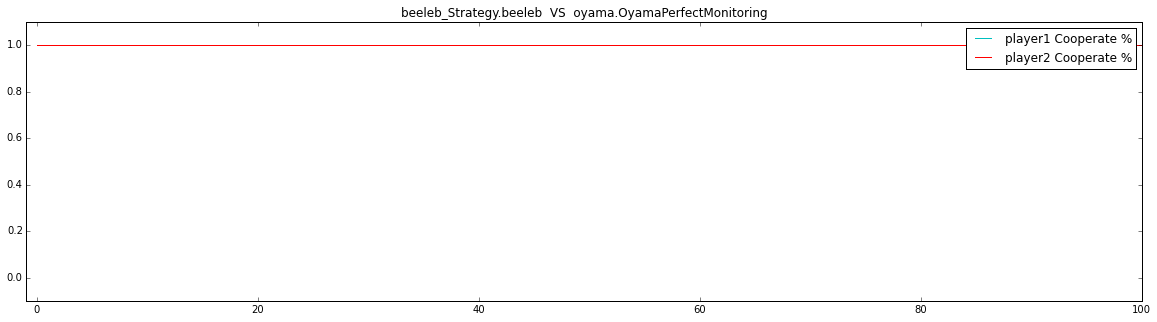

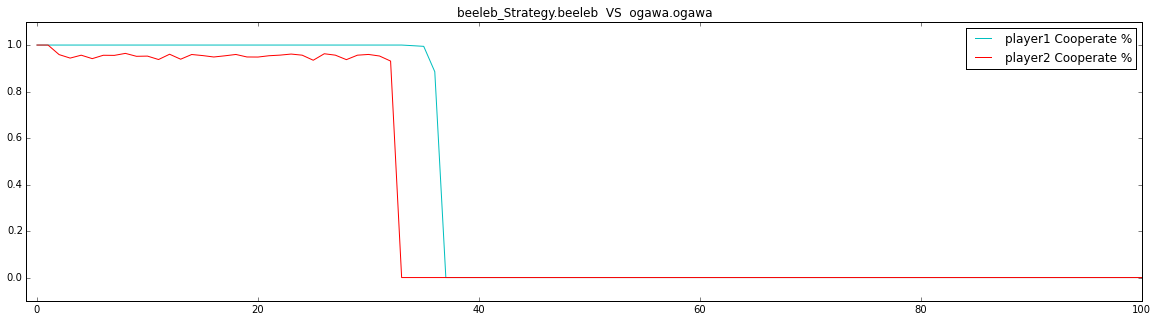

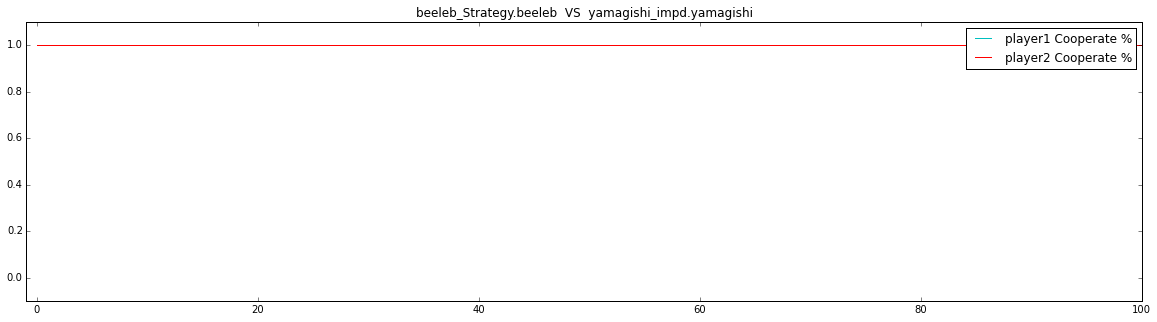

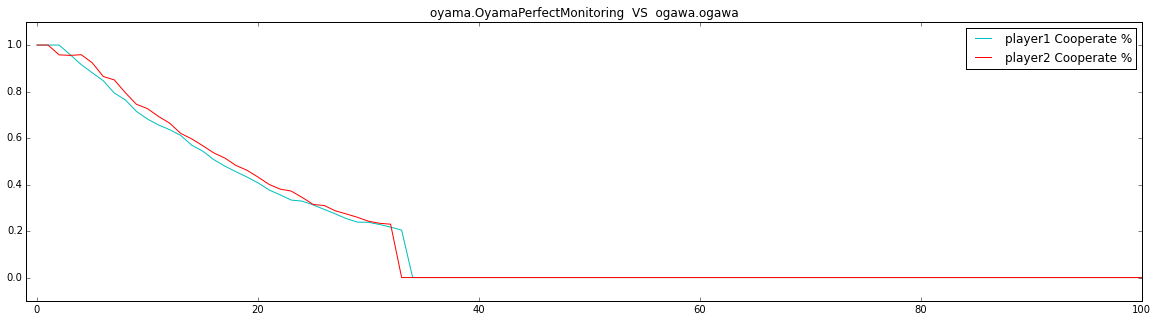

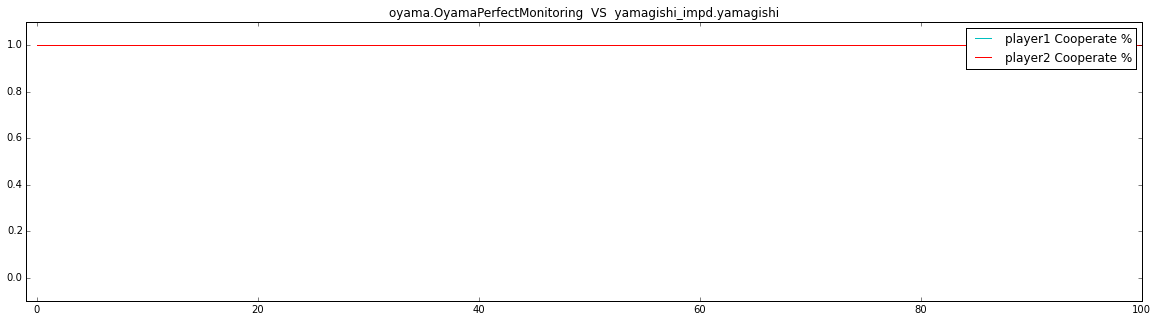

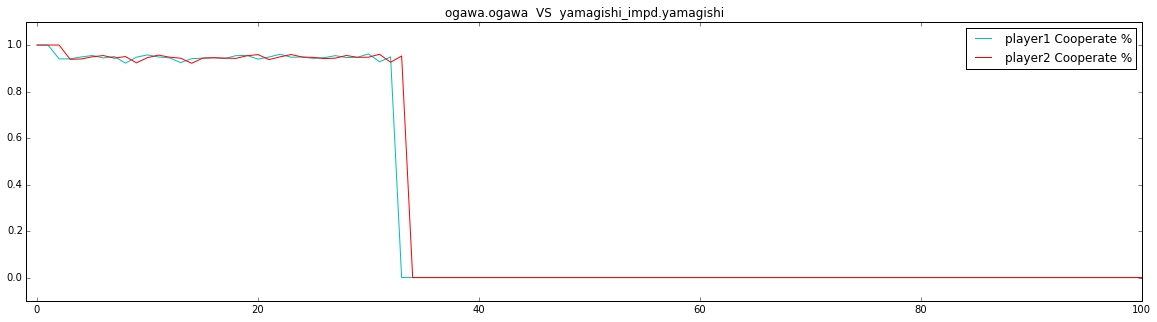

In [8]:
def normalize(array_2d):
    copy_array = np.array(array_2d, dtype=float)
    for v in copy_array:
        total = np.sum(v)
        v /= total
    return copy_array


def __plotC__(periods, action1, action2, **kwargs):
    period_max = kwargs.get('period_max', np.max(periods)+1)
    title = kwargs.get('title', None)
    
    fig, ax = plt.subplots(figsize=(20, 5))
    plt.xlim(-1, period_max)
    plt.ylim(-0.1, 1.1)
    plt.plot(periods, action1, color='c', label='player1 Cooperate %')
    plt.plot(periods, action2, color='r', label='player2 Cooperate %')
    if title:
        plt.title(title)
    
    plt.legend()
    plt.show()


# period毎にどの程度協力が行われているかをplot
def plotC(df):
    # 対戦組み合わせの数
    match_len = df['Match'].max() + 1

    # 1対戦のゲーム数
    round_len = df['Round'].max() + 1

    # 最長period
    period_max = df['Period'].max() + 1

    for m in range(match_len):
        df_match = df[df_perfect.Match == m].reset_index()
        str1 = df_match['Strategy1'][0]
        str2 = df_match['Strategy2'][0]
        df_match_s = df_match.loc[:, ["Round", "Period", "Action1", "Action2"]]
        df_match_np = df_match_s.as_matrix()

        periods = np.arange(period_max)
        action1 = np.zeros((period_max, 2), dtype=int)
        action2 = np.zeros((period_max, 2), dtype=int)

        for r in range(round_len):
            df_round = df_match_np[df_match_np[:, 0] == r]
            period_len = int(df_round[:, 1].max()+1)
            for p in range(period_len):
                stage_df = df_round[df_round[:, 1] == p]
                stage_action1 = stage_df[:, 2]
                stage_action2 = stage_df[:, 3]

                if stage_action1 == 0:
                    action1[p, 0]  += 1
                else:
                    action1[p, 1] += 1

                if stage_action2 == 0:
                    action2[p, 0]  += 1
                else:
                    action2[p, 1] += 1
                    
        action1 = normalize(action1)
        action2 = normalize(action2)
        __plotC__(periods, action1[:, 0], action2[:, 0], period_max=100, title='{0}  VS  {1}'.format(str1, str2))

        
# 結果の読み込み
df_perfect = pd.read_csv("record_perfect.csv")
plotC(df_perfect)

### 各対戦、ゲーム毎の平均利得分布

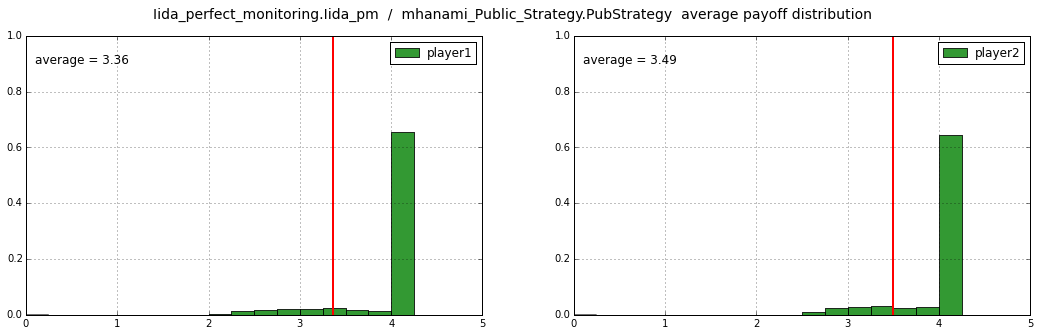

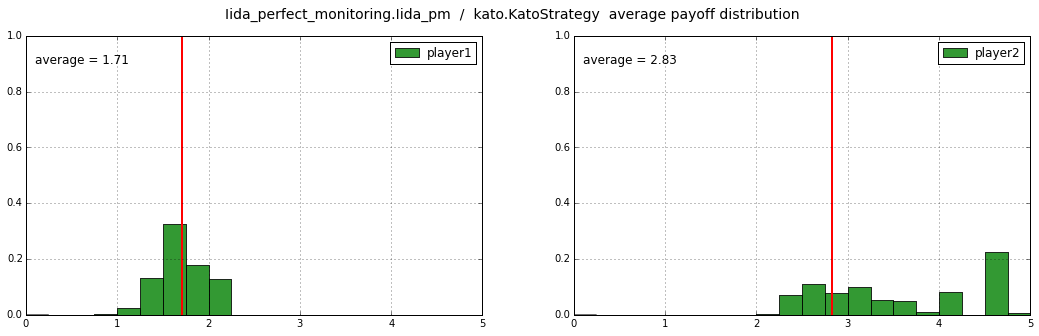

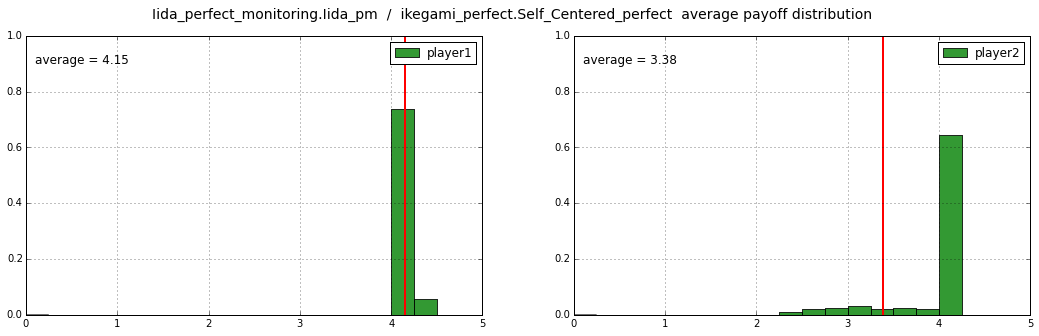

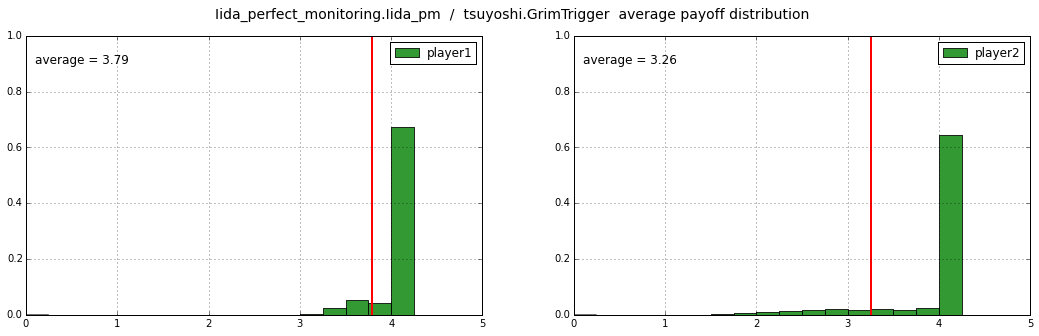

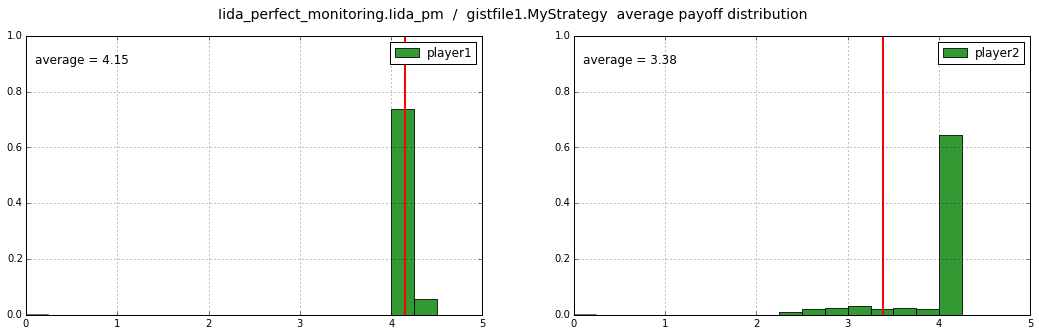

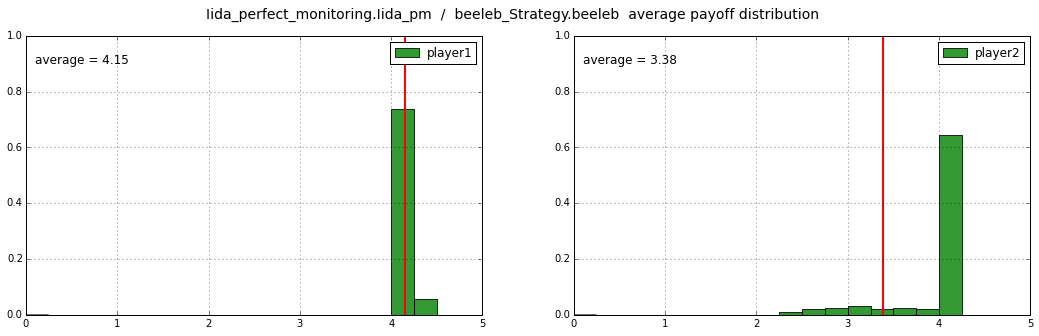

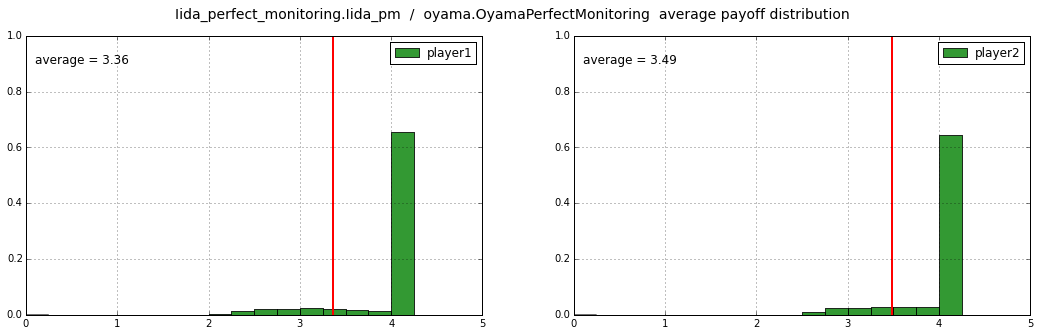

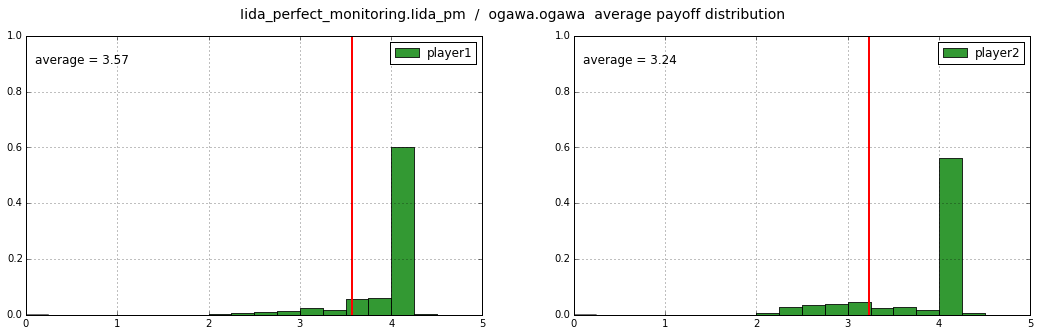

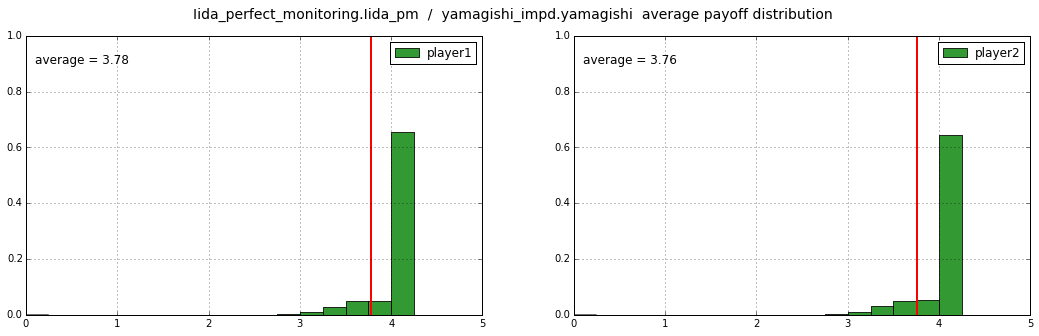

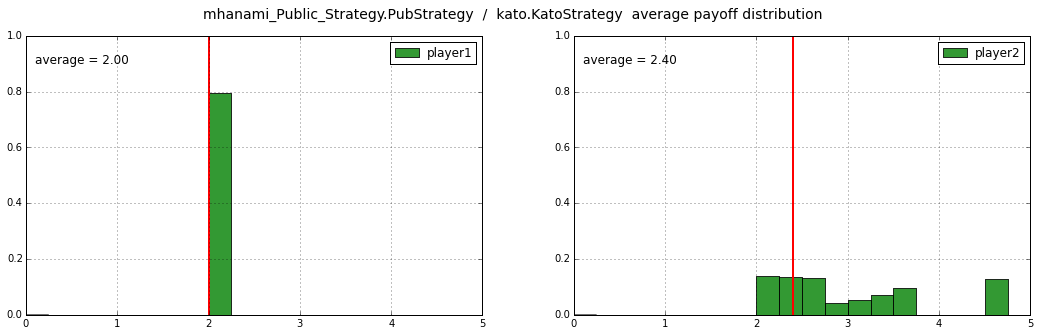

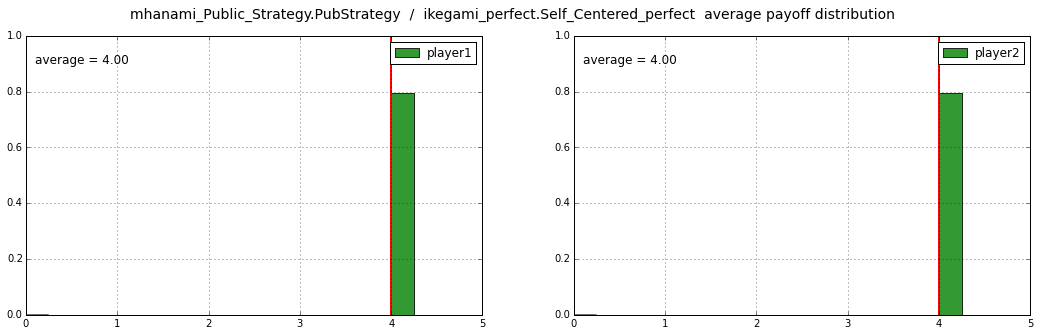

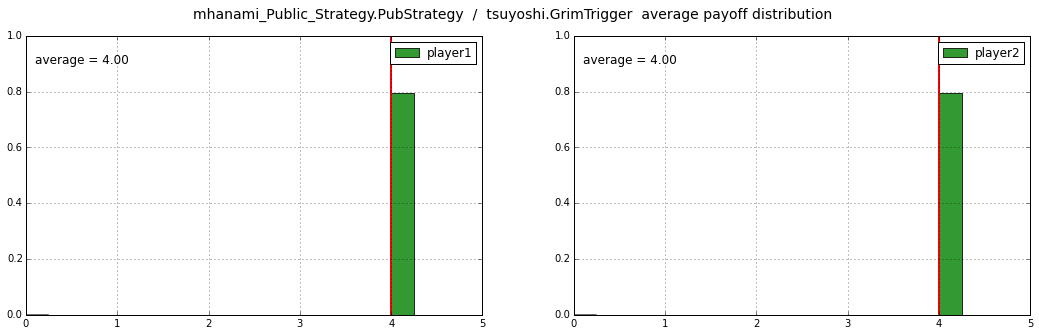

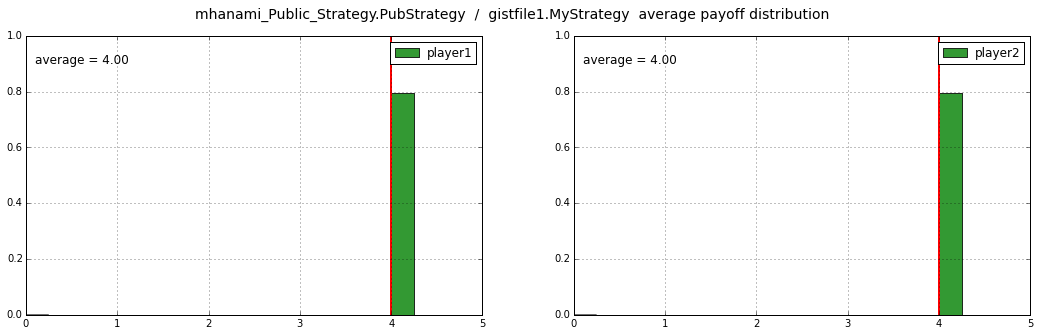

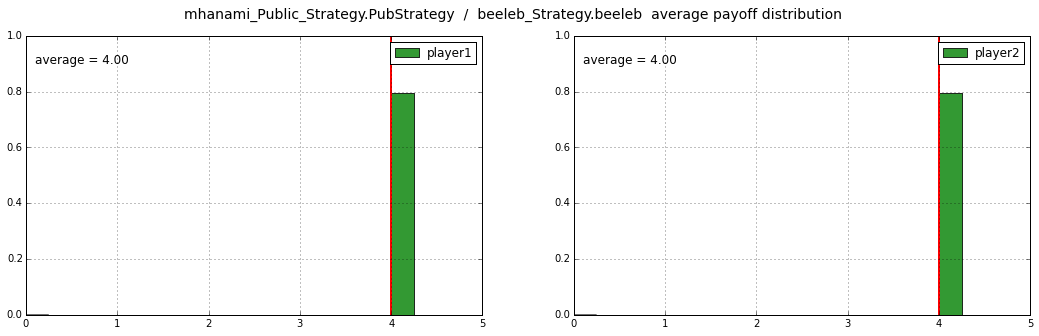

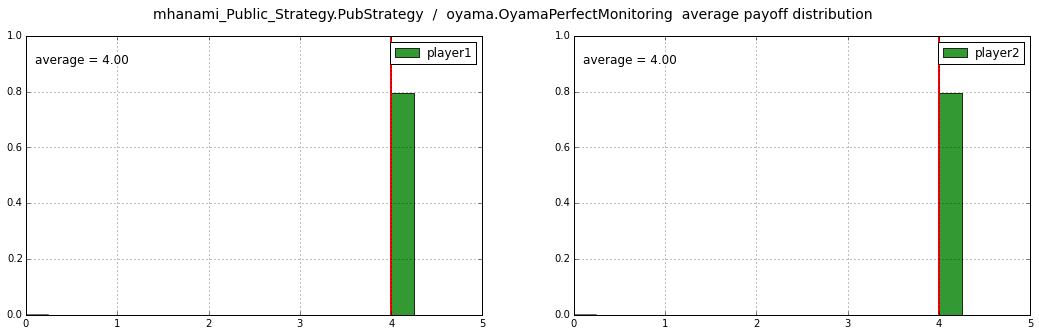

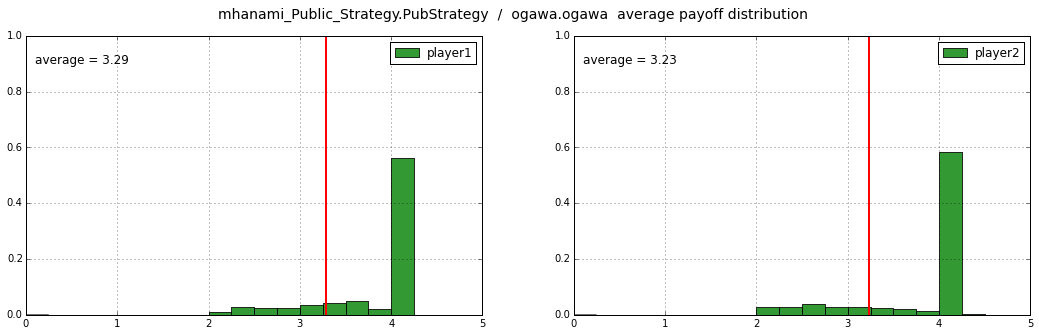

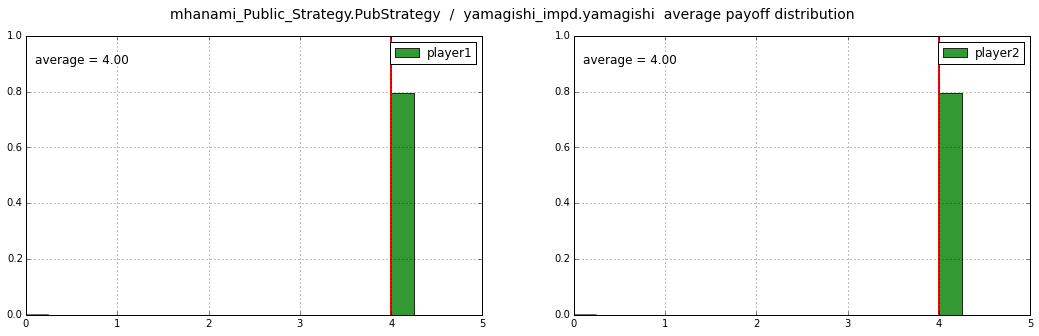

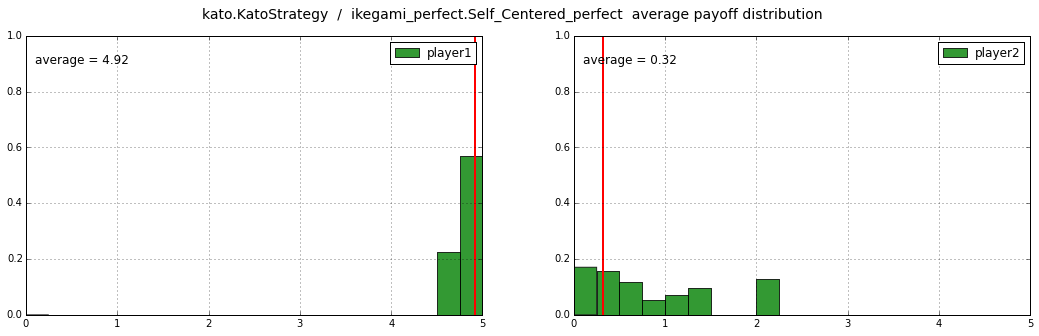

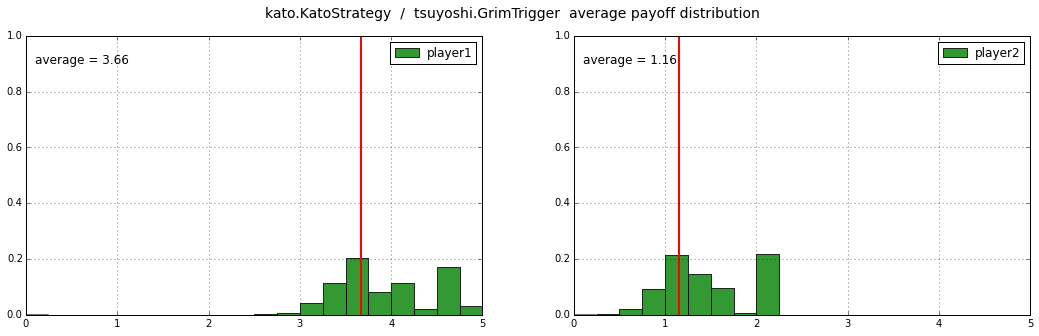

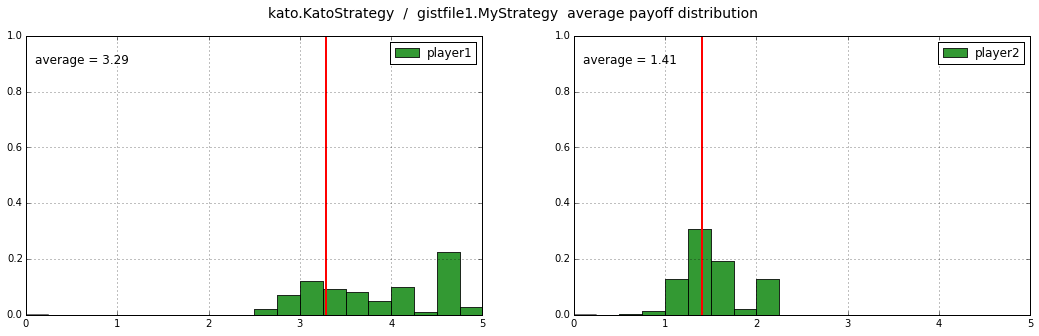

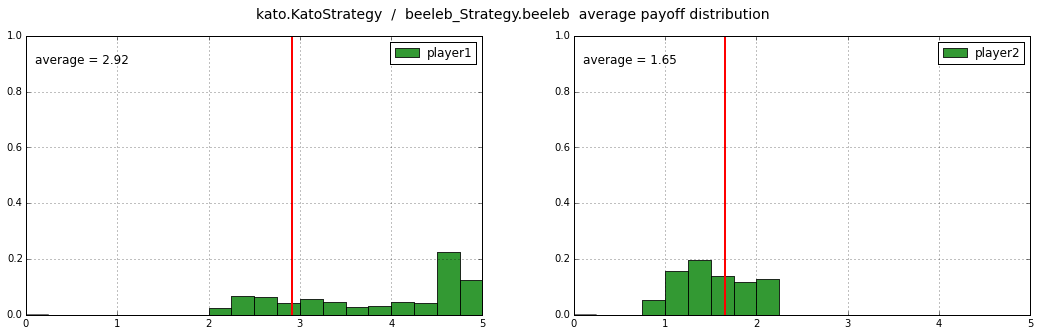

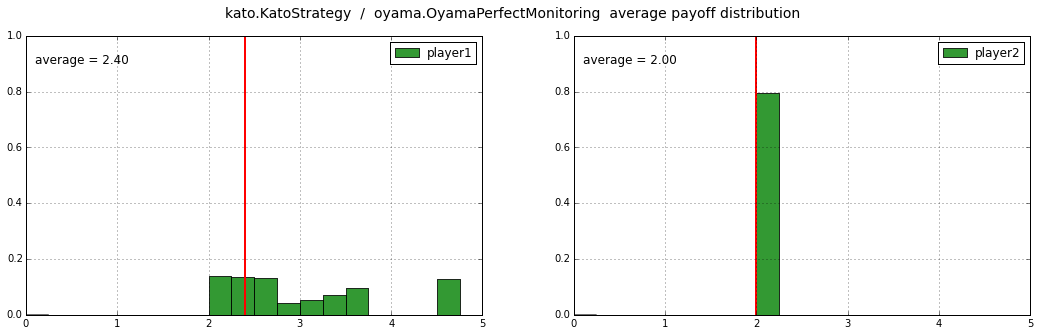

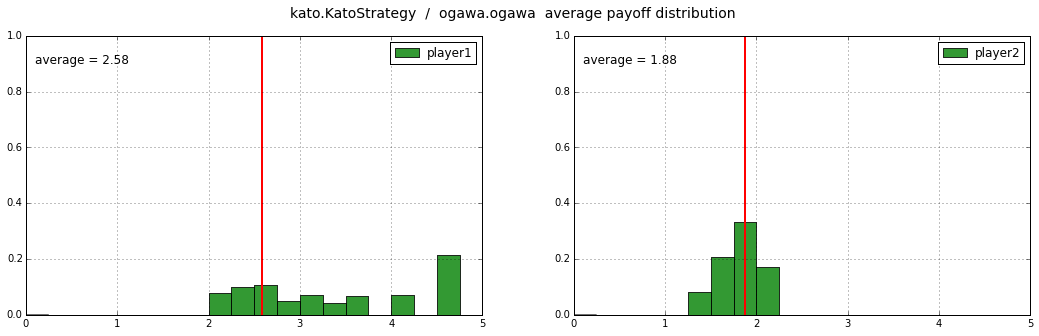

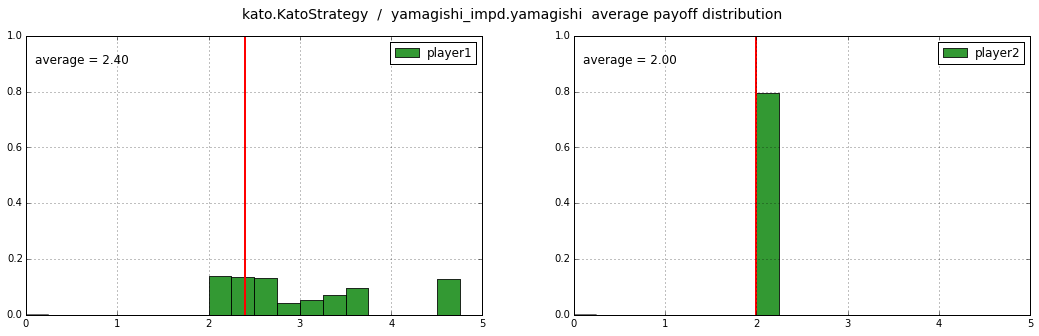

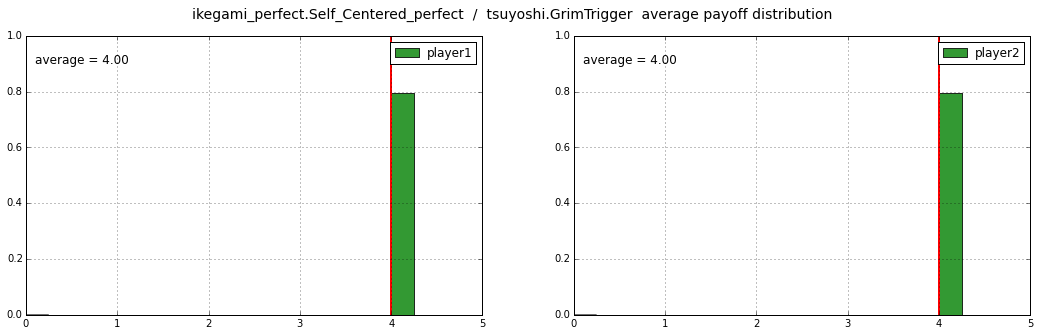

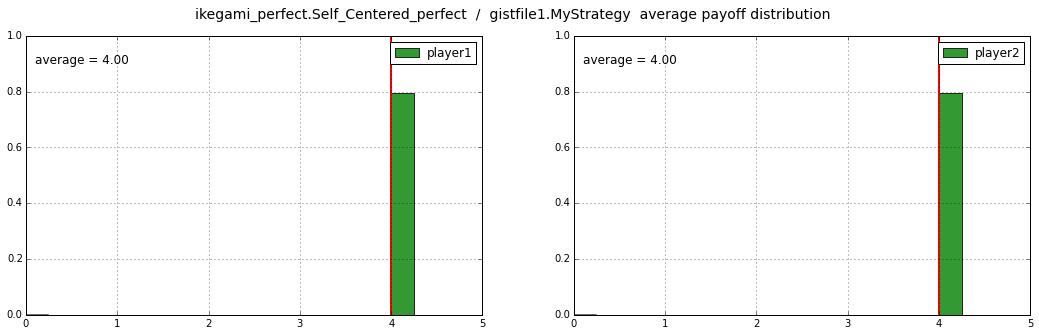

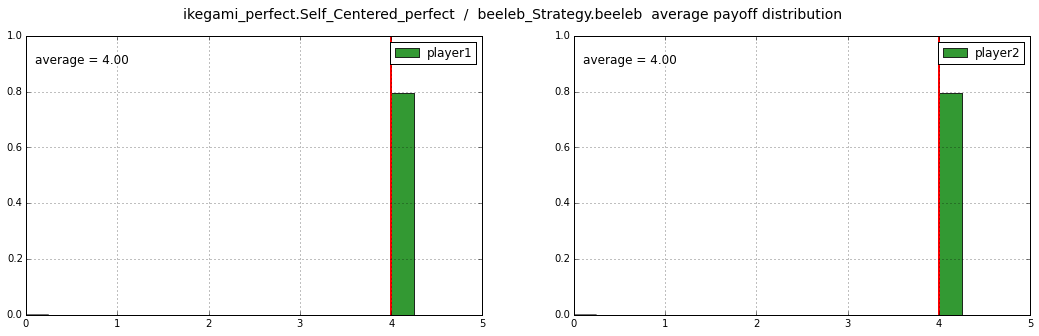

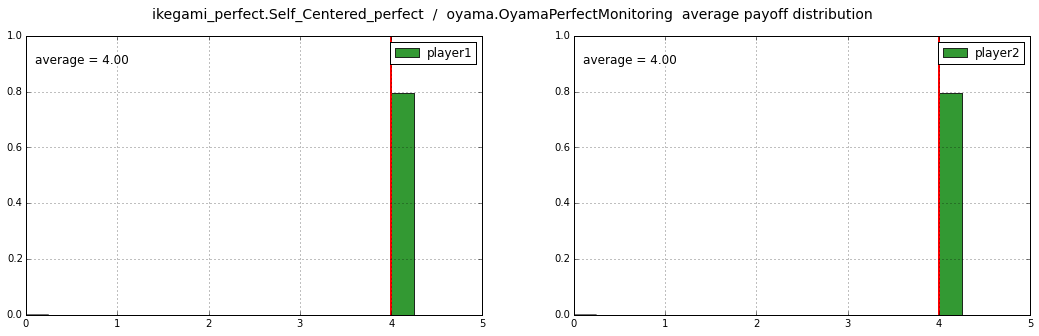

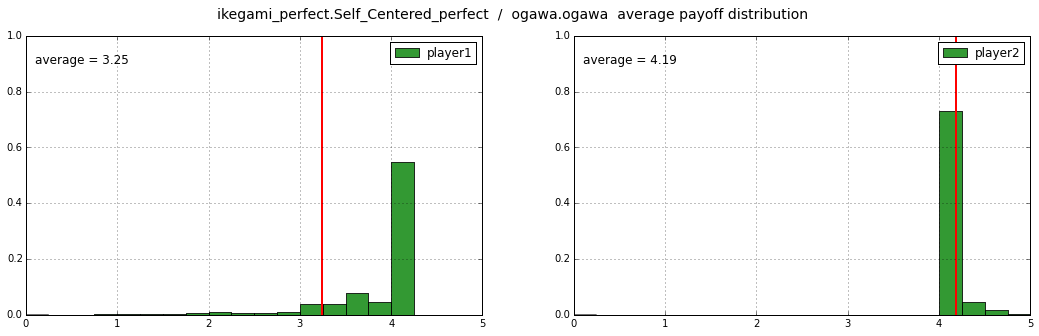

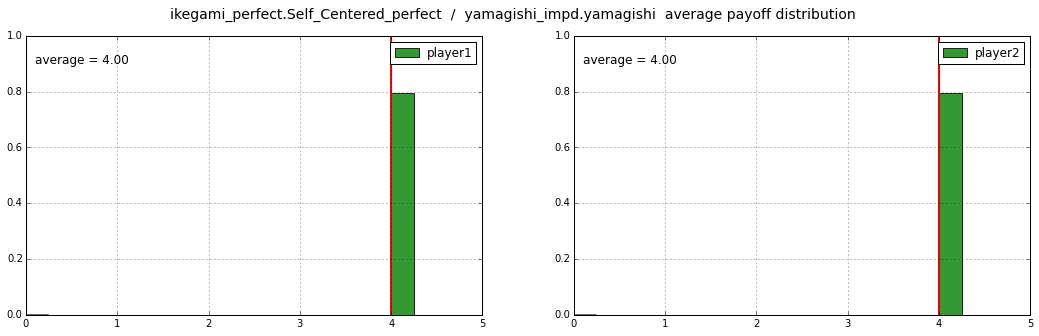

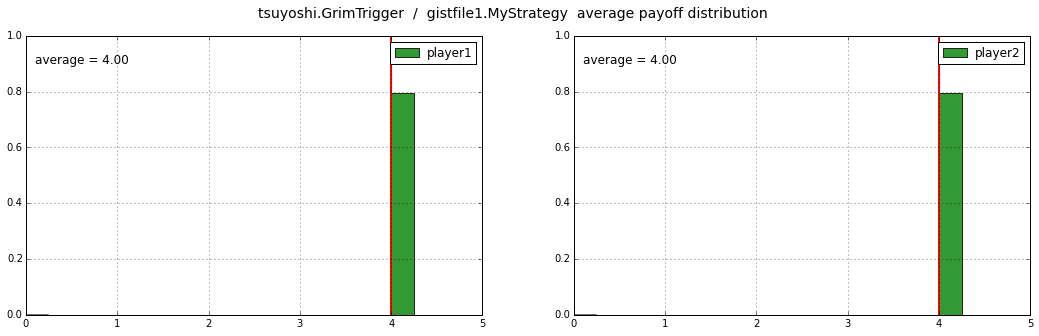

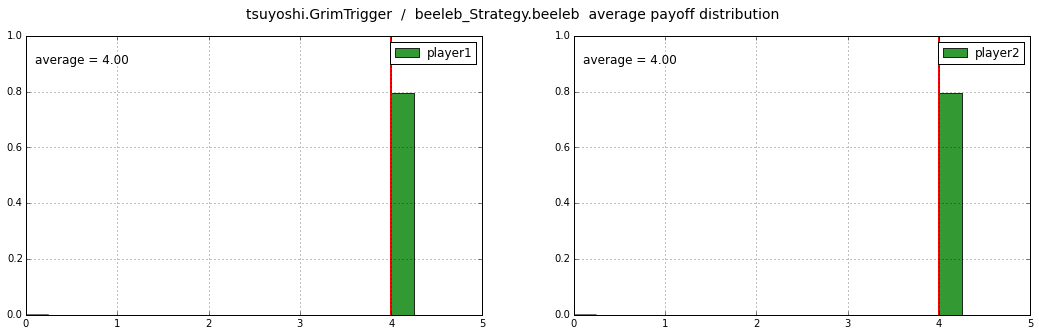

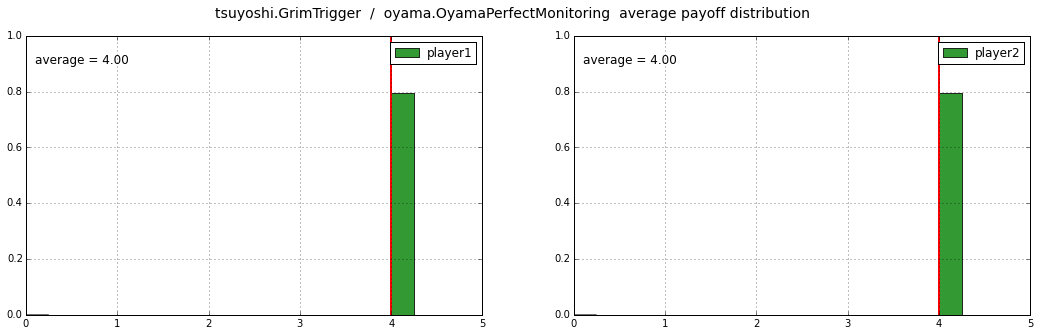

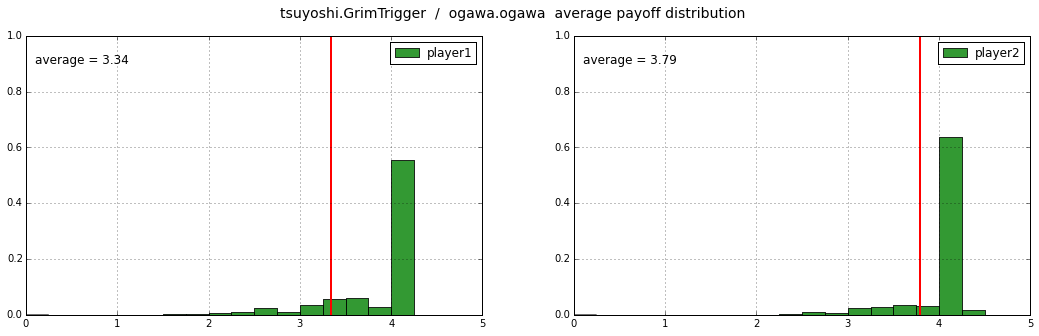

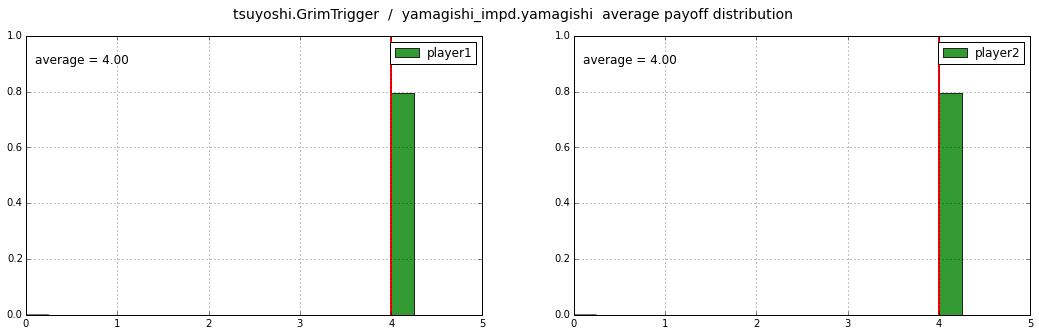

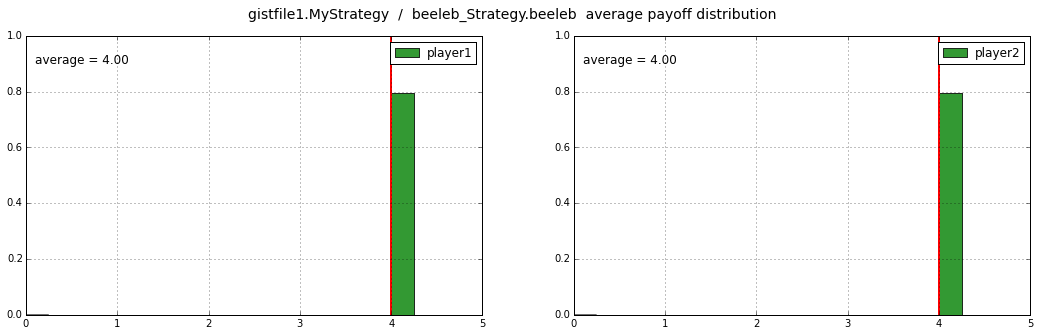

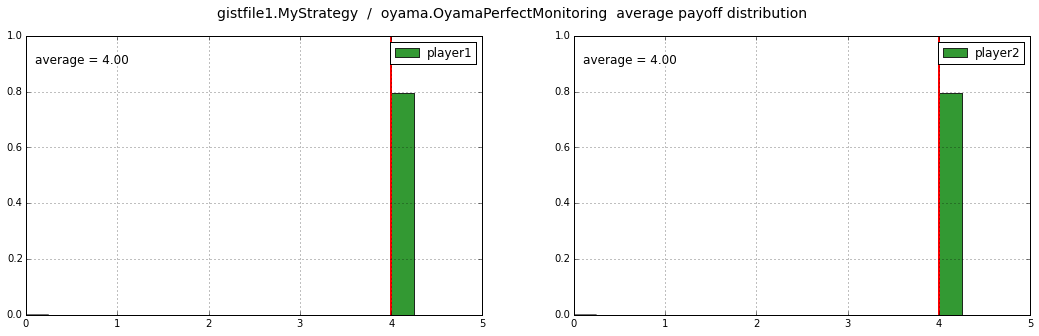

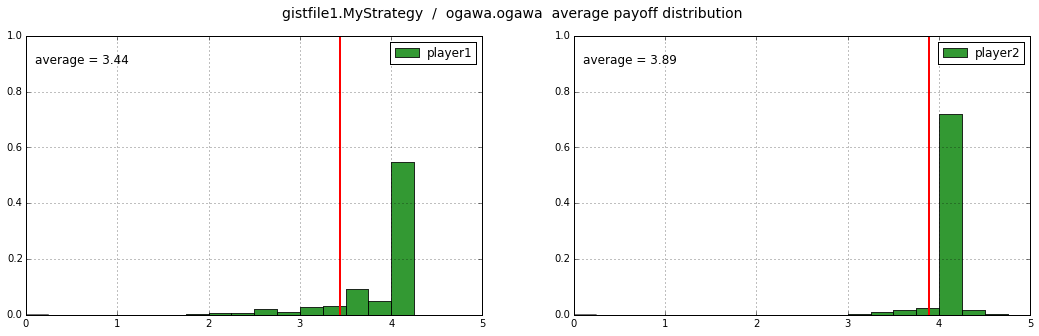

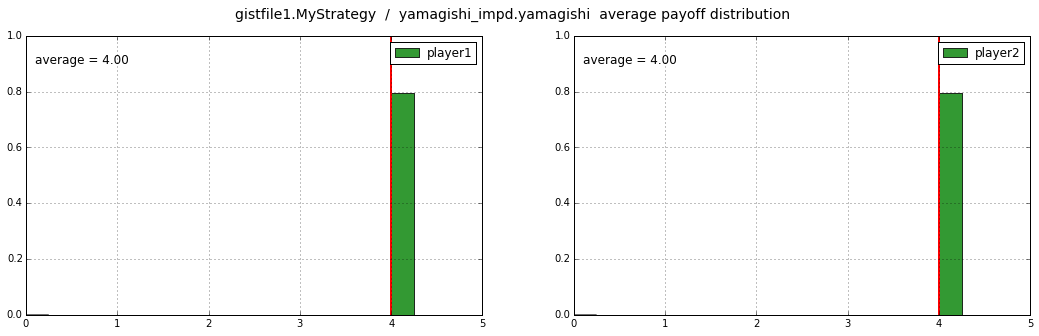

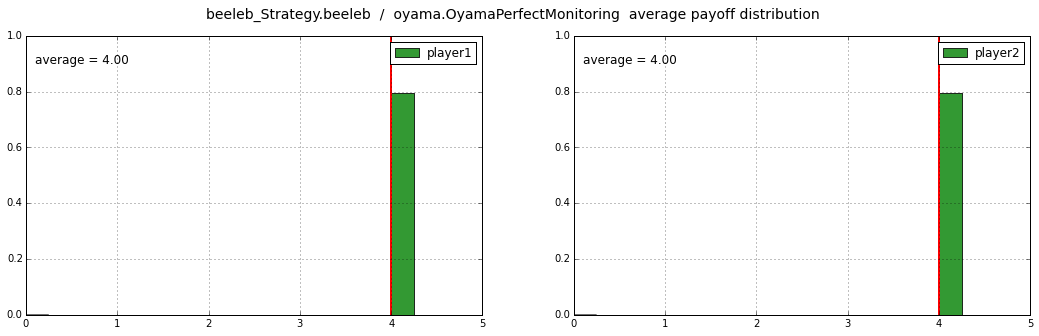

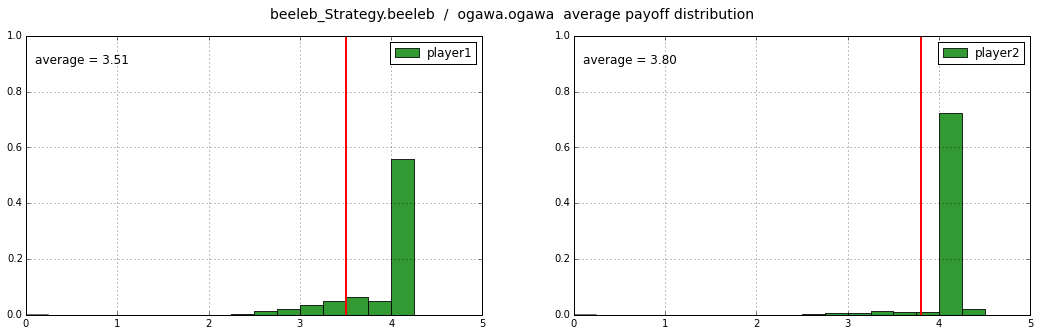

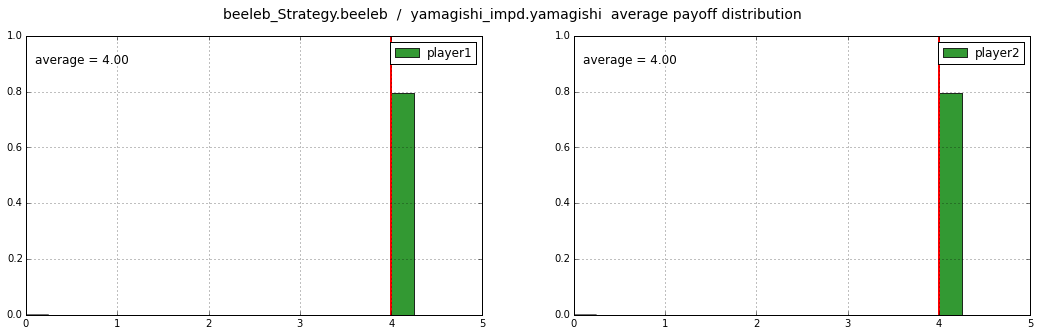

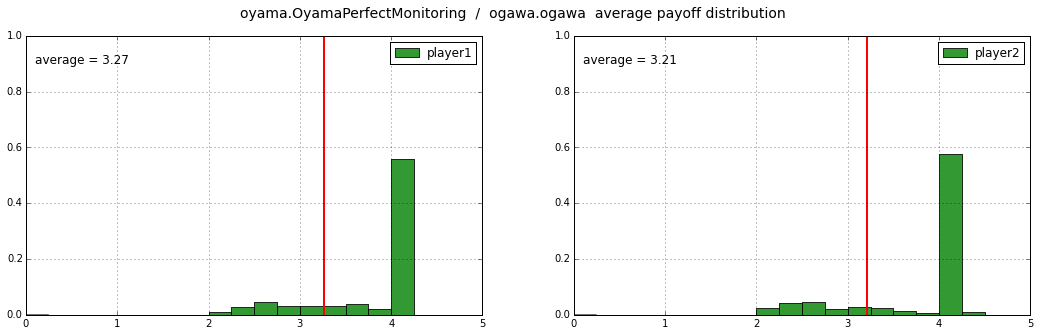

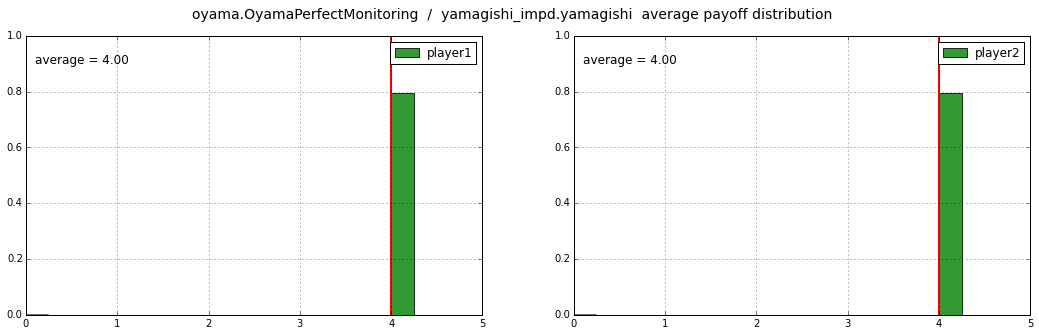

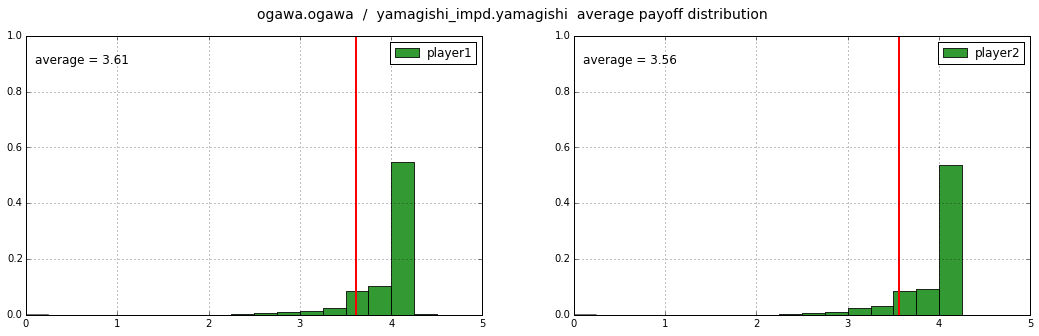

In [9]:
def __plotAve__(ts_length, ave_payoff1, ave_payoff2, **kwargs):
    title = kwargs.get('title', None)
    fig = plt.figure(figsize=(18, 5)) 
    
    weight1 = np.ones_like(ave_payoff1)/ts_length/100
    ax1 = plt.subplot(1, 2, 1)
    ax1.hist(ave_payoff1, bins=20, range=(0, 5), weights=weight1, normed=False, facecolor='g', alpha=0.8, label='player1')
    plt.legend()
    ax1.grid(True)
    
    weight2 = np.ones_like(ave_payoff2)/ts_length/100
    ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
    ax2.hist(ave_payoff2, bins=20, range=(0, 5), weights=weight2, normed=False, facecolor='g', alpha=0.8, label='player2')
    plt.legend()
    ax2.grid(True)
    
    mu1 = np.mean(ave_payoff1)
    mu2 = np.mean(ave_payoff2)
    ax1.axvline(x=mu1, linewidth=2, color='r')
    ax2.axvline(x=mu2, linewidth=2, color='r')
    plt.ylim(0, 1)
    ax1.text(0.1, 0.9, "average = {0:.2f}".format(mu1), size=12)
    ax2.text(0.1, 0.9, "average = {0:.2f}".format(mu2), size=12)

    if title:
        plt.suptitle(title, size=14)
    plt.show()


def plotAve(df):
    # 対戦組み合わせの数
    match_len = df['Match'].max() + 1

    # 1対戦のゲーム数
    round_len = df['Round'].max() + 1

    # 最長period
    period_max = df['Period'].max() + 1

    for m in range(match_len):
        df_match = df[df.Match == m].reset_index()
        str1 = df_match['Strategy1'][0]
        str2 = df_match['Strategy2'][0]
        df_match_s = df_match.loc[:, ["Round", "Period", "Payoff1", "Payoff2"]]
        df_match_np = df_match_s.as_matrix()

        periods = np.arange(period_max)
        ave_payoff1 = np.zeros(round_len, dtype=float)
        ave_payoff2 = np.zeros(round_len, dtype=float)

        for r in range(round_len):
            df_round = df_match_np[df_match_np[:, 0] == r]
            period_len = int(df_round[:, 1].max()+1)
            ave_payoff1[r] = df_round[:, 2].mean()
            ave_payoff2[r] = df_round[:, 3].mean()

        __plotAve__(ts_length, ave_payoff1, ave_payoff2, title='{0}  /  {1}  average payoff distribution'.format(str1, str2))
        

# 結果の読み込み
df_perfect = pd.read_csv("record_perfect.csv")
plotAve(df_perfect)

## Case2: Imperfect public monitoring

In [10]:
# プロジェクトが成功か失敗かを返す
def public_signal(actions):
    prob = rs.uniform()
    if actions[0] == 0 and actions[1] == 0:
        return 0 if prob < 0.9 else 1

    elif (actions[0] == 0 and actions[1] == 1) or (actions[0] == 1 and actions[1] == 0):
        return 0 if prob < 0.5 else 1

    elif actions[0] == 1 and actions[1] == 1:
        return 0 if prob < 0.2 else 1

    else:
        raise ValueError
        
strategies = [Iida_ipm, KatoStrategy, Self_Centered_public,
              ImPubStrategy, GrimTrigger, MyStrategy, beeleb, OyamaImperfectPublicMonitoring, ogawa, yamagishi]
game = pl.RepeatedMatrixGame(payoff, strategies, signal=public_signal, ts_length=ts_length, repeat=1000)
game.play(mtype="public", random_seed=seed, record=False)

Start
The object has 10 strategy functions below
****************************************
Iida_imperfect_public.Iida_ipm
kato.KatoStrategy
ikegami_imperfect_public.Self_Centered_public
mhanami_Imperfect_Public_Strategy.ImPubStrategy
tsuyoshi.GrimTrigger
gistfile1.MyStrategy
beeleb_Strategy.beeleb
oyama.OyamaImperfectPublicMonitoring
ogawa.ogawa
yamagishi_impd.yamagishi
****************************************
Repeats: 1000
Total time series length: 34333

Game 1: "Iida_imperfect_public.Iida_ipm" vs "kato.KatoStrategy"
total score of Iida_imperfect_public.Iida_ipm: 54398.000, per stage: 1.584
total score of kato.KatoStrategy: 95068.000, per stage: 2.769

Game 2: "Iida_imperfect_public.Iida_ipm" vs "ikegami_imperfect_public.Self_Centered_public"
total score of Iida_imperfect_public.Iida_ipm: 157243.000, per stage: 4.580
total score of ikegami_imperfect_public.Self_Centered_public: 57688.000, per stage: 1.680

Game 3: "Iida_imperfect_public.Iida_ipm" vs "mhanami_Imperfect_Public_Strategy.

## スコアテーブル

行: 利得を表示するプレイヤー　列: 対戦相手

In [11]:
score_public = np.array([[0, 54398, 157243, 51002, 127446, 142462, 138347, 87568, 100961, 106747], 
 [95068, 0, 170665, 66666, 134419, 147247, 134836, 87358, 105889, 101710], 
 [57688, 4000, 0, 0, 117668, 136032, 137264, 70068, 81900, 115748], 
 [95162, 71666, 171665, 0, 134240, 147719, 135476, 86936, 106589, 100757], 
 [74731, 28164, 142248, 24950, 0, 137083, 138749, 75810, 90198, 114085], 
 [67987, 19612, 137657, 15964, 117708, 0,136851, 75450, 87852, 116362], 
 [69502, 27886, 137349, 24126, 117904, 136161, 0, 82602, 90045, 115409], 
 [97498, 59538, 154148, 56486, 129200, 141190, 134897, 0, 104634, 109458], 
 [87296, 47184, 151190, 43384, 125223, 140727, 137015, 92504, 0, 110338], 
 [89082, 49970, 142728, 47272, 127345, 135922, 135634, 89598, 96163, 0]], dtype=float)

score_public /= 34333
score_public = pd.DataFrame(score_public)

print(score_public)

       0      1      2      3      4      5      6      7      8      9
0  0.000  1.584  4.580  1.486  3.712  4.149  4.030  2.551  2.941  3.109
1  2.769  0.000  4.971  1.942  3.915  4.289  3.927  2.544  3.084  2.962
2  1.680  0.117  0.000  0.000  3.427  3.962  3.998  2.041  2.385  3.371
3  2.772  2.087  5.000  0.000  3.910  4.303  3.946  2.532  3.105  2.935
4  2.177  0.820  4.143  0.727  0.000  3.993  4.041  2.208  2.627  3.323
5  1.980  0.571  4.009  0.465  3.428  0.000  3.986  2.198  2.559  3.389
6  2.024  0.812  4.000  0.703  3.434  3.966  0.000  2.406  2.623  3.361
7  2.840  1.734  4.490  1.645  3.763  4.112  3.929  0.000  3.048  3.188
8  2.543  1.374  4.404  1.264  3.647  4.099  3.991  2.694  0.000  3.214
9  2.595  1.455  4.157  1.377  3.709  3.959  3.951  2.610  2.801  0.000


<table>
<tr><th></th><th>Iida_ipm</th><th>KatoStrategy</th><th>Self_Centered_public</th><th>ImPubStrategy</th><th>GrimTrigger</th><th>MyStrategy</th><th>beeleb</th><th>OyamaImperfectPublic</th><th>ogawa</th><th>yamagishi</th></tr>
<tr><th>Iida_ipm</th><td>0.000</td><td>1.584</td><td>4.580</td><td>1.486</td><td>3.712</td><td>4.149</td><td>4.030</td><td>2.551</td><td>2.941</td><td>3.109</td></tr>
<tr><th>KatoStrategy</th><td>2.769</td><td>0.000</td><td>4.971</td><td>1.942</td><td>3.915</td><td>4.289</td><td>3.927</td><td>2.544</td><td>3.084</td><td>2.962</td></tr>
<tr><th>Self_Centered_public</th><td>1.680</td><td>0.117</td><td>0.000</td><td>0.000</td><td>3.427</td><td>3.962</td><td>3.998</td><td>2.041</td><td>2.385</td><td>3.371</td></tr>
<tr><th>ImPubStrategy</th><td>2.772</td><td>2.087</td><td>5.000</td><td>0.000</td><td>3.910</td><td>4.303</td><td>3.946</td><td>2.532</td><td>3.105</td><td>2.935</td></tr>
<tr><th>GrimTrigger</th><td>2.177</td><td>0.820</td><td>4.143</td><td>0.727</td><td>0.000</td><td>3.993</td><td>4.041</td><td>2.208</td><td>2.627</td><td>3.323</td></tr>
<tr><th>MyStrategy</th><td>1.980</td><td>0.571</td><td>4.009</td><td>0.465</td><td>3.428</td><td>0.000</td><td>3.986</td><td>2.198</td><td>2.559</td><td>3.389</td></tr>
<tr><th>beeleb</th><td>2.024</td><td>0.812</td><td>4.000</td><td>0.703</td><td>3.434</td><td>3.966</td><td>0.000</td><td>2.406</td><td>2.623</td><td>3.361</td></tr>
<tr><th>OyamaImperfectPublic</th><td>2.840</td><td>1.734</td><td>4.490</td><td>1.645</td><td>3.763</td><td>4.112</td><td>3.929</td><td>0.000</td><td>3.048</td><td>3.188</td></tr>
<tr><th>ogawa</th><td>2.543</td><td>1.374</td><td>4.404</td><td>1.264</td><td>3.647</td><td>4.099</td><td>3.991</td><td>2.694</td><td>0.000</td><td>3.214</td></tr>
<tr><th>yamagishi</th><td>2.595</td><td>1.455</td><td>4.157</td><td>1.377</td><td>3.709</td><td>3.959</td><td>3.951</td><td>2.610</td><td>2.801</td><td>0.000</td></tr>

</table>

## グラフを出力

### Cooperationの割合

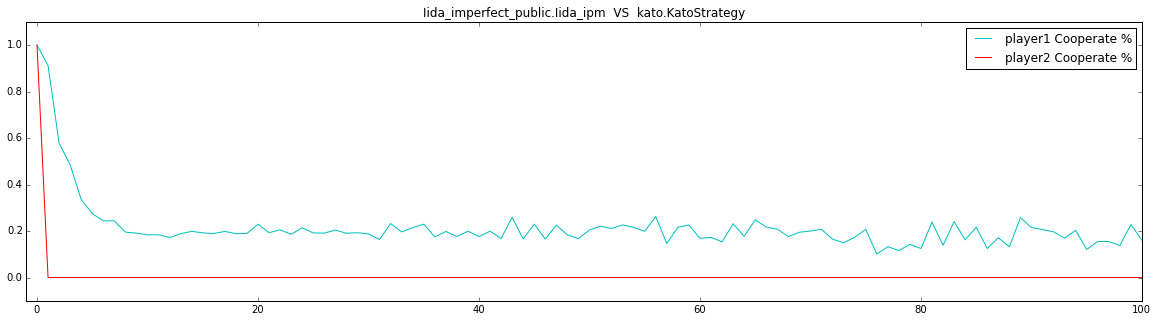

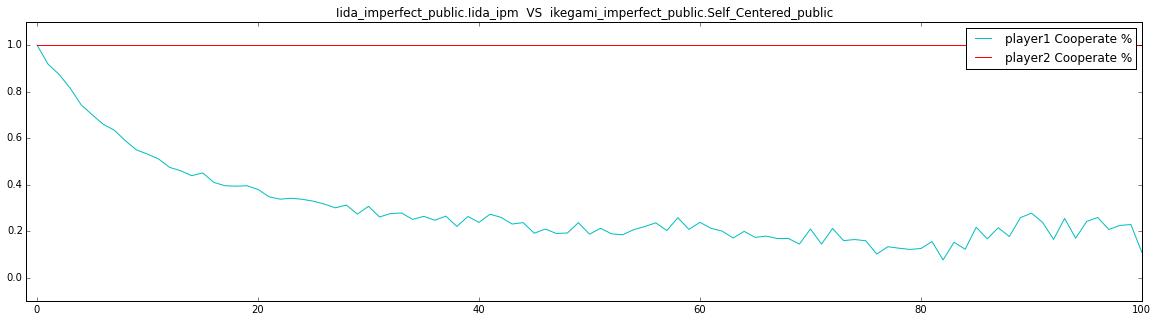

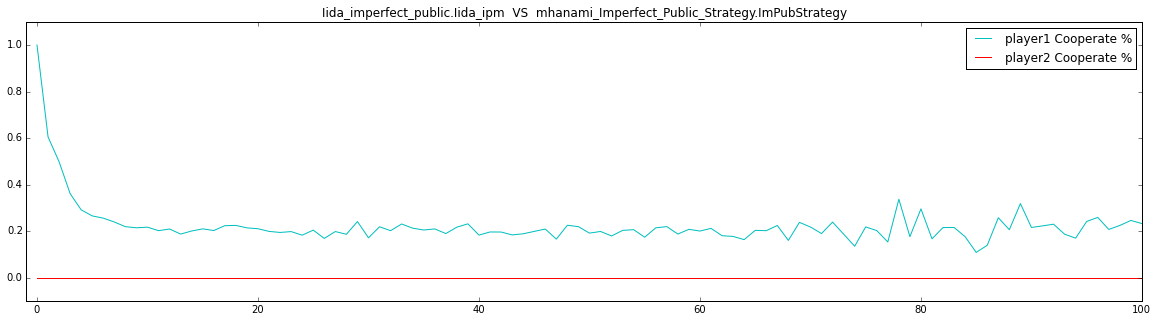

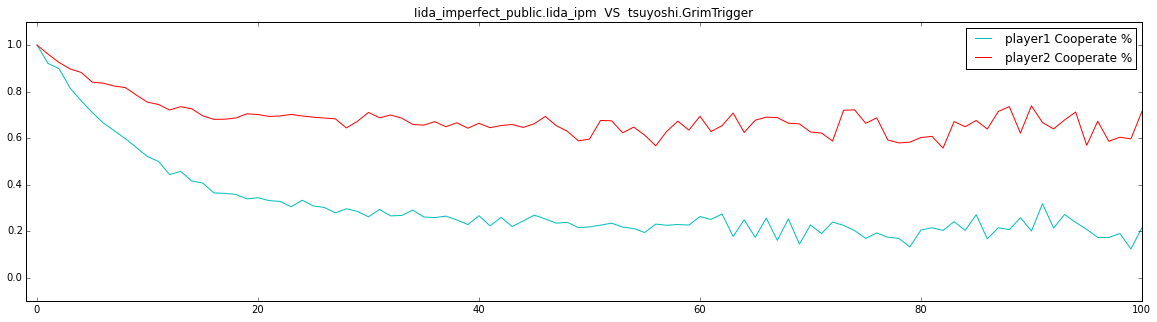

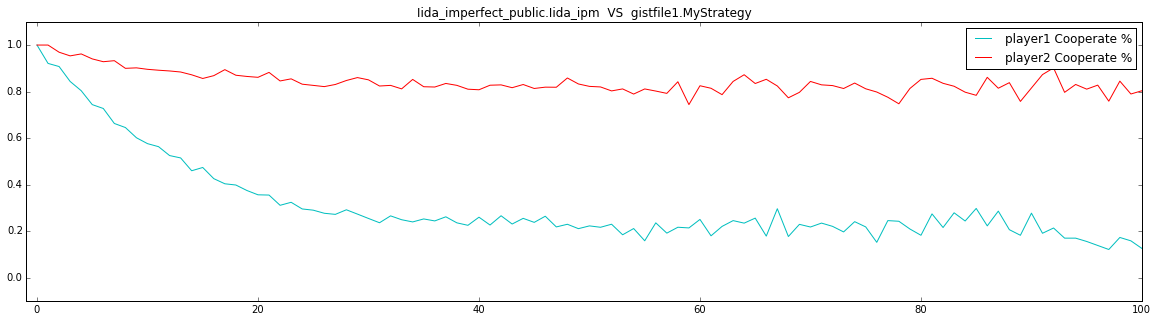

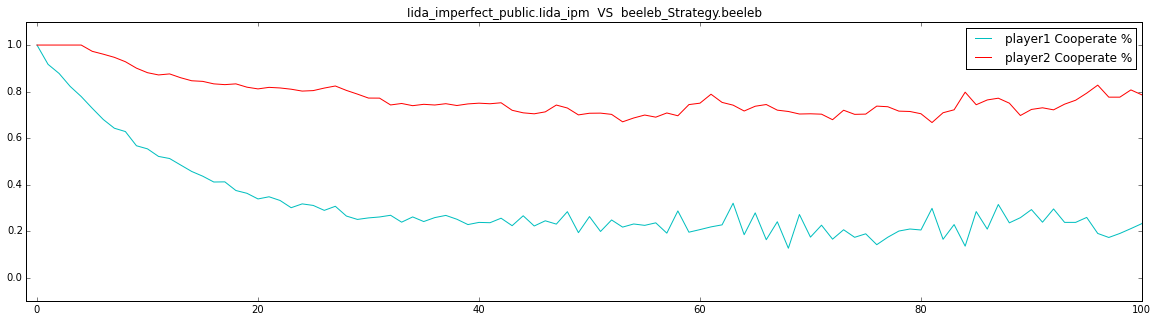

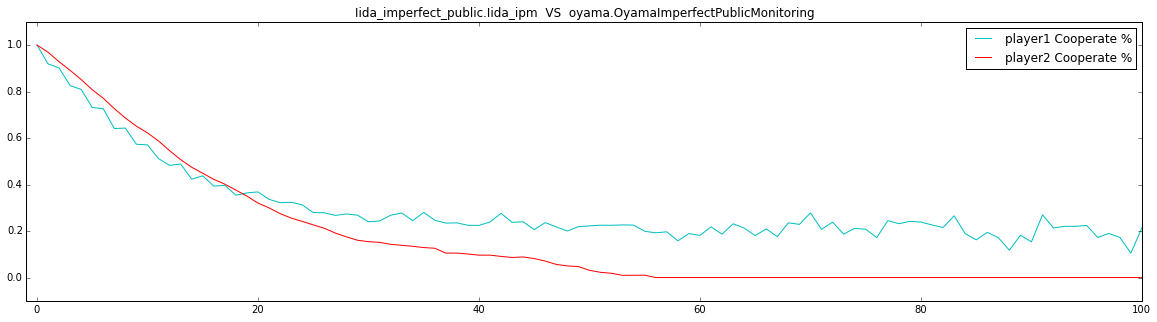

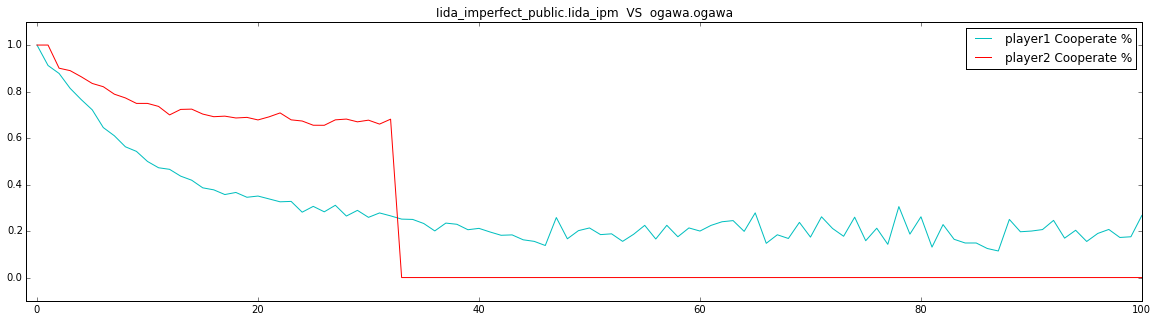

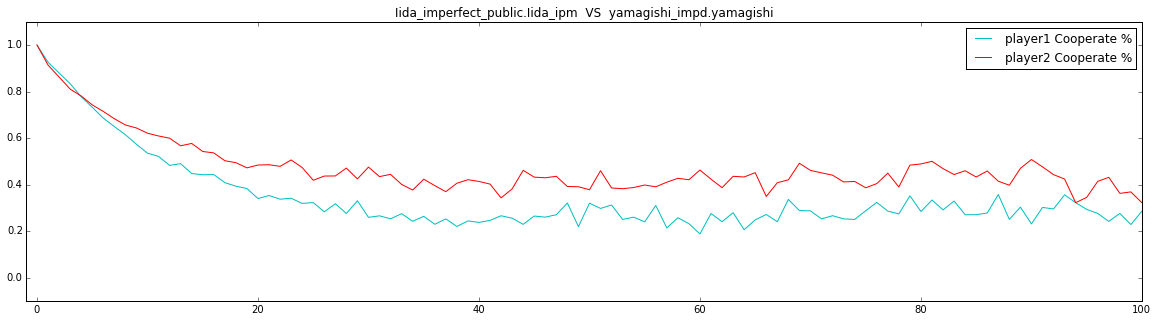

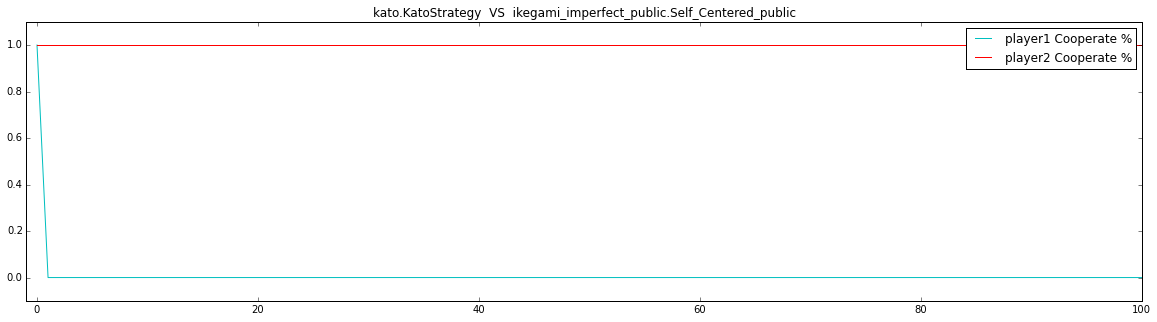

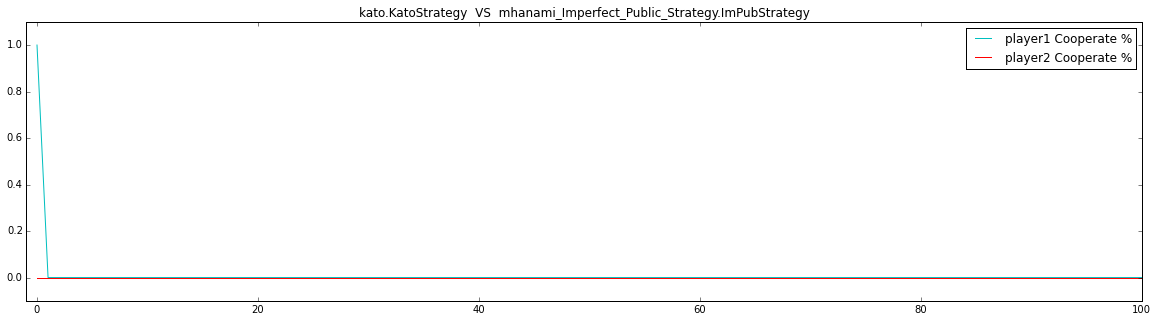

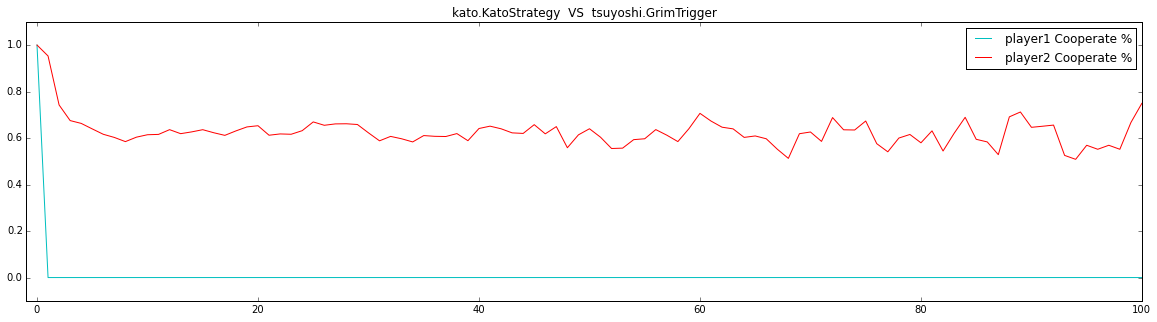

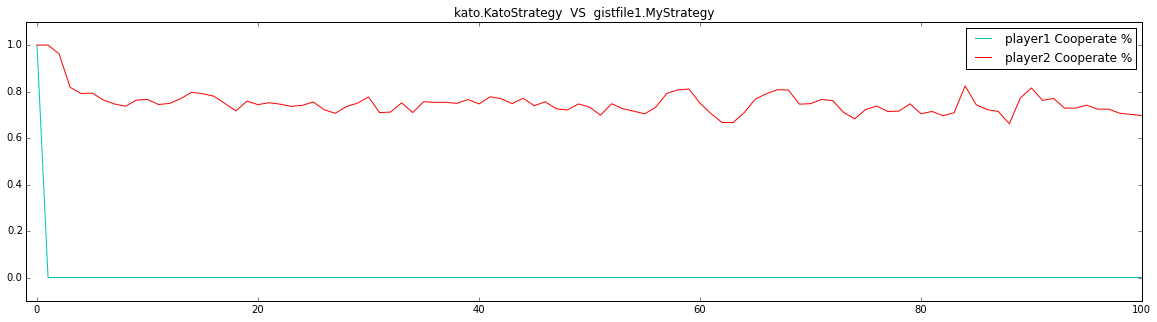

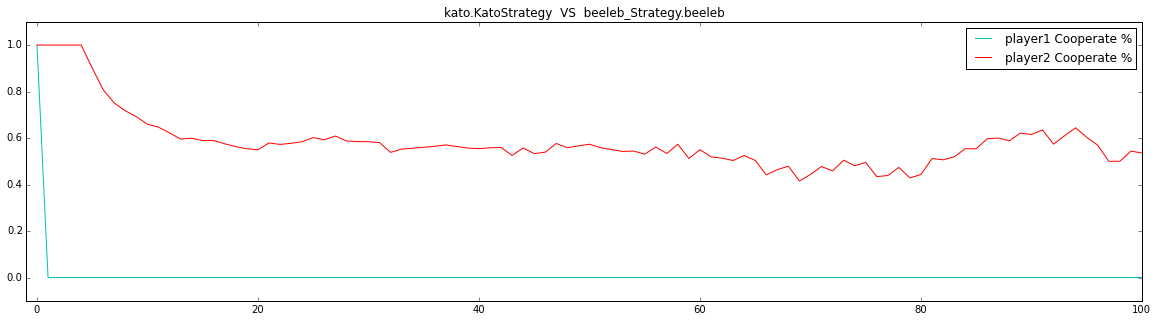

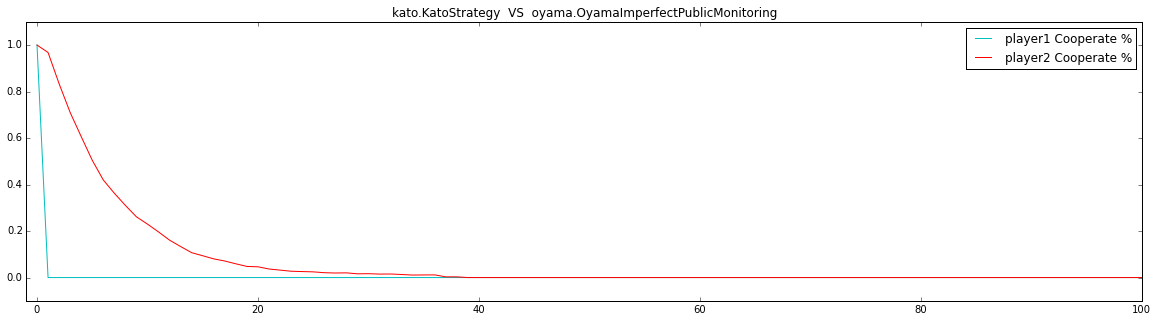

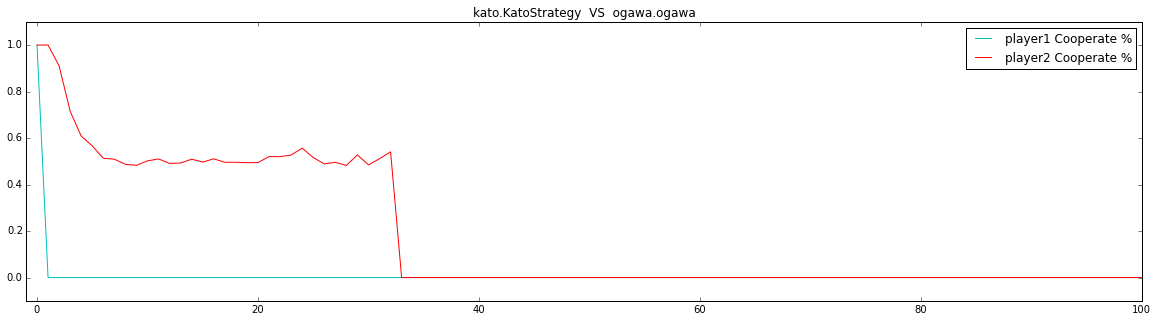

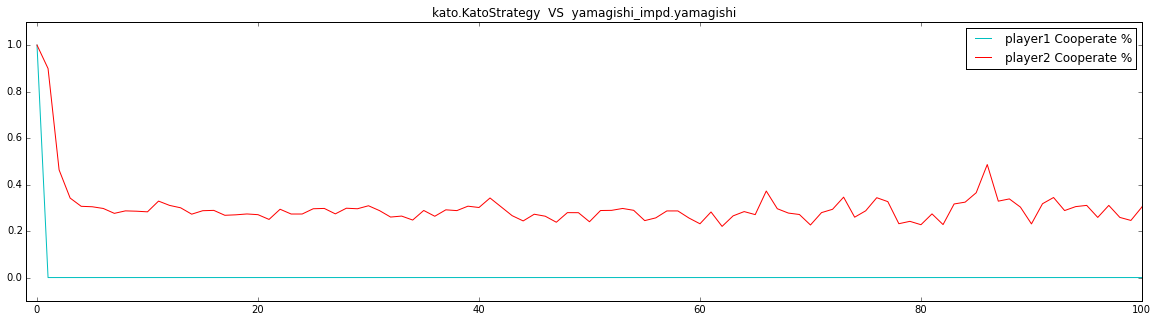

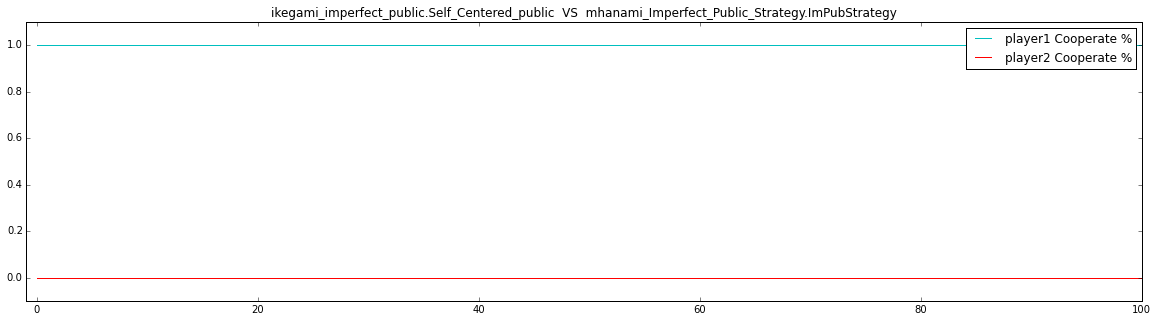

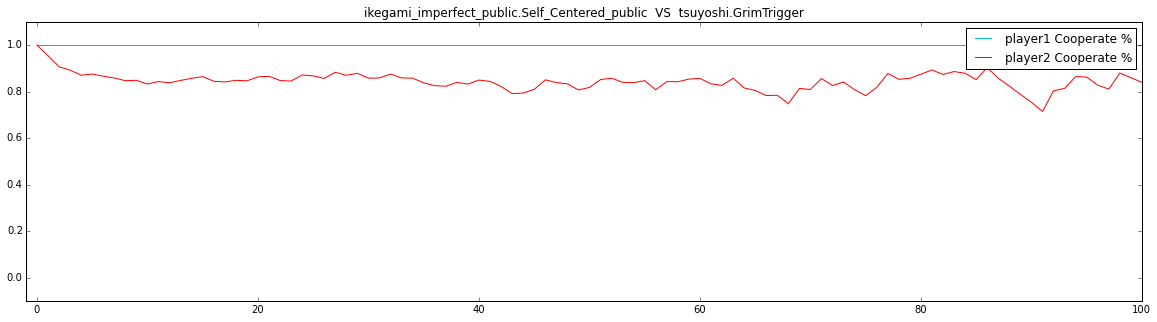

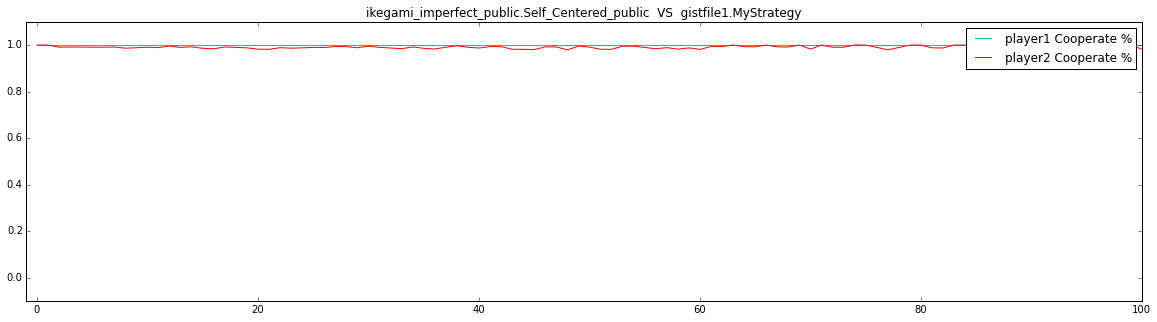

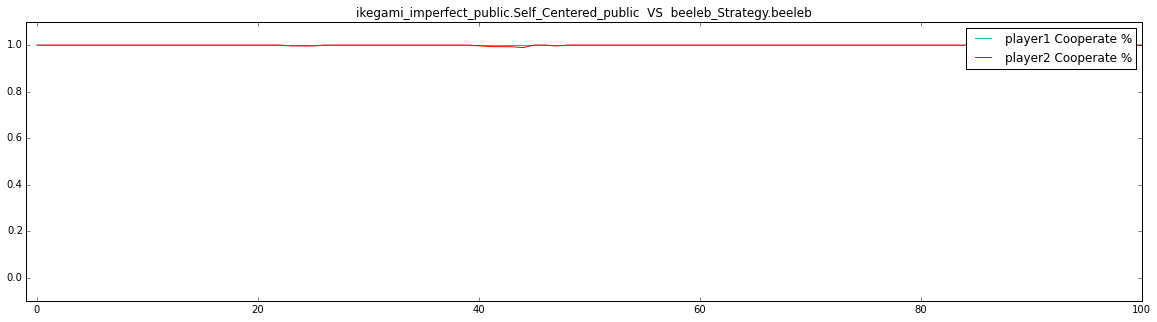

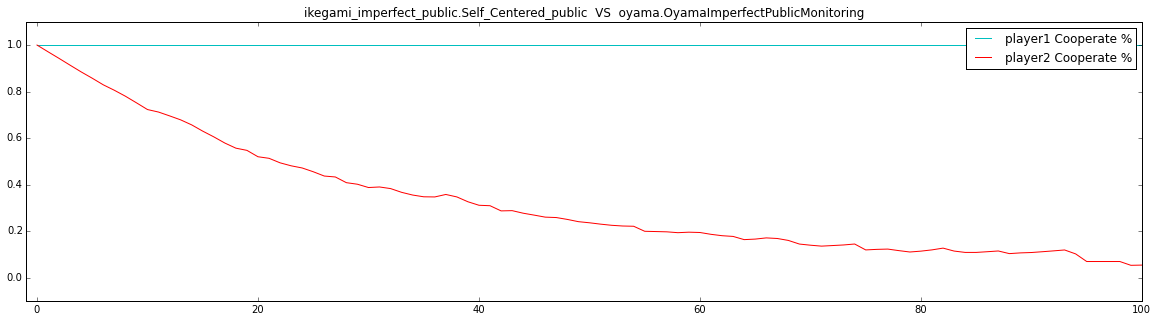

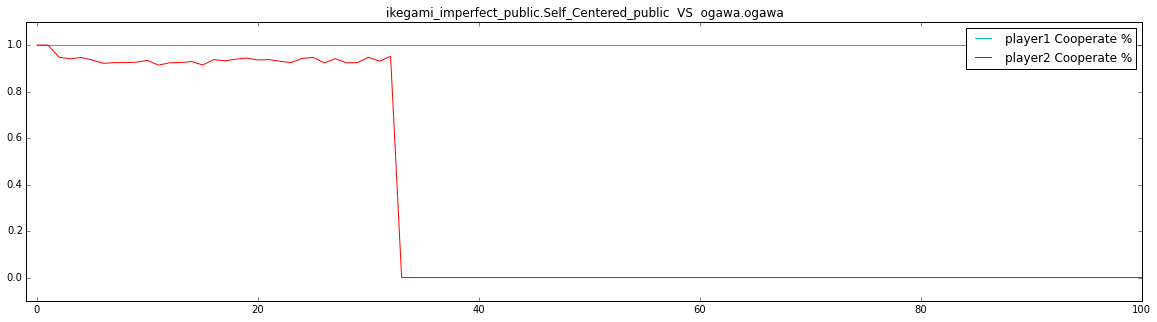

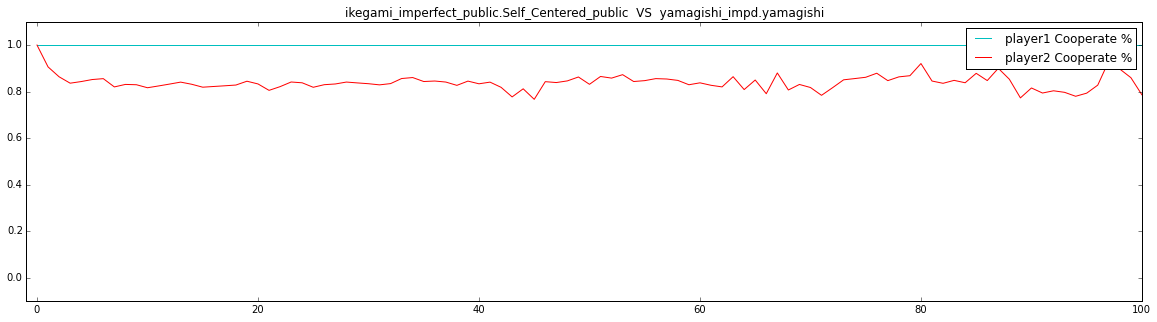

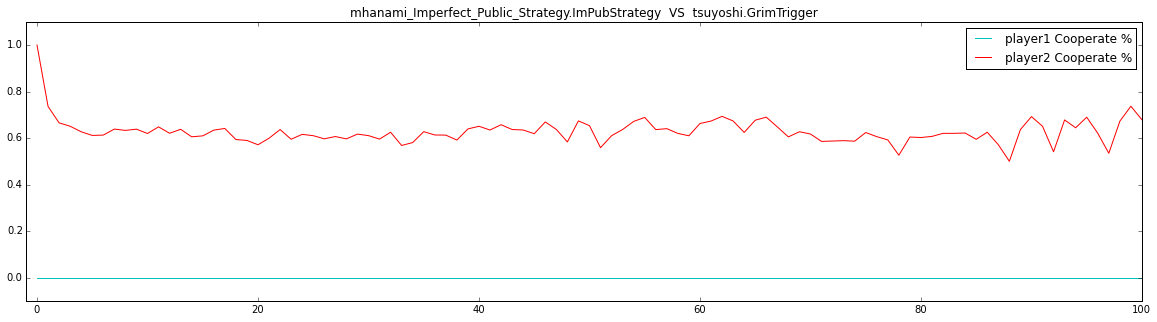

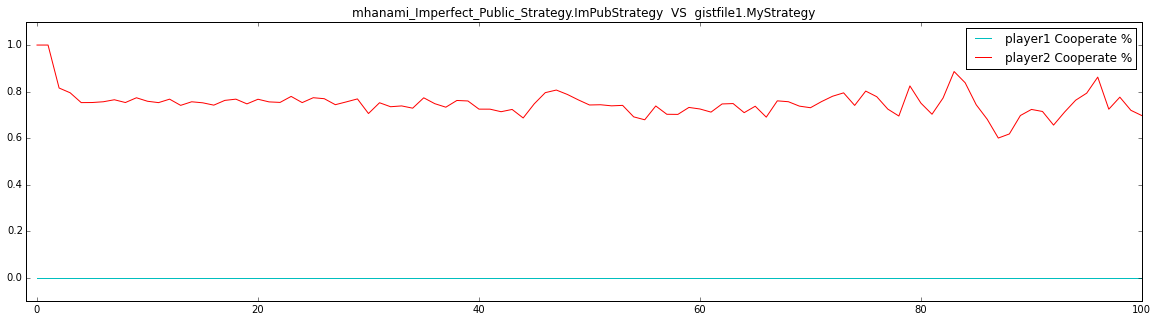

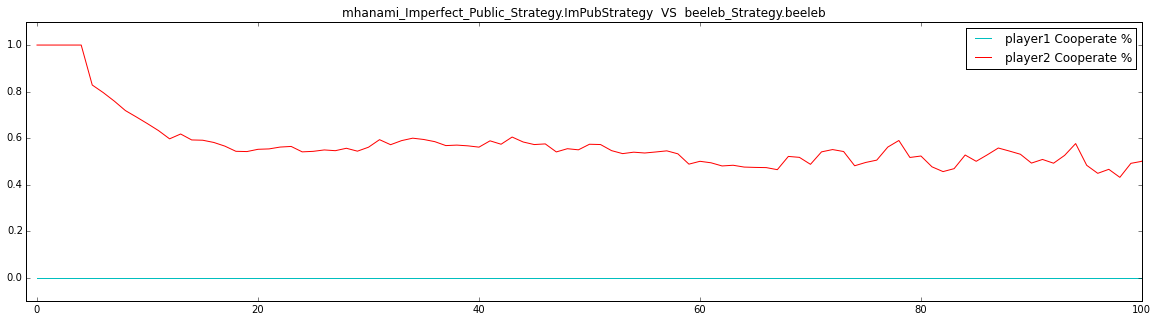

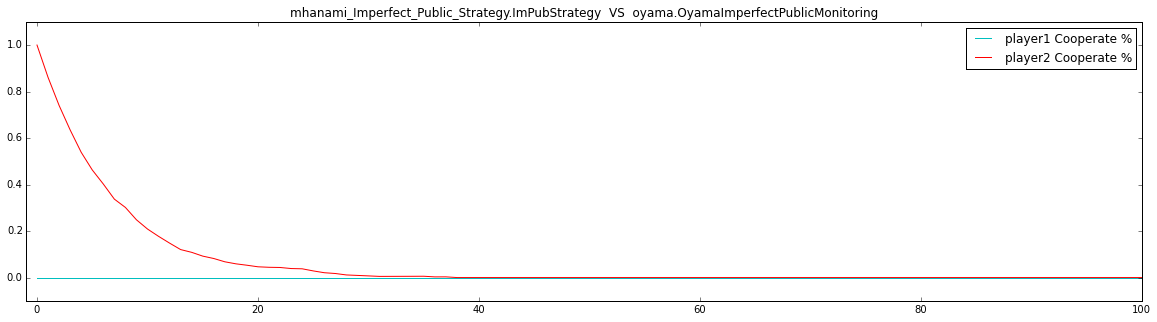

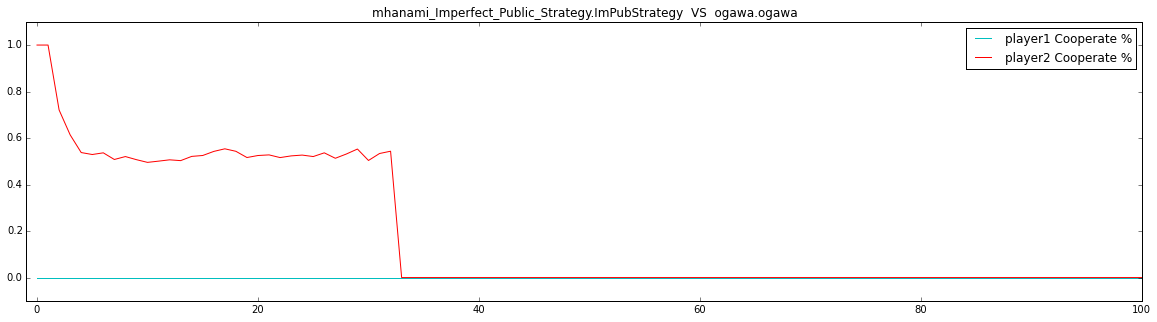

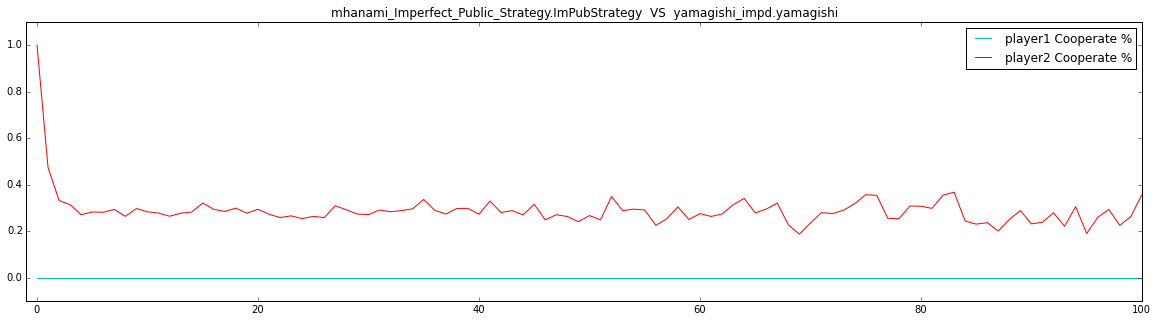

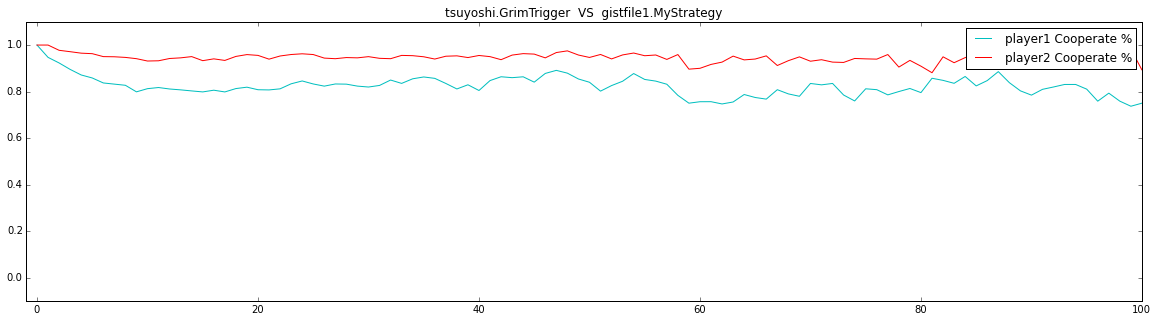

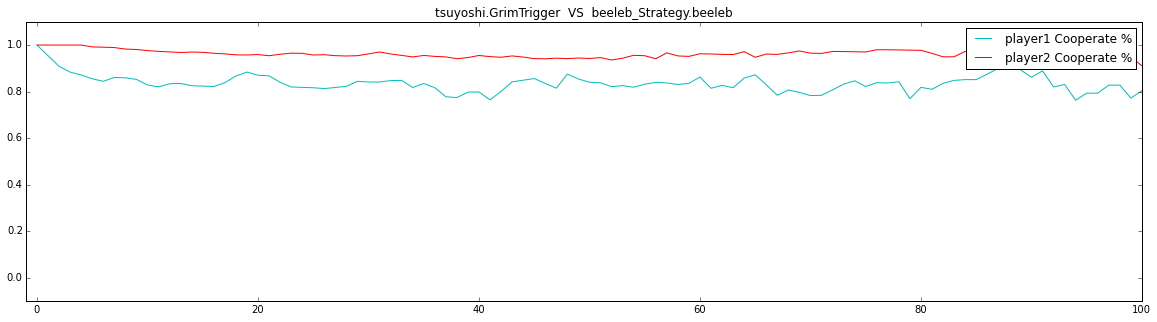

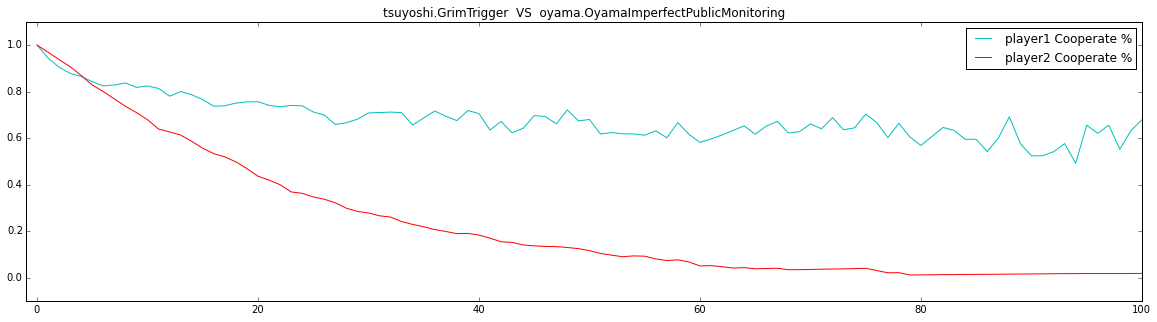

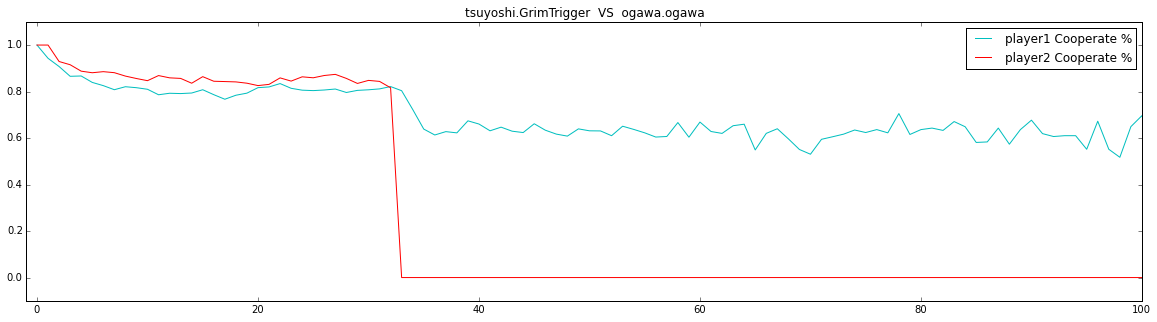

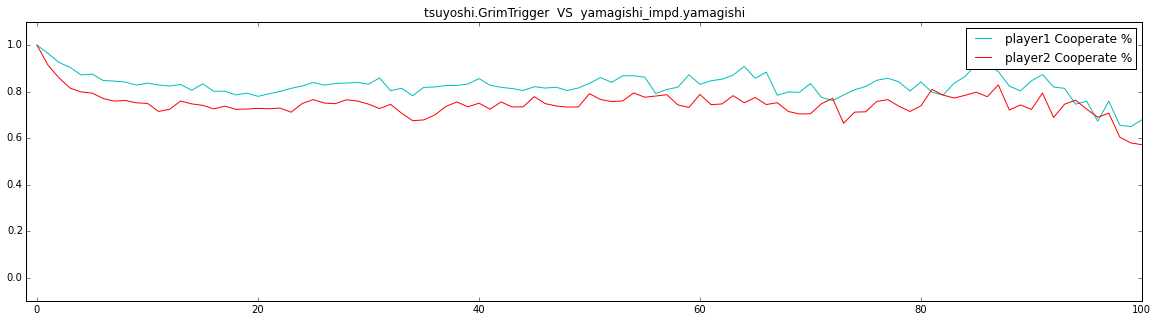

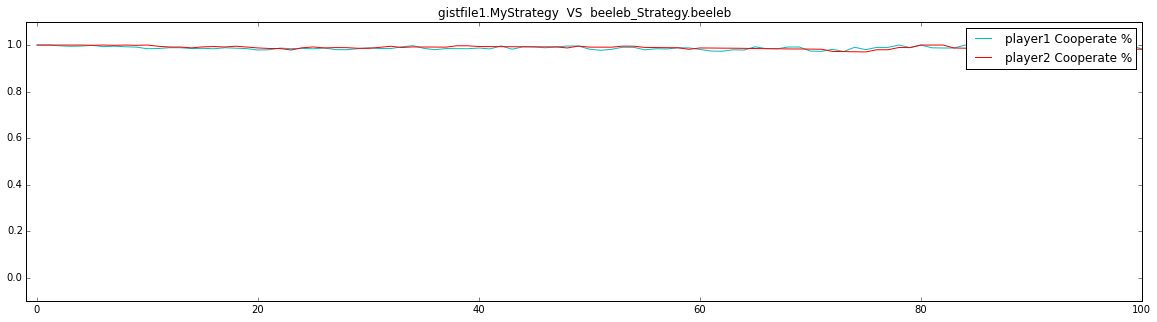

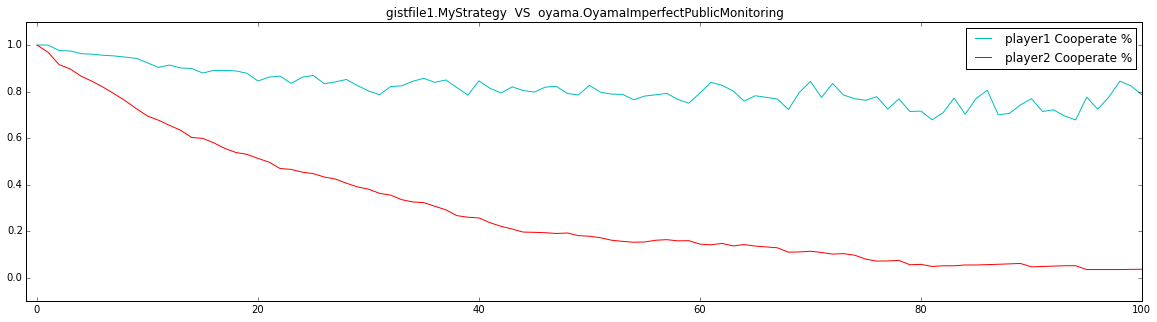

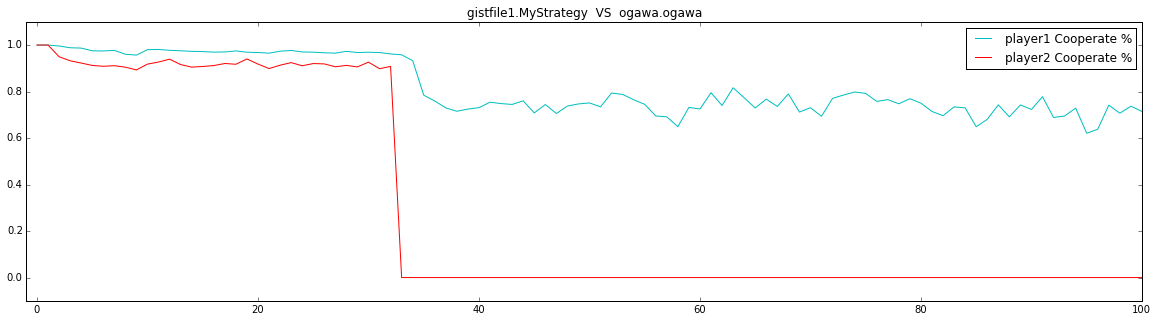

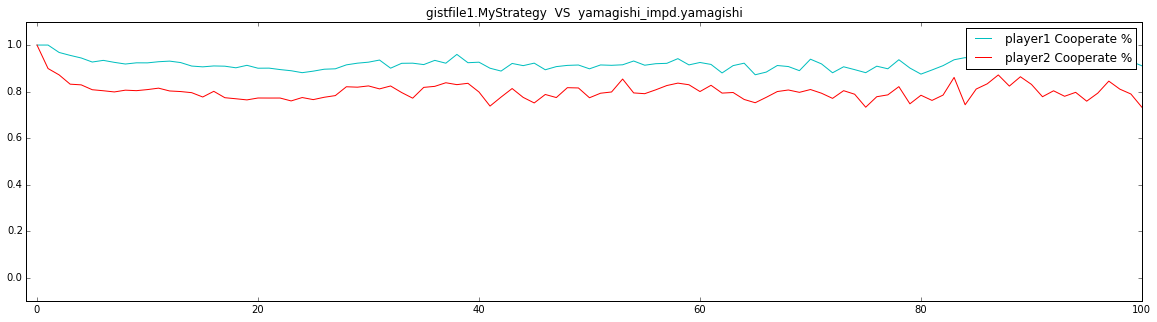

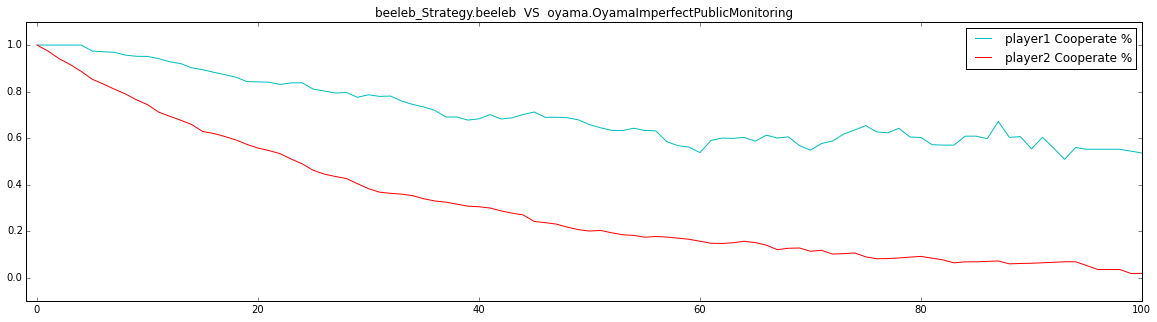

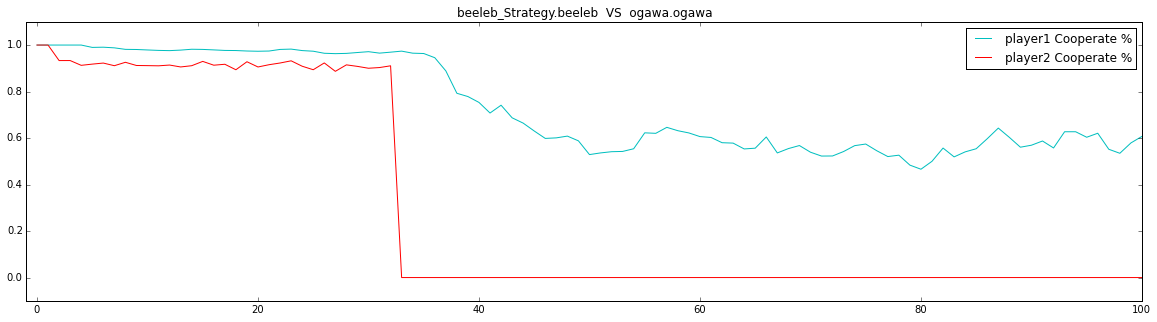

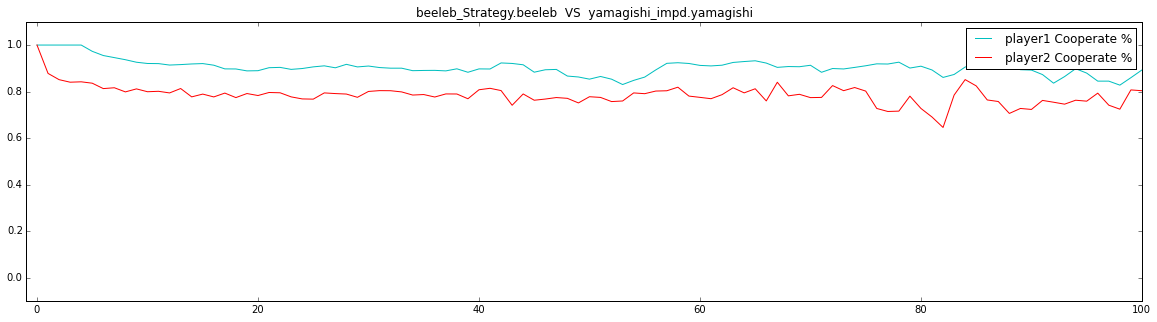

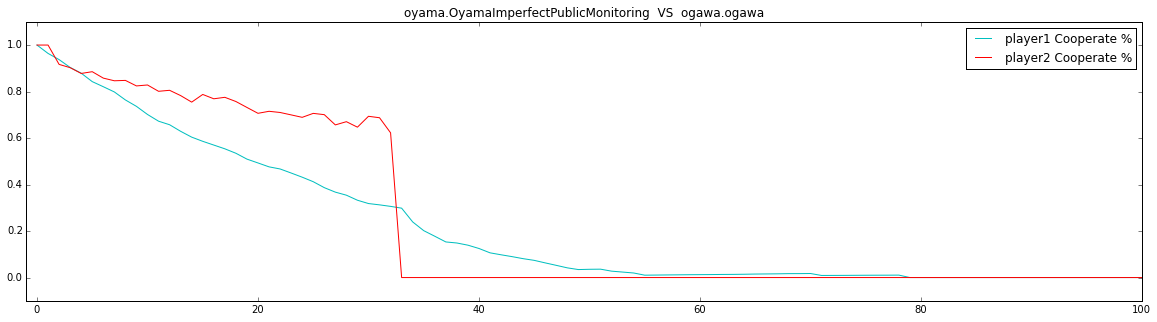

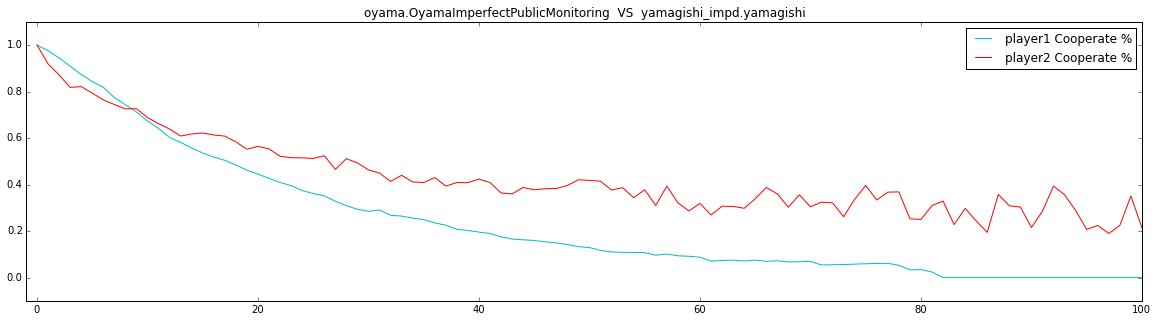

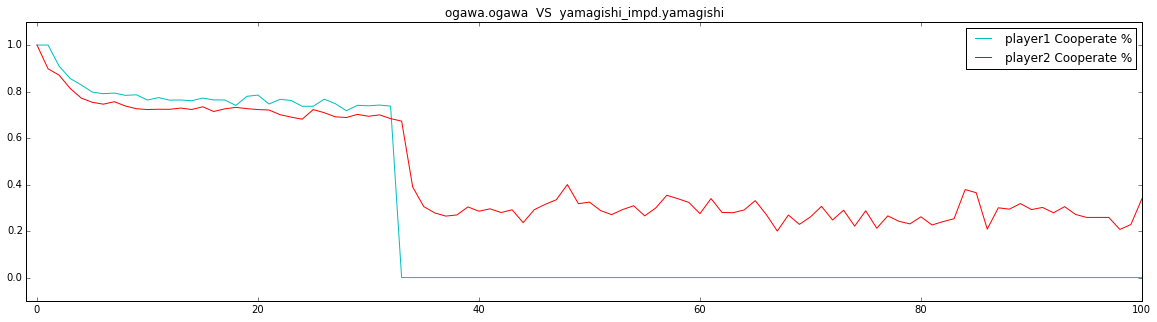

In [12]:
# 結果の読み込み
df_public = pd.read_csv("record_imperfect_public.csv")
plotC(df_public)

## 平均利得分布

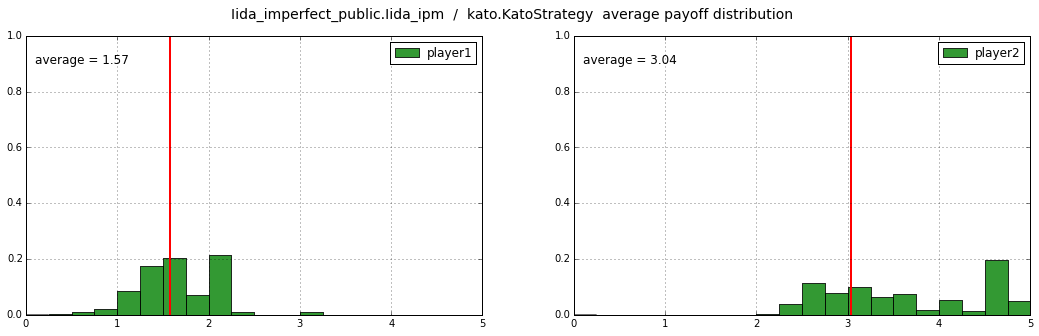

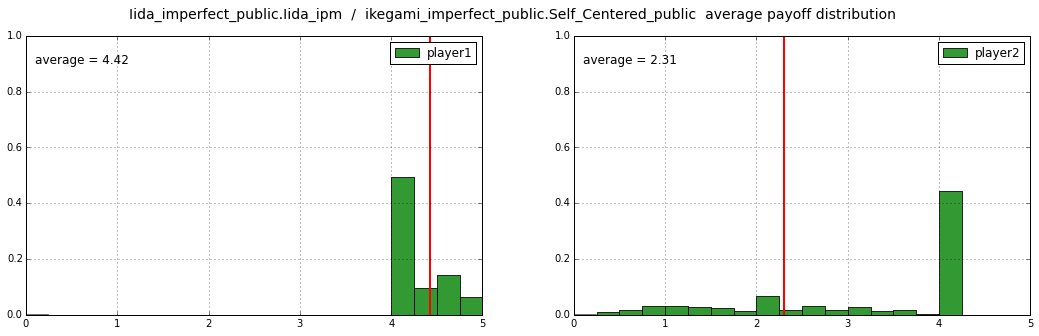

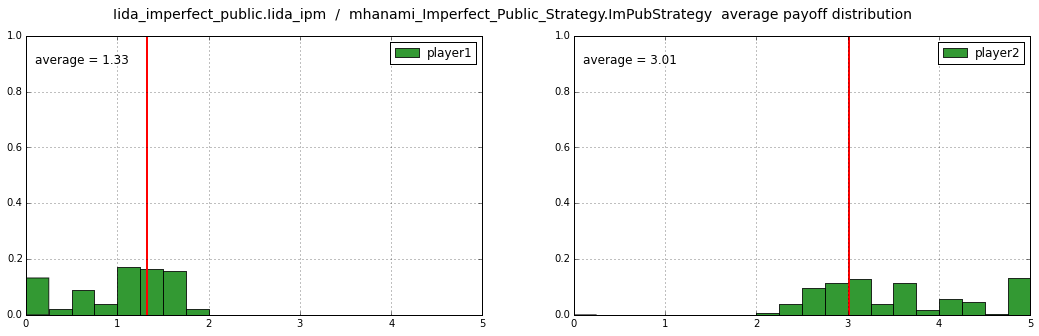

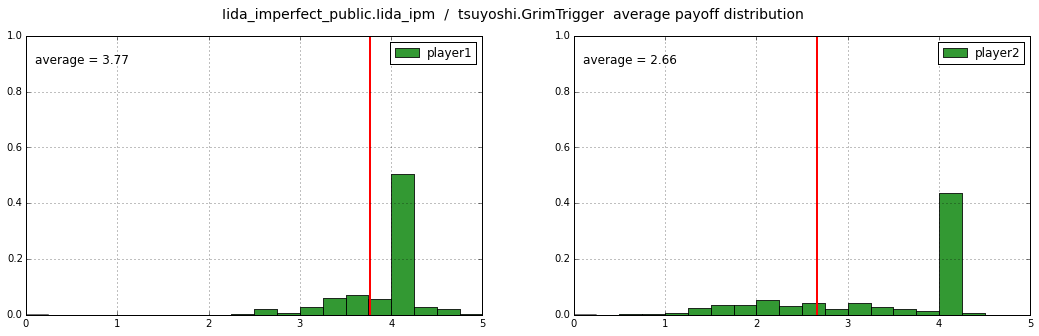

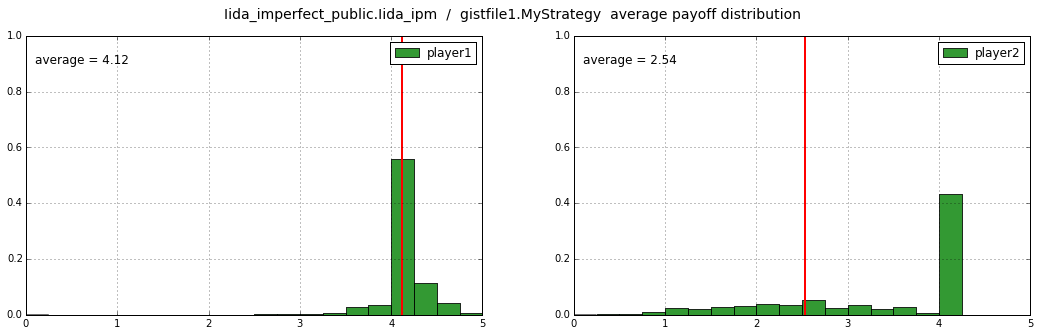

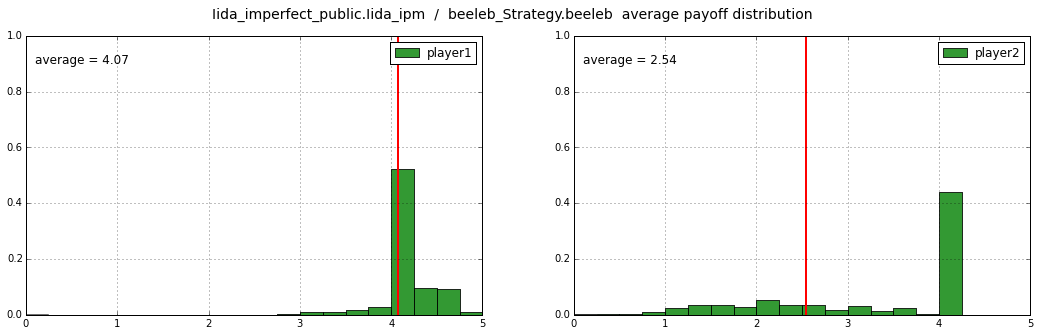

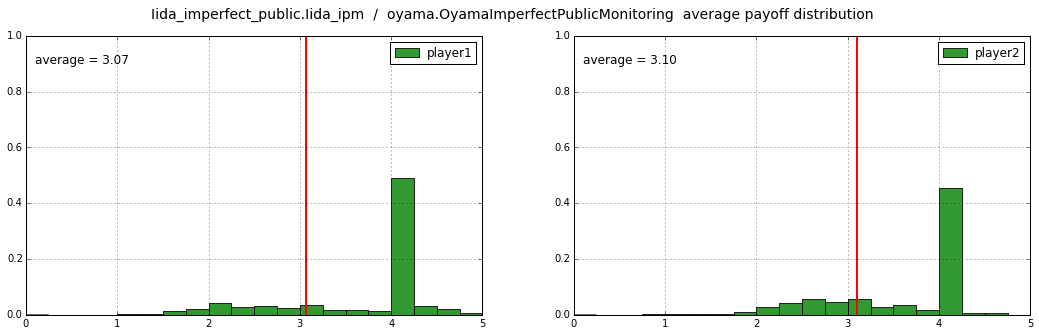

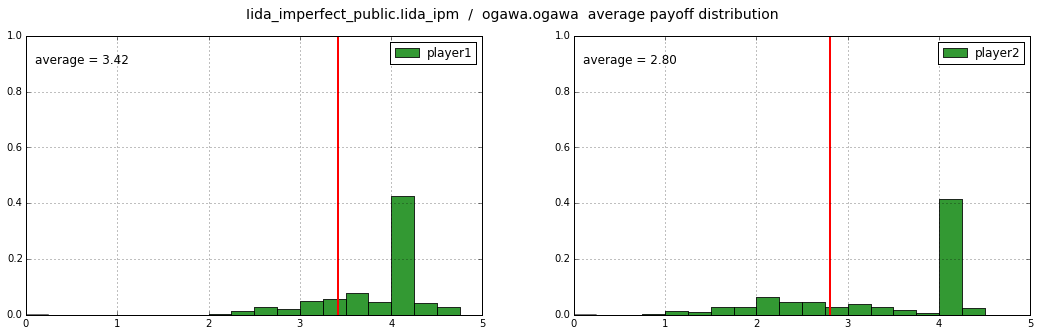

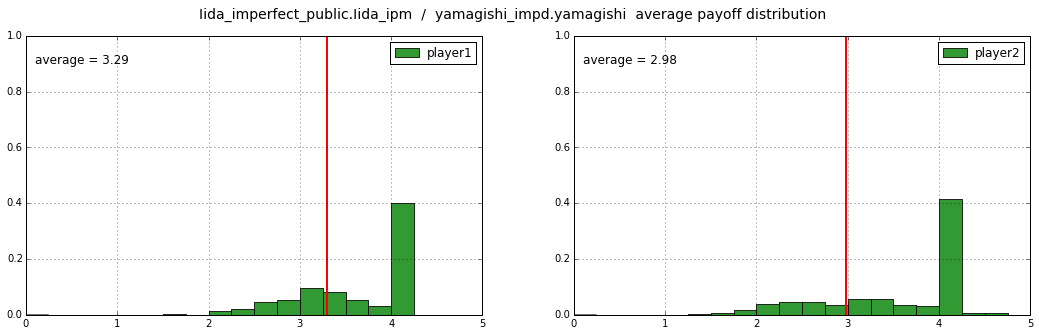

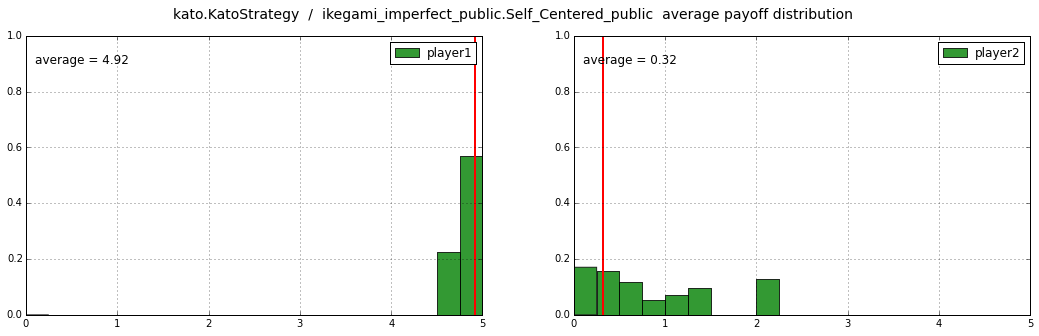

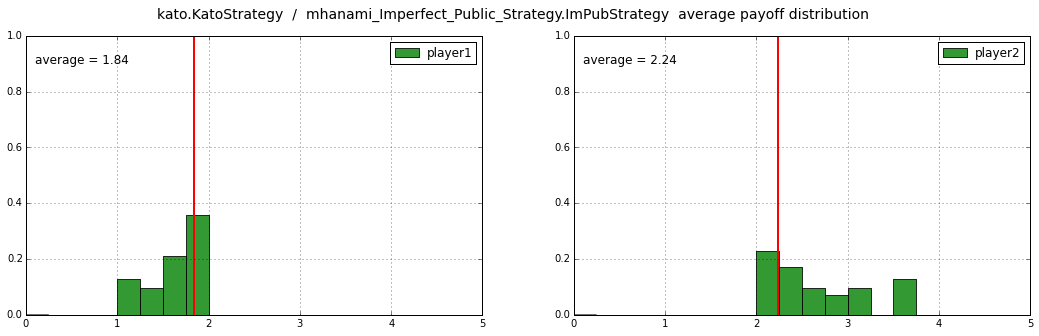

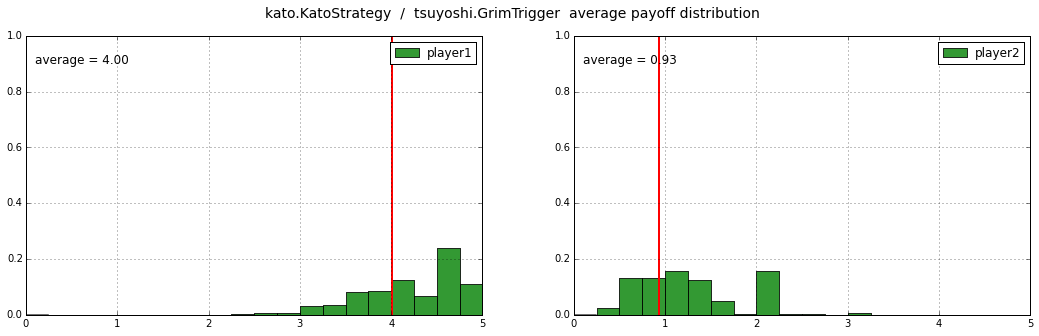

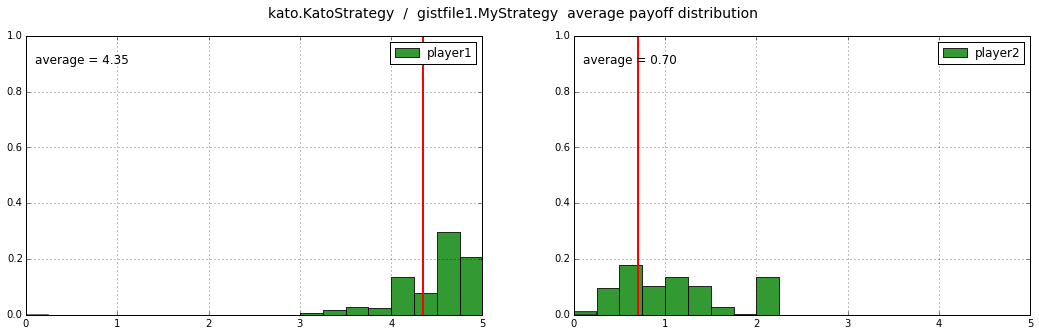

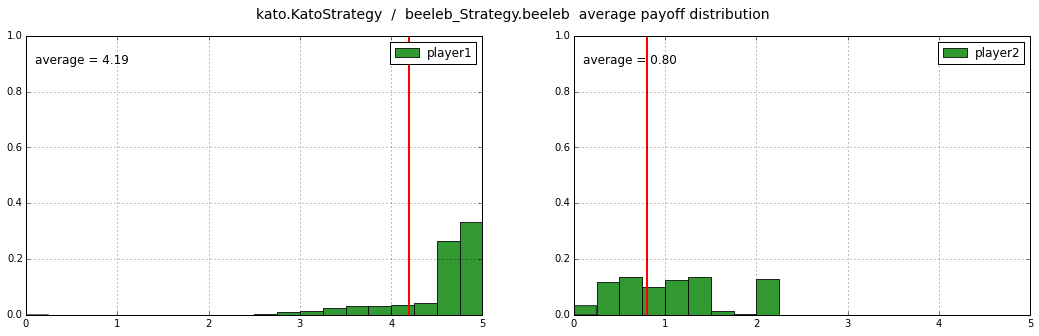

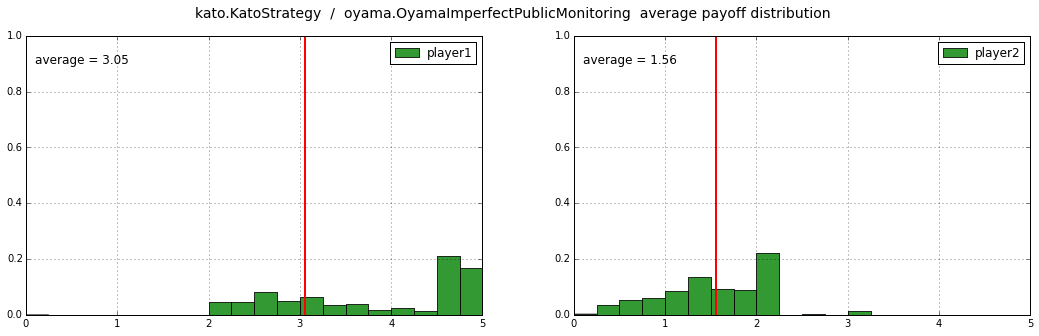

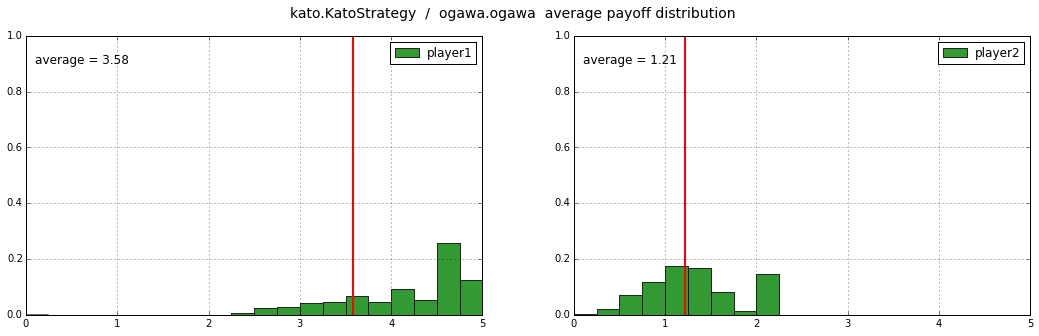

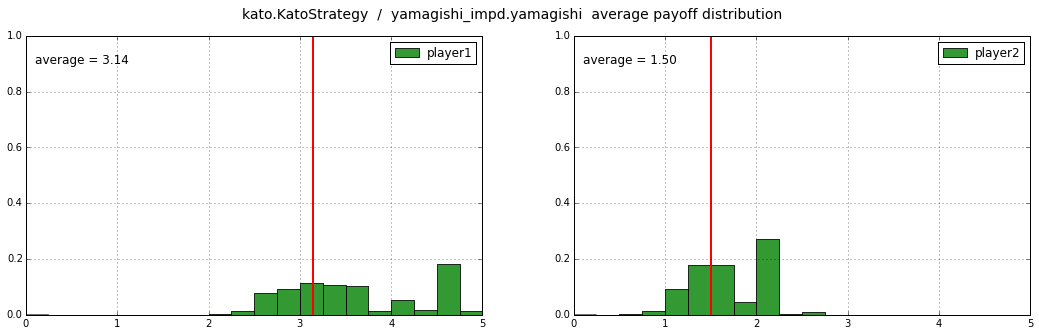

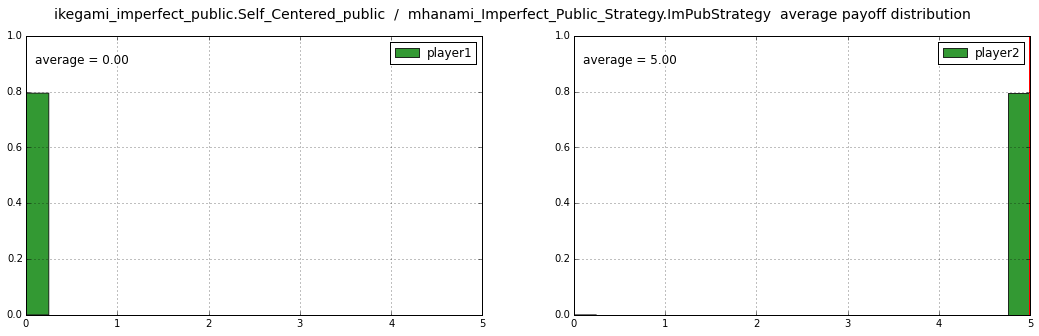

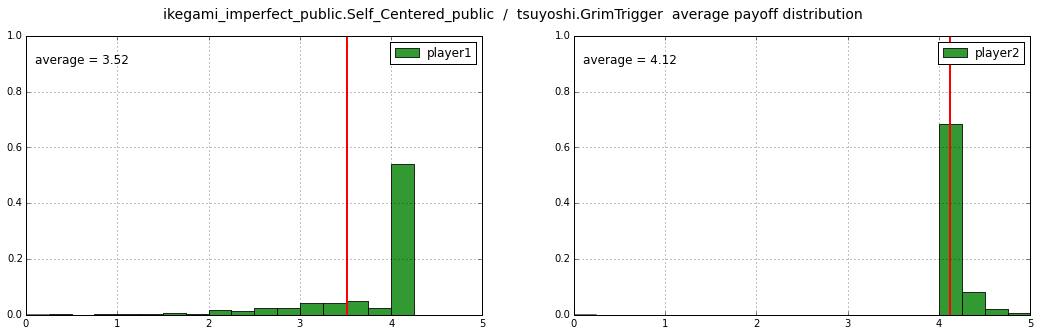

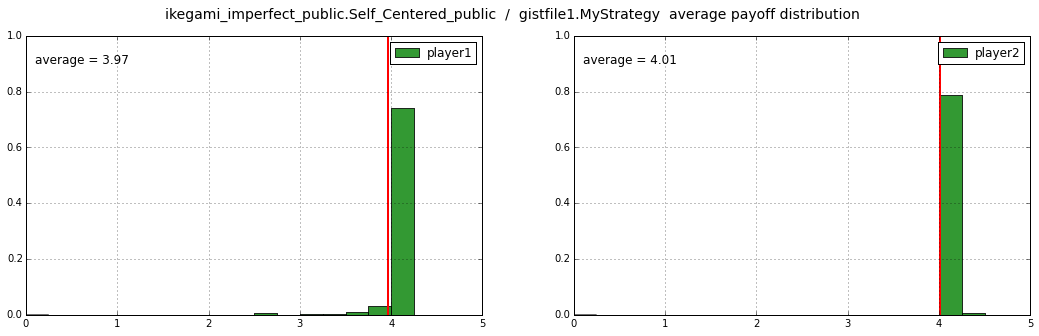

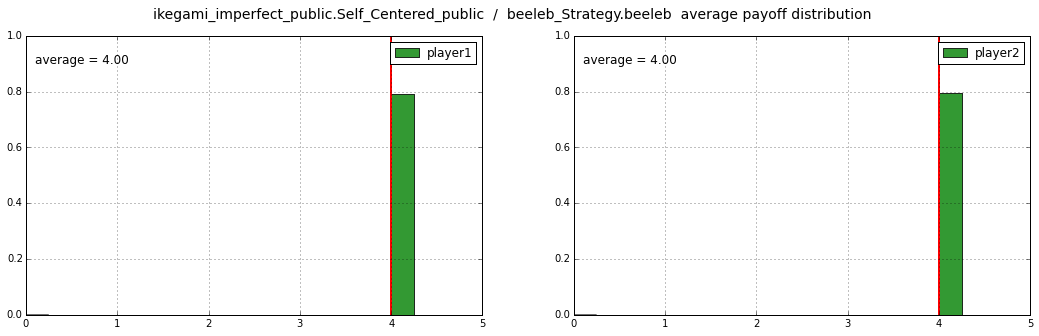

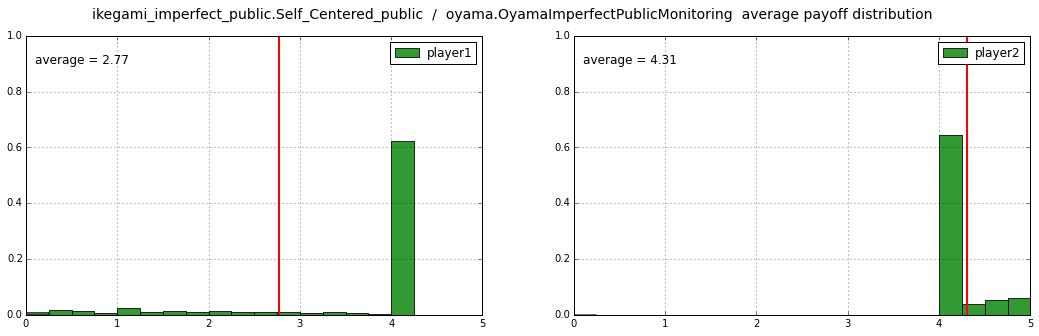

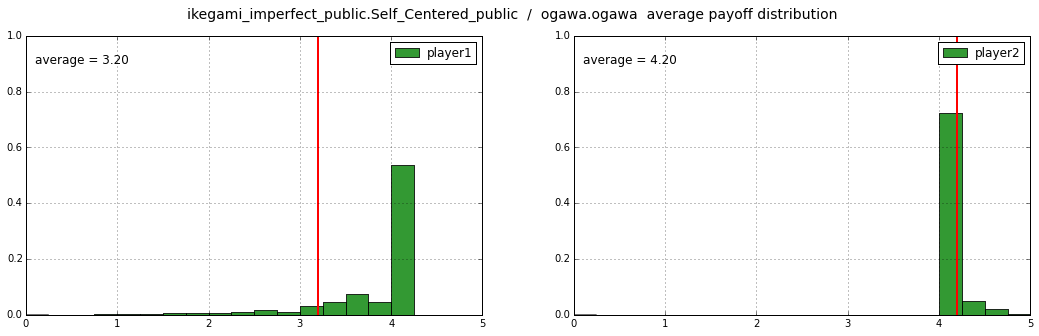

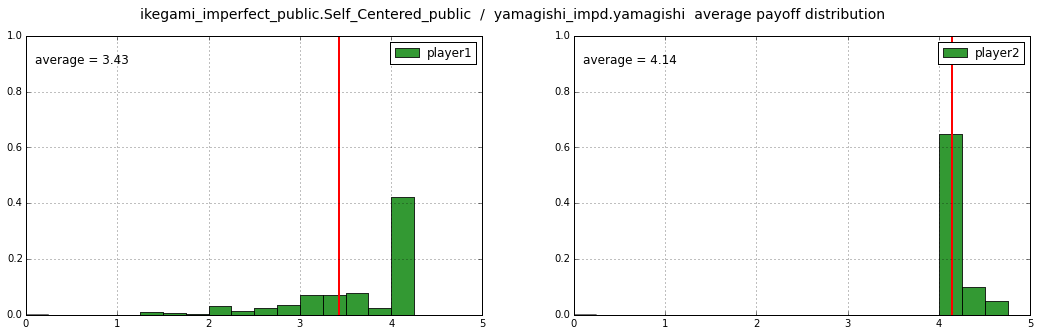

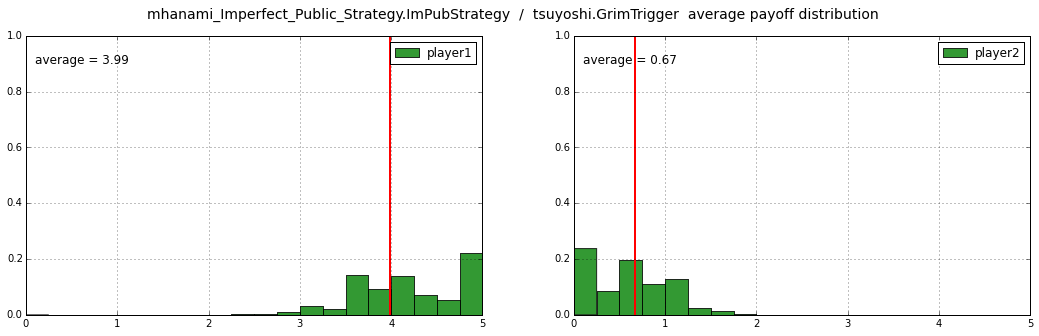

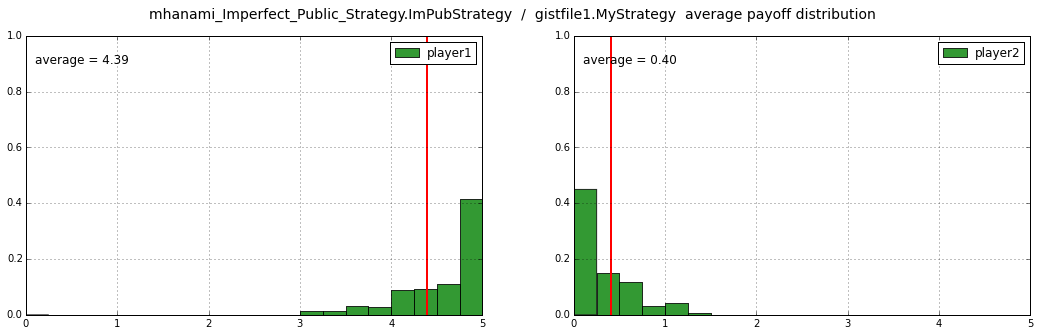

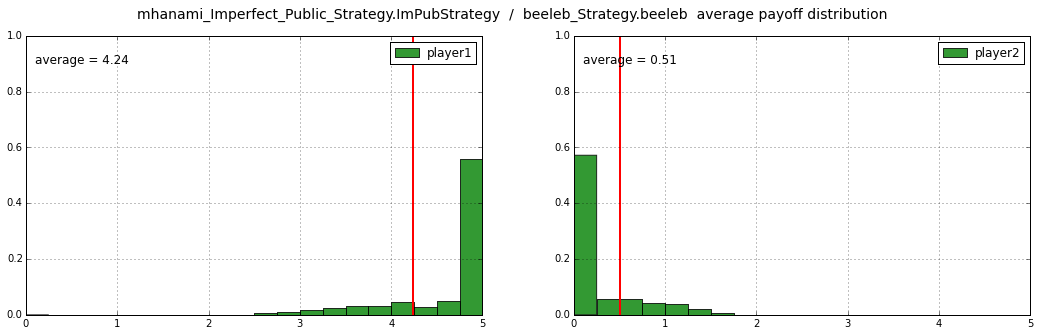

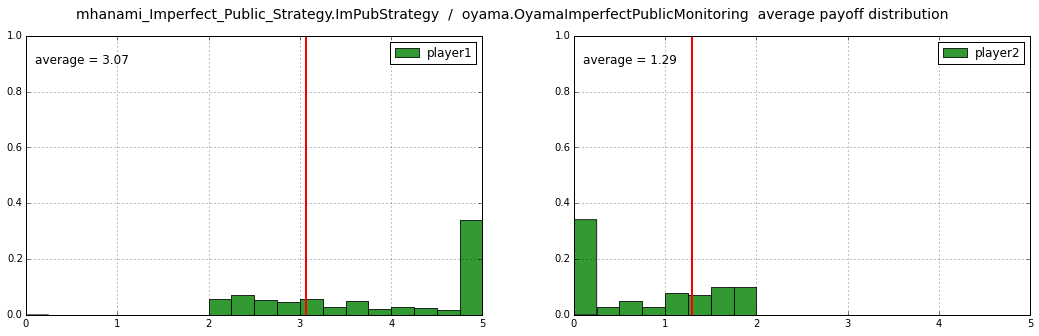

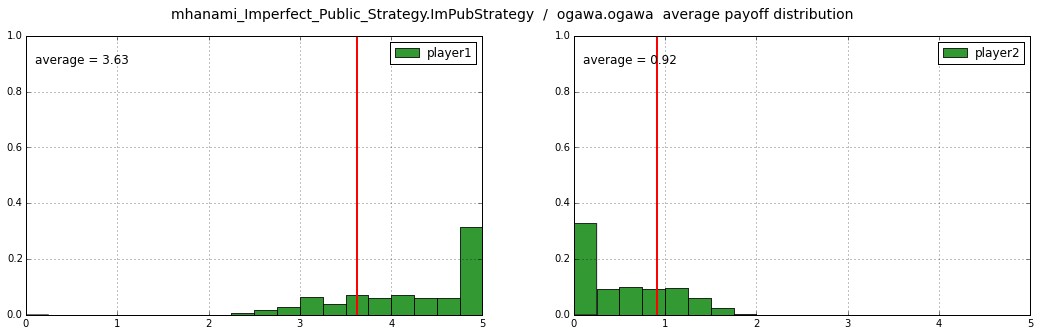

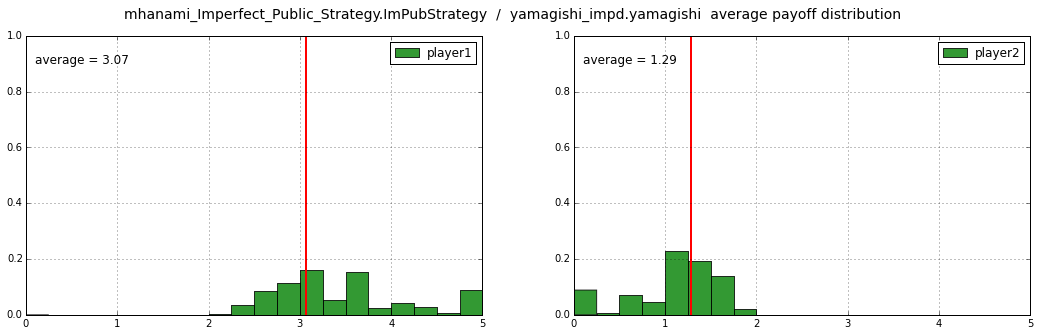

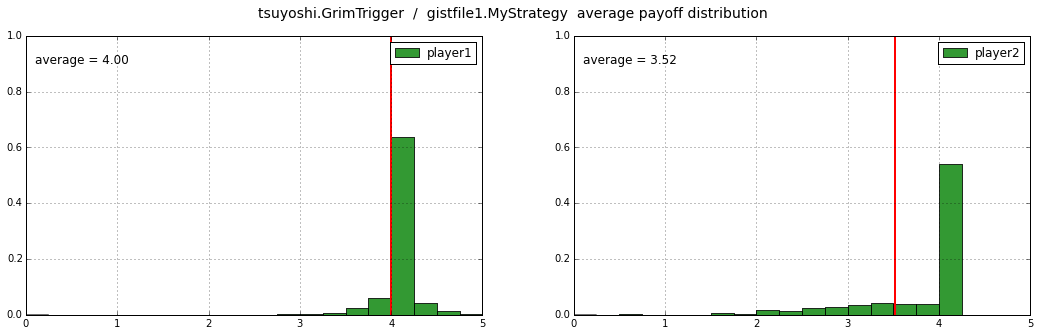

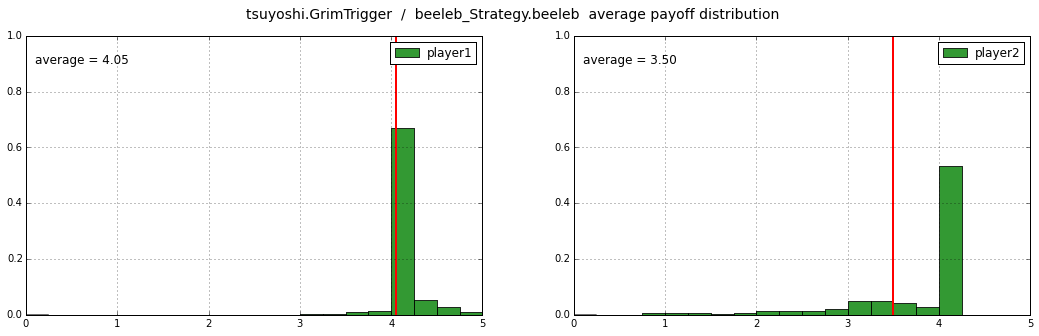

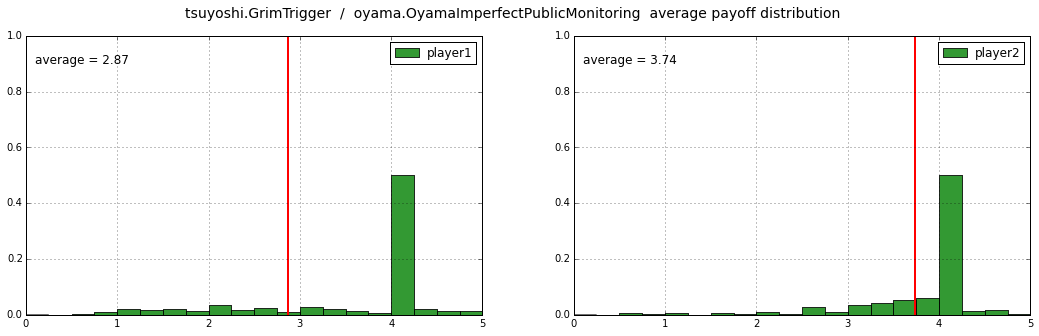

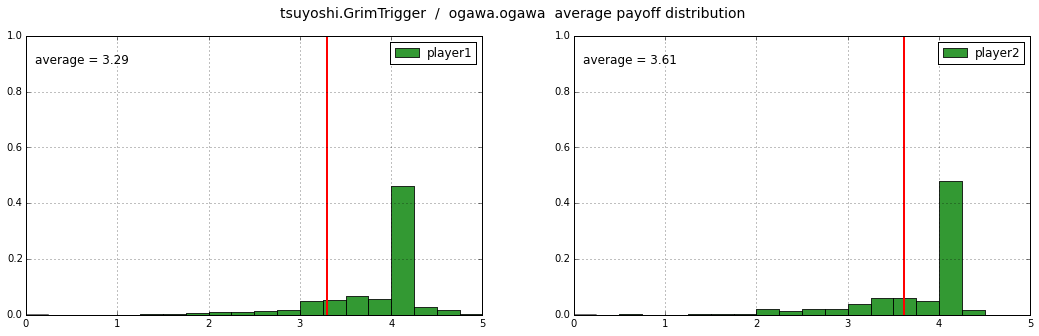

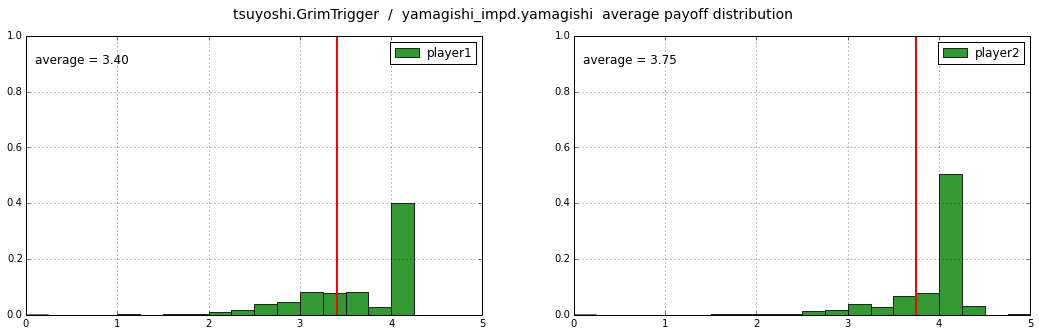

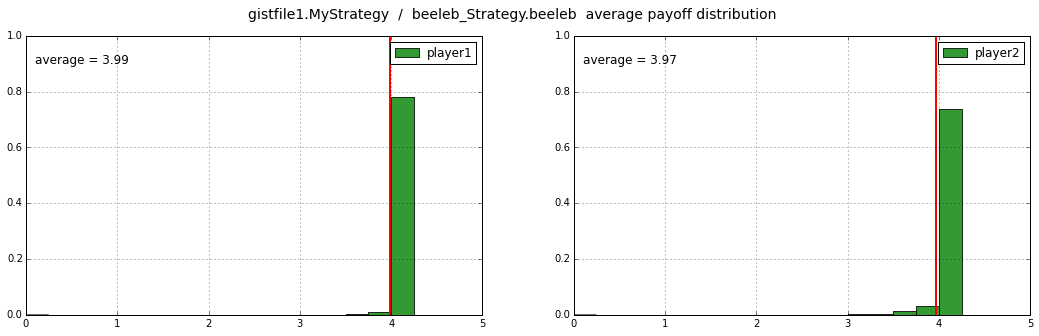

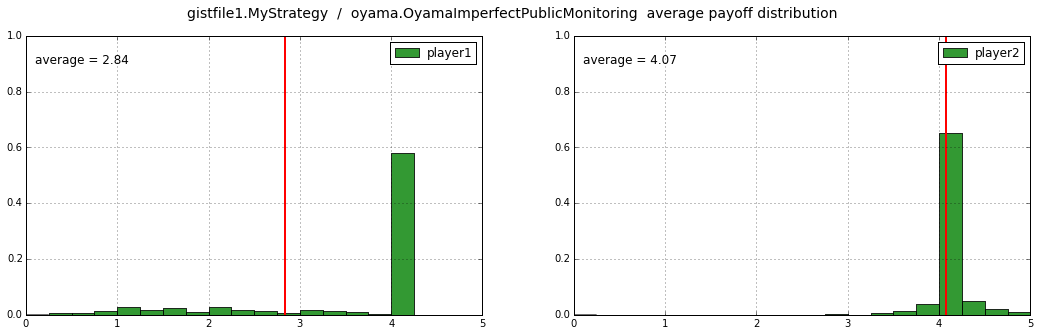

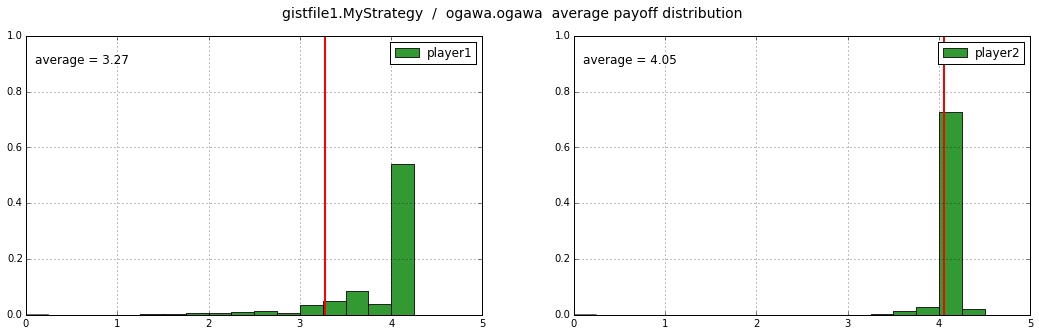

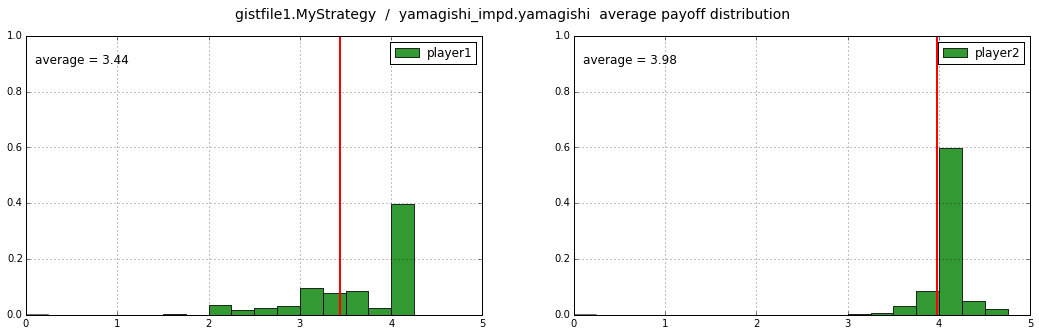

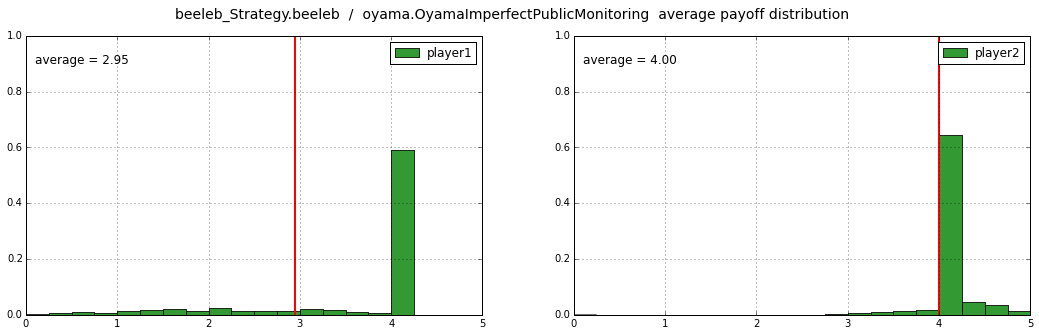

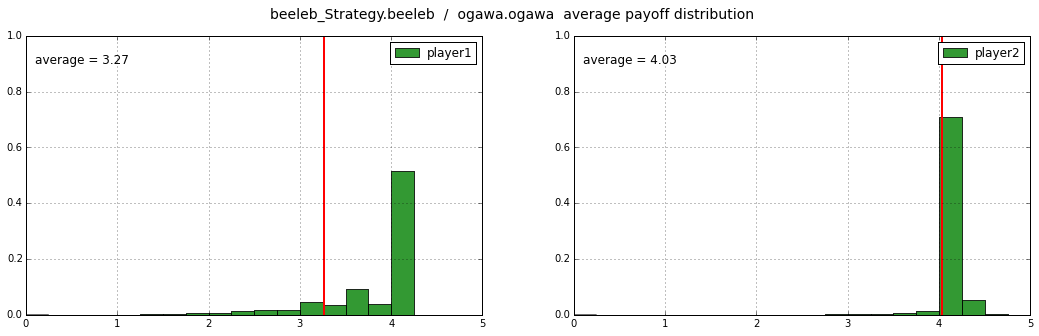

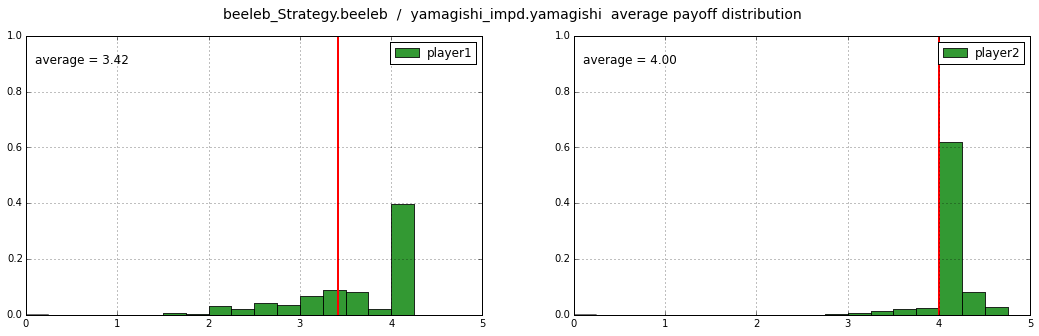

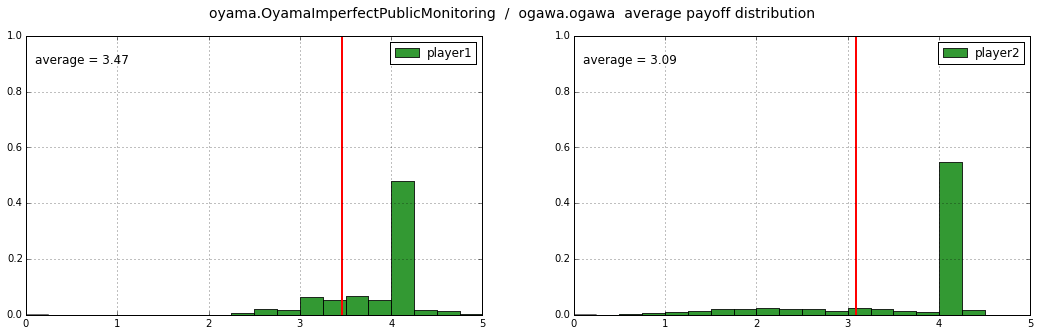

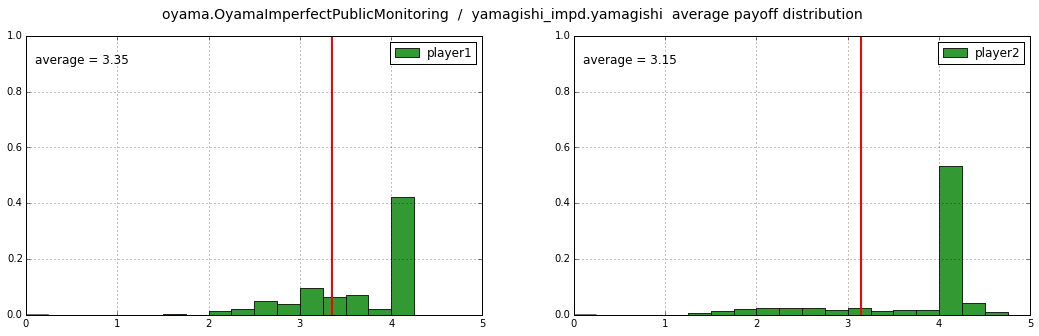

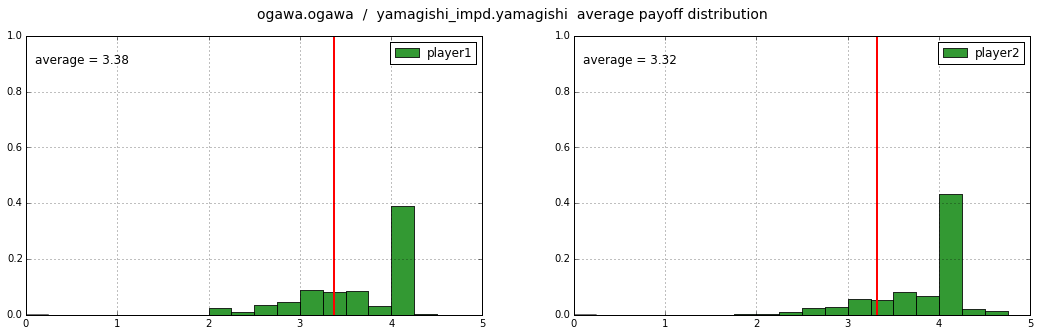

In [13]:
# 結果の読み込み
df_public = pd.read_csv("record_imperfect_public.csv")
plotAve(df_public)

## Case3: Imperfect private monitoring

In [3]:
# 「相手の」シグナルが協調か攻撃かを（ノイズ付きで）返す
def private_signal(actions):
    pattern = [[0, 0], [0, 1], [1, 0], [1, 1]]
    # 例えば実際の行動が(0, 1)なら、シグナルは(1, 0)である可能性が最も高い
    signal_probs = [[.9, .02, .02, .06], [.02, .06, .9, .02], [.02, .9, .06, .02], [.06, .02, .02, .9]]
    prob = rs.uniform()
    if actions[0] == 0 and actions[1] == 0:
        choice = rs.choice(4, p=signal_probs[0])
        return pattern[choice]

    elif actions[0] == 0 and actions[1] == 1:
        choice = rs.choice(4, p=signal_probs[1])
        return pattern[choice]

    elif actions[0] == 1 and actions[1] == 0:
        choice = rs.choice(4, p=signal_probs[2])
        return pattern[choice]

    elif actions[0] == 1 and actions[1] == 1:
        choice = rs.choice(4, p=signal_probs[3])
        return pattern[choice]

    else:
        raise ValueError

strategies = [Iida_iprm, KatoStrategy, Self_Centered_private,
              ImPrivStrategy, GrimTrigger, MyStrategy, beeleb, OyamaImperfectPrivateMonitoring, ogawa, yamagishi]
game = pl.RepeatedMatrixGame(payoff, strategies, signal=private_signal, ts_length=ts_length, repeat=1000)
game.play(mtype="private", random_seed=seed, record=False)

Start
The object has 10 strategy functions below
--------------------------------------------------
1 Iida_imperfect_private.Iida_iprm
2 kato.KatoStrategy
3 ikegami_imperfect_private.Self_Centered_private
4 mhanami_Imperfect_Private_Strategy.ImPrivStrategy
5 tsuyoshi.GrimTrigger
6 gistfile1.MyStrategy
7 beeleb_Strategy.beeleb
8 oyama.OyamaImperfectPrivateMonitoring
9 ogawa.ogawa
10 yamagishi_impd.yamagishi
--------------------------------------------------
Repeats: 1000
Total time series length: 34333

Game 1: "Iida_imperfect_private.Iida_iprm" vs "kato.KatoStrategy"
Iida_imperfect_private.Iida_iprm: session average is 1.665, stage average is 1.625
kato.KatoStrategy: session average is 2.899, stage average is 2.709

Game 2: "Iida_imperfect_private.Iida_iprm" vs "ikegami_imperfect_private.Self_Centered_private"
Iida_imperfect_private.Iida_iprm: session average is 4.314, stage average is 4.467
ikegami_imperfect_private.Self_Centered_private: session average is 2.746, stage average is 2.1